<a href="https://colab.research.google.com/github/softstat/bigdata/blob/main/Mid_%ED%99%98%EA%B2%BD%EB%B3%B4%EA%B1%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R (Week1)

## R for Data Science 실습

Colab 에서 R 사용: Runtime - Change Runtime type 에서 R로 변경


In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Pipes


In [ ]:
summary(cars)

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

In [ ]:
cars %>% summary()

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

In [ ]:
head(cars, 3)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


In [ ]:
cars %>% head(3)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


## Data transformation - dplyr

### nycflights13

Dataset on flights departing New York City in 2013.

In [ ]:
install.packages("nycflights13")
library(nycflights13)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


- __< int >__ stands for integers.
- __< dbl >__ stands for doubles, or real numbers.
- __< chr >__ stands for character vectors, or strings.
- __< dttm >__ stands for date-times (a date + a time).
- __< lgl >__ stands for logical, vectors that contain only TRUE or FALSE.
- __< fctr >__ stands for factors, which R uses to represent categorical variables with fixed possible values.
- __< date >__ stands for dates.

### Filter rows with filter()

In [ ]:
filter(flights, month == 1, day == 1) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
flights %>% filter(month == 1, day == 1) %>% filter(dest == 'ORD')

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,656,700,-4,854,850,4,AA,305,N4WNAA,LGA,ORD,143,733,7,0,2013-01-01 07:00:00
2013,1,1,709,700,9,852,832,20,UA,1092,N26226,LGA,ORD,135,733,7,0,2013-01-01 07:00:00
2013,1,1,715,713,2,911,850,21,UA,544,N841UA,EWR,ORD,156,719,7,13,2013-01-01 07:00:00
2013,1,1,739,745,-6,918,930,-12,AA,309,N4WPAA,LGA,ORD,137,733,7,45,2013-01-01 07:00:00
2013,1,1,749,710,39,939,850,49,MQ,3737,N508MQ,EWR,ORD,148,719,7,10,2013-01-01 07:00:00


In [ ]:
flights[ flights$month ==1 & flights$day ==1, ]

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [ ]:
flights %>% filter(month == 1 & day == 1 & dest == 'ORD') %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,656,700,-4,854,850,4,AA,305,N4WNAA,LGA,ORD,143,733,7,0,2013-01-01 07:00:00
2013,1,1,709,700,9,852,832,20,UA,1092,N26226,LGA,ORD,135,733,7,0,2013-01-01 07:00:00


In [ ]:
flights %>% filter(month == 1 & day == 1 & dest %in% c('ORD','LAS')) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,559,600,-1,854,902,-8,UA,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,651,655,-4,936,942,-6,B6,203,N558JB,JFK,LAS,323,2248,6,55,2013-01-01 06:00:00


5.2.4 Exercises

1. Find all flights that
  1. Had an arrival delay of two or more hours
  2. Flew to Houston (IAH or HOU)
  3. Were operated by United, American, or Delta
  4. Departed in summer (July, August, and September)
  5. Arrived more than two hours late, but didn’t leave late
  6. Were delayed by at least an hour, but made up over 30 minutes in flight
  7. Departed between midnight and 6am (inclusive)
2. Another useful dplyr filtering helper is between(). What does it do? Can you use it to simplify the code needed to answer the previous challenges?
3. How many flights have a missing dep_time? What other variables are missing? What might these rows represent?

In [ ]:
#1. Had an arrival delay of two or more hours
flights %>% filter(arr_delay>=120) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,811,630,101,1047,830,137,MQ,4576,N531MQ,LGA,CLT,118,544,6,30,2013-01-01 06:00:00
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,1,957,733,144,1056,853,123,UA,856,N534UA,EWR,BOS,37,200,7,33,2013-01-01 07:00:00
2013,1,1,1114,900,134,1447,1222,145,UA,1086,N76502,LGA,IAH,248,1416,9,0,2013-01-01 09:00:00
2013,1,1,1505,1310,115,1638,1431,127,EV,4497,N17984,EWR,RIC,63,277,13,10,2013-01-01 13:00:00
2013,1,1,1525,1340,105,1831,1626,125,B6,525,N231JB,EWR,MCO,152,937,13,40,2013-01-01 13:00:00


In [ ]:
# flight missing value
sum(is.na(flights$dep_time))

[1] 8255

In [ ]:
#3. Flew to Houston
flights %>% filter(dest %in% c('IAH',"HOU"))%>% head()

### Arrange rows with arrange()

In [ ]:
arrange(flights, year, month, day)  %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
arrange(flights, desc(dep_delay)) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


5.3.1 Exercises
1. How could you use arrange() to sort all missing values to the start? (Hint: use is.na()).

2. Sort flights to find the most delayed flights. Find the flights that left earliest.

3. Sort flights to find the fastest (highest speed) flights.

4. Which flights travelled the farthest? Which travelled the shortest?


In [ ]:
#1.
arrange(flights,is.na(flights))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [ ]:
# 4. Which flights travelled the farthest? Which travelled the shortest?
flights %>%
    mutate(gain = sched_arr_time - sched_dep_time,gain_per_hour = gain/60) %>%
arrange(desc(gain_per_hour))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain,gain_per_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>,<dbl>
2013,2,1,855,900,-5,1442,1540,-58,HA,⋯,N388HA,JFK,HNL,620,4983,9,0,2013-02-01 09:00:00,640,10.66667
2013,2,2,858,900,-2,1440,1540,-60,HA,⋯,N388HA,JFK,HNL,629,4983,9,0,2013-02-02 09:00:00,640,10.66667
2013,2,3,857,900,-3,1446,1540,-54,HA,⋯,N382HA,JFK,HNL,614,4983,9,0,2013-02-03 09:00:00,640,10.66667
2013,2,4,857,900,-3,1521,1540,-19,HA,⋯,N380HA,JFK,HNL,655,4983,9,0,2013-02-04 09:00:00,640,10.66667
2013,2,5,900,900,0,1555,1540,15,HA,⋯,N386HA,JFK,HNL,679,4983,9,0,2013-02-05 09:00:00,640,10.66667
2013,2,6,853,900,-7,1542,1540,2,HA,⋯,N389HA,JFK,HNL,691,4983,9,0,2013-02-06 09:00:00,640,10.66667
2013,2,7,900,900,0,1528,1540,-12,HA,⋯,N383HA,JFK,HNL,652,4983,9,0,2013-02-07 09:00:00,640,10.66667
2013,2,8,854,900,-6,1501,1540,-39,HA,⋯,N388HA,JFK,HNL,609,4983,9,0,2013-02-08 09:00:00,640,10.66667
2013,2,9,1206,900,186,1814,1540,154,HA,⋯,N380HA,JFK,HNL,645,4983,9,0,2013-02-09 09:00:00,640,10.66667


In [ ]:
flights %>%
    mutate(gain = sched_arr_time - sched_dep_time,gain_per_hour = gain/60) %>%
arrange((gain_per_hour))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain,gain_per_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>,<dbl>
2013,6,20,2255,2300,-5,2352,8,-16,B6,⋯,N373JB,JFK,BOS,36,187,23,0,2013-06-20 23:00:00,-2292,-38.2
2013,6,21,2258,2300,-2,2357,8,-11,B6,⋯,N273JB,JFK,BOS,40,187,23,0,2013-06-21 23:00:00,-2292,-38.2
2013,6,22,2250,2300,-10,3,8,-5,B6,⋯,N206JB,JFK,BOS,45,187,23,0,2013-06-22 23:00:00,-2292,-38.2
2013,6,23,2309,2300,9,30,8,22,B6,⋯,N281JB,JFK,BOS,37,187,23,0,2013-06-23 23:00:00,-2292,-38.2
2013,6,24,2326,2300,26,47,8,39,B6,⋯,N351JB,JFK,BOS,45,187,23,0,2013-06-24 23:00:00,-2292,-38.2
2013,6,25,118,2300,138,207,8,119,B6,⋯,N317JB,JFK,BOS,35,187,23,0,2013-06-25 23:00:00,-2292,-38.2
2013,6,26,2332,2300,32,132,8,84,B6,⋯,N178JB,JFK,BOS,35,187,23,0,2013-06-26 23:00:00,-2292,-38.2
2013,6,27,26,2300,86,149,8,101,B6,⋯,N339JB,JFK,BOS,33,187,23,0,2013-06-27 23:00:00,-2292,-38.2
2013,6,28,NA,2300,NA,NA,8,NA,B6,⋯,N184JB,JFK,BOS,NA,187,23,0,2013-06-28 23:00:00,-2292,-38.2


### Select columns with select()

In [ ]:
select(flights, year, month, day) %>% head()

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [ ]:
select(flights, -c(year:day)) %>% head()

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
flights %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
select(flights, year:sched_arr_time) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
2013,1,1,517,515,2,830,819
2013,1,1,533,529,4,850,830
2013,1,1,542,540,2,923,850
2013,1,1,544,545,-1,1004,1022
2013,1,1,554,600,-6,812,837
2013,1,1,554,558,-4,740,728


In [ ]:
select(flights, -(year:day)) %>% head()

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


### Helper functions

- starts_with("abc"): matches names that begin with “abc”.
- ends_with("xyz"): matches names that end with “xyz”.
- contains("ijk"): matches names that contain “ijk”.
- num_range("x", 1:3): matches x1, x2 and x3.

In [ ]:
select(flights, starts_with("arr")) %>% head()

arr_time,arr_delay
<int>,<dbl>
830,11
850,20
923,33
1004,-18
812,-25
740,12


In [ ]:
select(flights, contains("arr")) %>% head()

arr_time,sched_arr_time,arr_delay,carrier
<int>,<int>,<dbl>,<chr>
830,819,11,UA
850,830,20,UA
923,850,33,AA
1004,1022,-18,B6
812,837,-25,DL
740,728,12,UA


Rename the variable with rename()

In [ ]:
rename(flights, tail_num = tailnum) %>% head

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Or using traditional R using colnames()

In [ ]:
colnames(flights)

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

In [ ]:
colnames(flights)[12]

[1] "tailnum"

In [ ]:
colnames(flights)[12] = 'tail_num'

In [ ]:
flights %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
select(flights, time_hour, air_time, everything()) %>% head()

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58


In [ ]:
flights %>% select( c("dep_time", "dep_delay", "arr_time", "arr_delay"))

dep_time,dep_delay,arr_time,arr_delay
<int>,<dbl>,<int>,<dbl>
517,2,830,11
533,4,850,20
542,2,923,33
544,-1,1004,-18
554,-6,812,-25
554,-4,740,12
555,-5,913,19
557,-3,709,-14
557,-3,838,-8


In [ ]:
flights %>% select(starts_with("dep"), starts_with("arr"))

dep_time,dep_delay,arr_time,arr_delay
<int>,<dbl>,<int>,<dbl>
517,2,830,11
533,4,850,20
542,2,923,33
544,-1,1004,-18
554,-6,812,-25
554,-4,740,12
555,-5,913,19
557,-3,709,-14
557,-3,838,-8


In [ ]:
flights %>% select(dep_time:arr_delay, -c("sched_dep_time", "sched_arr_time") )

dep_time,dep_delay,arr_time,arr_delay
<int>,<dbl>,<int>,<dbl>
517,2,830,11
533,4,850,20
542,2,923,33
544,-1,1004,-18
554,-6,812,-25
554,-4,740,12
555,-5,913,19
557,-3,709,-14
557,-3,838,-8


In [ ]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


5.4.1 Exercises
1. Brainstorm as many ways as possible to select dep_time, dep_delay, arr_time, and arr_delay from flights.
2. What happens if you include the name of a variable multiple times in a select() call?
3. What does the any_of() function do? Why might it be helpful in conjunction with this vector?
```
vars <- c("year", "month", "day", "dep_delay", "arr_delay")
```


### Add new variables with mutate()

In [ ]:
flights %>% select(year:day, ends_with("delay"), distance, air_time) %>% head()

year,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227
2013,1,1,4,20,1416,227
2013,1,1,2,33,1089,160
2013,1,1,-1,-18,1576,183
2013,1,1,-6,-25,762,116
2013,1,1,-4,12,719,150


In [ ]:
flights %>%
    select(year:day, ends_with("delay"), distance, air_time) %>%
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% head()

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,-9,3.783333,-2.378855
2013,1,1,4,20,1416,227,-16,3.783333,-4.229075
2013,1,1,2,33,1089,160,-31,2.666667,-11.625000
2013,1,1,-1,-18,1576,183,17,3.050000,5.573770
2013,1,1,-6,-25,762,116,19,1.933333,9.827586
2013,1,1,-4,12,719,150,-16,2.500000,-6.400000


In [ ]:
flights %>%
    select(year:day, ends_with("delay"), distance, air_time) %>%
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% arrange( gain_per_hour)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,6,24,171,273,94,31,-102,0.5166667,-197.4194
2013,6,27,62,177,184,36,-115,0.6000000,-191.6667
2013,7,23,11,122,94,36,-111,0.6000000,-185.0000
2013,12,17,115,233,187,40,-118,0.6666667,-177.0000
2013,6,13,-7,106,184,39,-113,0.6500000,-173.8462
2013,6,27,-8,123,184,46,-131,0.7666667,-170.8696
2013,3,18,-1,109,187,39,-110,0.6500000,-169.2308
2013,1,25,39,152,199,42,-113,0.7000000,-161.4286
2013,5,9,3,94,184,34,-91,0.5666667,-160.5882


#R (Week2)

## R for Data Science 실습 2 - Data wrangling and programing

## Data Wrangling (tidyr)

In [ ]:
library(tidyverse)

## Example datasets

In [ ]:
table1

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
table2

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [ ]:
table3

country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [ ]:
table4a # N. cases

country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


In [ ]:
table4b # N. population

country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


## pivot_longer()

One variable might be spread across multiple columns

Apply pivot_longer() to table4a

In [ ]:
table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
# 칼럼이름으로

country,year,cases
<chr>,<chr>,<dbl>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


apply it to table4b

In [ ]:
table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")


country,year,population
<chr>,<chr>,<dbl>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


Join two tables

In [ ]:
tidy4a <- table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
left_join(tidy4a, tidy4b)


Joining with `by = join_by(country, year)`


country,year,cases,population
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Q: What is right_join? try ?right_join and study join methods

## Pivot_wider()

One observation might be scattered across multiple rows

In [ ]:
table2

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [ ]:
# 칼럼 이름에서 names_from 과 values_from 갖고 오기
table2 %>% pivot_wider(names_from = type, values_from = count)

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


2.3.3 Exercises
1. Why are pivot_longer() and pivot_wider() not perfectly symmetrical?
Carefully consider the following example:
```
stocks <- tibble(
  year   = c(2015, 2015, 2016, 2016),
  half  = c(   1,    2,     1,    2),
  return = c(1.88, 0.59, 0.92, 0.17)
)
stocks %>%
  pivot_wider(names_from = year, values_from = return) %>%
  pivot_longer(`2015`:`2016`, names_to = "year", values_to = "return")
```
(Hint: look at the variable types and think about column names.)  
`pivot_longer()` has a `names_ptypes` argument, e.g.  `names_ptypes = list(year = double())`. What does it do?

2. Why does this code fail?
```
table4a %>%
  pivot_longer(c(1999, 2000), names_to = "year", values_to = "cases")
#> Error in `pivot_longer()`:
#> ! Can't subset columns past the end.
#> ℹ Locations 1999 and 2000 don't exist.
#> ℹ There are only 3 columns.
```

3. What would happen if you widen this table? Why? How could you add a new column to uniquely identify each value?
```
people <- tribble(
  ~name,             ~names,  ~values,
  #-----------------|--------|------
  "Phillip Woods",   "age",       45,
  "Phillip Woods",   "height",   186,
  "Phillip Woods",   "age",       50,
  "Jessica Cordero", "age",       37,
  "Jessica Cordero", "height",   156
)
```
4. Tidy the simple tibble below. Do you need to make it wider or longer? What are the variables?
```
preg <- tribble(
  ~pregnant, ~male, ~female,
  "yes",     NA,    10,
  "no",      20,    12
)
```

## Separating and Uniting

## separate()

One column contains two variables

In [ ]:
table3

country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [ ]:
table3 %>% separate(rate, into = c("cases", "population"))

country,year,cases,population
<chr>,<dbl>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
table3 %>% separate(rate, into = c("cases", "population")) %>% mutate(cases = as.numeric(cases), population = as.numeric(population))

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
table3 %>% extract(rate, c("cases", "population"), regex = "([0-9]+)/([0-9]+)")

country,year,cases,population
<chr>,<dbl>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## unite()

Single variable is spread across multiple columns

In [ ]:
table5

,country,century,year,rate
,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,19,99,745/19987071
2,Afghanistan,20,00,2666/20595360
3,Brazil,19,99,37737/172006362
4,Brazil,20,00,80488/174504898
5,China,19,99,212258/1272915272
6,China,20,00,213766/1280428583


In [ ]:
# new라는 칼럼에 century,year를 통합(unite)
table5 %>%
  unite(new, century, year, sep = "")


country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


12.4.3 Exercises
1. What do the extra and fill arguments do in separate()? Experiment with the various options for the following two toy datasets.
```
tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>%
  separate(x, c("one", "two", "three"))
```
```
tibble(x = c("a,b,c", "d,e", "f,g,i")) %>%
  separate(x, c("one", "two", "three"))
```
2. Both `unite()` and `separate()` have a `remove` argument. What does it do? Why would you set it to FALSE?

3. Compare and contrast `separate()` and `extract()`. Why are there three variations of separation (by position, by separator, and with groups), but only one unite?

## Functional Programming

In [ ]:
df <- tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)

In [ ]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-0.45863390,-0.2439776,-0.6493529,1.074287805
0.51513314,-1.6495393,0.8327572,1.356838218
-1.18134754,-0.3453512,0.4083415,0.084623358
-0.26014518,-0.7127027,1.5885578,0.014065127
1.75420092,-0.2938705,0.1899389,-0.341243088
-1.77392060,-1.8333941,0.8511374,-0.335277894
-0.58673065,-0.2770002,-0.7832160,0.563449939
-2.25951646,2.6235672,-1.6706300,-0.431352491
-0.09288619,0.1105740,0.6511143,1.258909653


In [ ]:
median(df$a)
#> [1] -0.2457625
median(df$b)
#> [1] -0.2873072
median(df$c)
#> [1] -0.05669771
median(df$d)
#> [1] 0.1442633

[1] -0.3593895

[1] -0.2854354

[1] 0.5297279

[1] 0.04934424

Don't copy and paste multiple times  
You can iterate using for loops


In [ ]:
output <- vector("double", ncol(df))  # 1. output
for (i in seq_along(df)) {            # 2. sequence
  output[[i]] <- median(df[[i]])      # 3. body
}
output


[1]  0.8134484  0.4053772  0.5204634 -0.2421938

In [ ]:
output <- c()
output


NULL

In [ ]:
output <- c()
for (i in seq_along(df)) {            # 2. sequence
  output <- c( output, median(df[[i]]) )      # 3. body
}
output


[1]  0.8134484  0.4053772  0.5204634 -0.2421938

In [ ]:
install.packages("rbenchmark")
library(rbenchmark)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

simple1 <- function(n) {
  output <- vector("double", n)
  for(i in 1:n)
    output[i] = i
  return(output)
}

simple2 <- function(n) {
  output <- c()
  for(i in 1:n)
    output = c(output, i)
  return(output)
}


In [ ]:
simple1(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
simple2(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
benchmark("fc1"=simple1(1000),
          "fc2"=simple2(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.006,100
2,fc2,0.226,100


In [ ]:
226/6


[1] 37.66667

## for_loops vs functional

Possible to wrap up for loops in a function


In [ ]:
col_mean <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- mean(df[[i]])
  }
  output
}

col_median <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- median(df[[i]])
  }
  output
}

col_sd <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- sd(df[[i]])
  }
  output
}

col_mean(df)

[1]  0.6723523  0.3396382  0.3697444 -0.2943995

You can make function as a variable

In [ ]:
col_summary <- function(df, fun) {
  out <- vector("double", length(df))
  for (i in seq_along(df)) {
    out[i] <- fun(df[[i]])
  }
  out
}
col_summary(df, median)


[1]  0.8134484  0.4053772  0.5204634 -0.2421938

## The map function (purrr)

the purrr package provides a family of functions for looping patterns over a vector

remind apply()

In [ ]:
str(df)

tibble [10 × 4] (S3: tbl_df/tbl/data.frame)
 $ a: num [1:10] 0.29 1.79 0.26 0.67 1.59 ...
 $ b: num [1:10] 0.1666 2.0479 -0.0224 0.6441 -0.7186 ...
 $ c: num [1:10] 0.687 1.301 -1.425 1.539 -0.115 ...
 $ d: num [1:10] 0.5547 -0.5305 0.0461 -1.9565 -0.9547 ...


In [ ]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
0.2897577,0.16664158,0.6872394,0.55466489
1.7851222,2.04789511,1.3014184,-0.53053395
0.2597240,-0.02244299,-1.4245135,0.04614628
0.6695012,0.64411280,1.5387469,-1.95648015
1.5917231,-0.71861807,-0.1148884,-0.95466182
-0.1754023,0.84335090,1.4792312,-2.02047210
1.3738296,-0.74584389,0.4393677,1.69871484
1.0207140,1.64790838,-0.1880078,0.26984891
0.9573955,0.66484396,0.6015591,0.82904747


In [ ]:
df %>% map_dbl(mean)

a          b          c          d 
 0.6723523  0.3396382  0.3697444 -0.2943995

In [ ]:
df %>% map(mean)

$a
[1] 0.6723523

$b
[1] 0.3396382

$c
[1] 0.3697444

$d
[1] -0.2943995

In [ ]:
df %>% map_dbl(median)

a          b          c          d 
 0.8134484  0.4053772  0.5204634 -0.2421938

In [ ]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [ ]:
mtcars %>%
  split(.$cyl)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


You can define a function in map

In [ ]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}

mtcars %>%
  split(.$cyl) %>%
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
mtcars %>%
  split(.$cyl) %>%
  map(function(df) lm(mpg ~ wt, data = df))


$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}
mtcars %>%
  split(.$cyl) %>%
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .))


$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
df %>% map_dbl(mean)

a          b          c          d 
 0.6723523  0.3396382  0.3697444 -0.2943995

In [ ]:
df %>% map_dbl(~mean(.))

a          b          c          d 
 0.6723523  0.3396382  0.3697444 -0.2943995

## Extract Component

In [ ]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary)

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1513 -1.9795 -0.6272  1.9299  5.2523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   39.571      4.347   9.104 7.77e-06 ***
wt            -5.647      1.850  -3.052   0.0137 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.332 on 9 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.454 
F-statistic: 9.316 on 1 and 9 DF,  p-value: 0.01374


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
     Mazda RX4  Mazda RX4 Wag Hornet 4 Drive        Valiant       Merc 280 
       -0.1250         0.5840         1.9292        -0.6897         0.3547 
     Merc 280C   Ferrari Dino 
       -1.0453        -1.0080 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   28.409      4.184   6.789  0.00105 **
wt            -2.780      1.335  -2.083  0.09176 . 
---
Signif.

In [ ]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary) %>%
  map_dbl(~.$r.squared)


4         6         8 
0.5086326 0.4645102 0.4229655

In [ ]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary) %>%
  map_dbl('r.squared')


4         6         8 
0.5086326 0.4645102 0.4229655

You can also use an integer to select elements by position

In [ ]:
x <- list(list(1, 2, 3), list(4, 5, 6), list(7, 8, 9))
x %>% map_dbl(2)
#> [1] 2 5 8


[1] 2 5 8

In [ ]:
x

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 2

[[1]][[3]]
[1] 3


[[2]]
[[2]][[1]]
[1] 4

[[2]][[2]]
[1] 5

[[2]][[3]]
[1] 6


[[3]]
[[3]][[1]]
[1] 7

[[3]][[2]]
[1] 8

[[3]][[3]]
[1] 9

Functional Programming is memory efficient by not saving internal calculations. Easier to understand if you get used to it.

Is it fater as well?

In [ ]:
n_len = 10

In [ ]:
rep(10,n_len)

[1] 10 10 10 10 10 10 10 10 10 10

In [ ]:
rep(10,n_len) %>% map(rnorm)

[[1]]
 [1]  0.7429728 -0.3297904  0.0510513 -0.6201134 -0.1898323  0.3998129
 [7]  1.0095317  1.6244545  0.6830163  0.5726511

[[2]]
 [1] -1.4018398  0.8672232  1.5681101  0.1199568  1.5116688  1.4784141
 [7] -1.5389568  0.3501428 -0.1269016  0.7069362

[[3]]
 [1] -0.0731256 -0.3252491 -0.7805141  0.4397444  0.3761291  0.8017001
 [7] -0.1445211 -0.3635880  1.9726093 -0.9074145

[[4]]
 [1]  0.1471247  0.8758844 -0.4896714 -0.1364627  0.8855002 -0.5718024
 [7]  0.9476499  0.8413031 -1.1919564  0.7954304

[[5]]
 [1]  0.48806875  0.46998239  2.39772716  0.60126435  0.08922561 -0.53941778
 [7]  0.30222769 -0.77268917  0.74093541 -1.01444038

[[6]]
 [1]  0.4660953  0.9109272  1.6439227 -0.1012764 -2.0096921 -1.1010533
 [7]  0.9355712 -1.0505492 -0.2579142 -0.2147175

[[7]]
 [1] -1.30507988  0.60747205  0.05691560 -0.03428378 -0.49156656  0.02613707
 [7]  1.82888191  0.67736028 -0.01948040 -0.32417471

[[8]]
 [1]  0.31524628 -0.95792176  0.97383618 -0.36627622  0.29666500  0.02291863
 [7]  1.42718630 -1.07998655 -0.12407800  0.13254866

[[9]]
 [1]  0.0461385439 -1.1223199452 -1.4203357231 -0.6368241164 -0.0111277351
 [6]  0.0001989229 -0.9456664458  0.0318596064 -1.0321900445  1.2189532480

[[10]]
 [1]  0.58690536  0.04596183  0.54087671  0.26223488  0.18741668  0.96460219
 [7] -0.30860257  0.29619431  0.60734699  0.62578501

In [ ]:
df2 <- vector(mode = "list", length = n_len)
for (i in 1:n_len)
  df2[[i]] <- rnorm(10)
df2

[[1]]
 [1] -0.1024487  0.3797305  0.4420737 -0.3125294  0.6575282  1.1874648
 [7] -0.6633741  1.1675507 -0.6532159  0.5320027

[[2]]
 [1] -0.01665178 -0.32302024 -1.00938712  0.42702051 -0.41265338 -1.49066076
 [7]  0.24729760  0.76890927 -0.26024908  0.37143799

[[3]]
 [1] -0.47771886 -1.46336950  0.74446659  0.56756839  0.20544324  0.24956849
 [7] -0.13132824  0.39518773  0.08494923  0.27210259

[[4]]
 [1]  0.9097382 -0.5580852  2.4812245 -0.2497129 -1.3524861 -1.7071781
 [7]  1.0224375 -2.3537141 -0.7436577  1.5443334

[[5]]
 [1] -0.88495074 -0.70391972  0.17072744  0.42488013 -1.03947675 -1.20029435
 [7] -0.03527654 -0.02751302  0.33438448  0.40543960

[[6]]
 [1]  0.7667980  0.6366442 -1.0822321 -1.3523314 -0.3956084  1.4583305
 [7] -2.5430355  0.8398272 -1.3551542  0.6210143

[[7]]
 [1] -0.01532549  1.04266202  1.23616636 -1.12641818  0.18026970 -1.21042560
 [7] -0.73503933  0.14462271 -0.91333535 -0.29284459

[[8]]
 [1]  0.72959428 -1.15863593  0.85462203 -0.06783435  0.05326202 -0.65951642
 [7] -0.56270104 -0.23223669  0.91506853 -0.86148312

[[9]]
 [1] -0.41089197  0.09661153 -1.55193970  0.17905954  0.22079470  0.04292780
 [7]  0.57096404  0.21560602 -2.92811960  0.20712843

[[10]]
 [1] -0.239621401  0.089571250 -0.702042110 -0.823787499 -1.992348426
 [6] -0.216953817  0.006058694 -0.260885764  1.796458994 -1.478069234

In [ ]:
lapply(rep(10,n_len), rnorm )

[[1]]
 [1] -1.0349300  1.0484451 -0.5163824  0.3913612 -0.4700265 -0.2872011
 [7] -1.7314988  0.3153181 -1.2419798 -1.5638758

[[2]]
 [1] -0.2674436 -0.2611410  0.4206925  1.0950122  0.2283938 -0.7732902
 [7] -0.9602406  1.1313309 -1.5378661 -1.7495781

[[3]]
 [1] -0.9224670  0.4794961  1.2828899 -1.2552933 -0.1755910  0.8614980
 [7] -0.1119487 -0.7350812 -0.2516985  0.4419869

[[4]]
 [1]  1.07366370  0.19135782 -1.21997611  2.63405174  0.30263822  0.04919794
 [7] -0.49318510  1.04372040 -1.88269367  1.02491887

[[5]]
 [1]  1.0425299  1.2149158  0.7841957  0.1245245  0.1544754 -0.4258641
 [7]  0.1395425 -1.2133111 -0.3640544  2.9606341

[[6]]
 [1]  3.1866178 -1.8737422 -0.1636236  0.8533894  1.2392070 -2.9225452
 [7] -0.6579105 -1.2717543  0.2015858  1.1005620

[[7]]
 [1] -0.29241637 -0.09396636  0.30790294  0.83306291 -0.84582734 -0.29991846
 [7] -0.53770063 -1.06640699 -0.99384144 -1.97095948

[[8]]
 [1] -0.24981334 -1.86578277 -0.31413674 -1.95920834  0.09508427 -0.38669752
 [7] -1.08650756  0.35343305  0.08278537 -0.47987882

[[9]]
 [1] -0.36761014  0.59356573 -0.81210041 -0.73573527  0.62243593 -0.91882218
 [7] -0.15835096 -0.04803343  0.13038094 -0.43990891

[[10]]
 [1]  0.4502152  0.7223453  1.8513461  1.5333613 -1.0521630  0.1405313
 [7] -2.2012907  0.9774962  0.6239100 -0.7778840

In [ ]:
gen1 <- function(n_len) {
  rep(10,n_len) %>% map(rnorm)
}

In [ ]:
gen2 <- function(n_len) {
  df2 <- vector(mode = "list", length = n_len)
  for (i in 1:n_len)
    df2[[i]] <- rnorm(10)
  df2
}

In [ ]:
gen3 <- function(n_len) {
  lapply(rep(10,n_len), rnorm )
}

In [ ]:
gen2(10)

[[1]]
 [1] -0.6933902 -1.4748128  0.3576128 -1.6721449 -0.8949694 -0.3363422
 [7] -2.3187918 -0.2723356 -1.1357661 -0.6720771

[[2]]
 [1]  1.67525049 -0.12617850  1.29989670  2.35537439 -1.75151507 -0.50582184
 [7]  0.28954995 -1.01519621  0.30189475 -0.08594665

[[3]]
 [1] -0.8721940 -0.5867830  1.5014965 -0.3165459 -1.6384562 -0.2694609
 [7] -0.7545588  0.1676650  1.2883020 -1.2581720

[[4]]
 [1] -1.1936634  0.4804374  0.4692502  1.2801237 -0.7459213 -0.6115064
 [7] -0.4087165 -1.9844106  1.7506640 -0.4230546

[[5]]
 [1]  0.15550003 -0.29739432 -0.64691200 -0.27818150  0.06217115  0.50288011
 [7] -1.82188264  0.83292258 -0.54498097  0.67951961

[[6]]
 [1]  2.2269318  0.7706902 -0.7847623  1.1747990  0.1409468 -0.9872823
 [7] -0.5168302  0.1434519  1.4468596  0.7942783

[[7]]
 [1] -0.82591779 -1.71039461  0.24201006 -0.03028460 -0.07177468 -0.89991837
 [7]  0.04907681 -2.30572115 -1.18539896 -0.33419094

[[8]]
 [1]  0.04262446  0.13390298  1.01451147 -1.69747519 -1.05266449  0.84029239
 [7]  0.31388838 -0.49872123  0.43923044 -0.31786456

[[9]]
 [1]  0.006963931  0.585551418  0.569972067 -2.732538265  1.153390505
 [6]  0.056619595  0.498856180 -0.563539030  1.052220245  0.925427011

[[10]]
 [1]  0.513569056 -0.687143740  0.418083699  0.352997082  2.164430085
 [6]  0.088077889  0.005535154  0.901600538 -0.055769030 -0.466702984

In [ ]:
benchmark("fc1"=gen1(1000),
          "fc2"=gen2(1000),
          "fc3"=gen3(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.442,100
2,fc2,0.384,100
3,fc3,0.411,100


## Something useful

In [ ]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


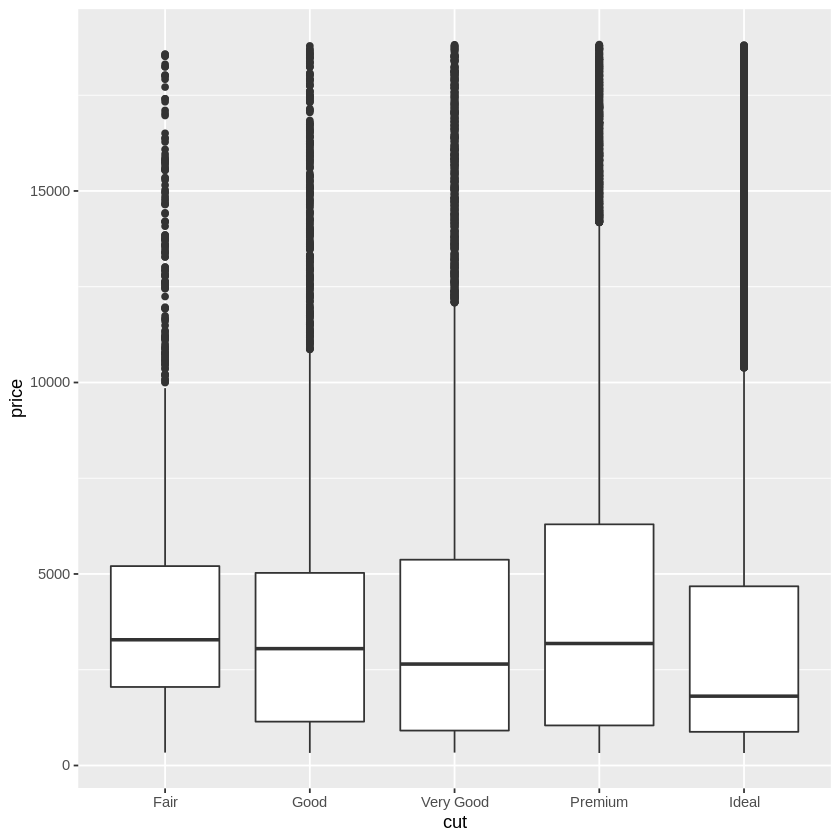

In [ ]:
diamonds %>% ggplot(aes(cut, price)) + geom_boxplot()

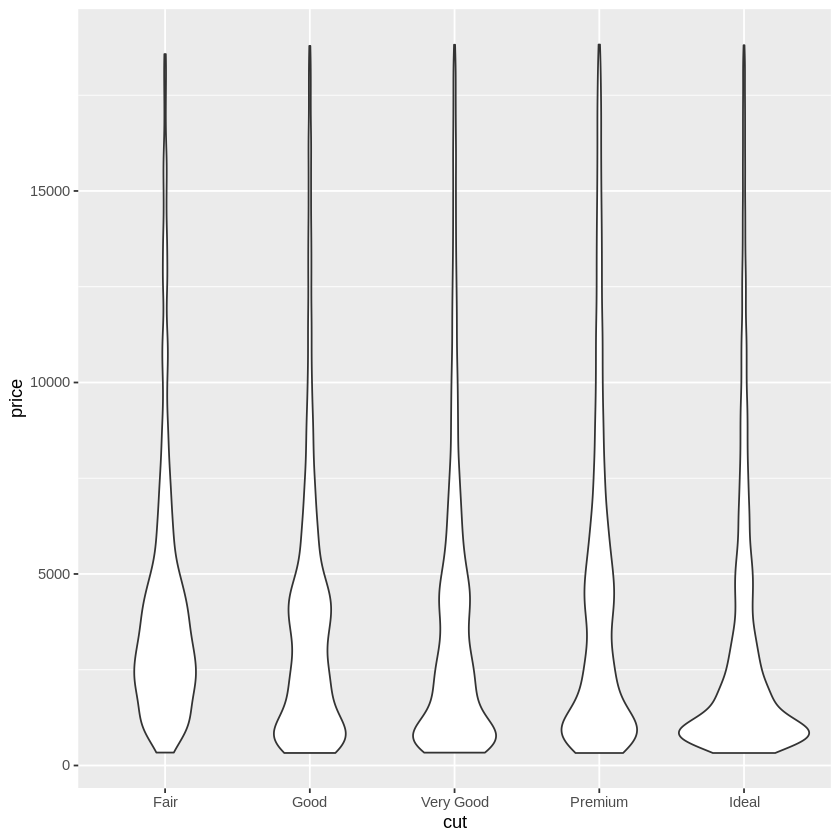

In [ ]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin()

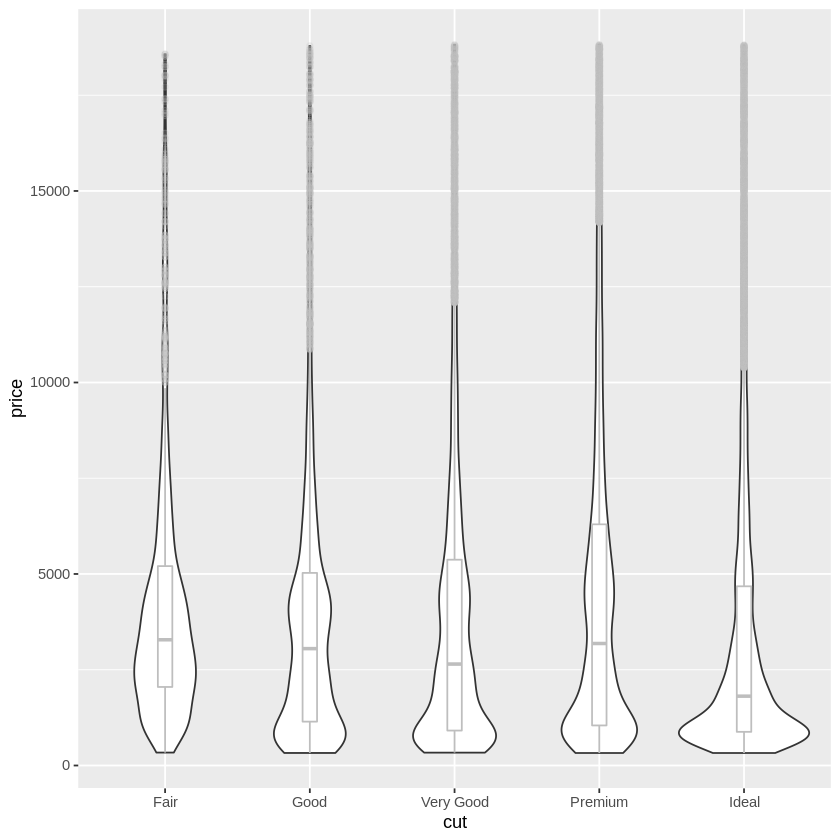

In [ ]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2)

In [1]:
# chapter 2:

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_02/data/earthquakes.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_02/data/example_data.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_02/data/parsed.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_02/data/quakes.db

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_02/data/tsunamis.csv

!mkdir data

!mv *.csv data

!mv *.db data

# chapter 3

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/bitcoin.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/dirty_data.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/long_data.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/nyc_temperatures.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/sp500.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/wide_data.csv

!mkdir data

!mv *.csv data

# chapter 4

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/dirty_data.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/fb_2018.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/fb_week_of_may_20_per_minute.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/melted_stock_data.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/nyc_weather_2018.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/stocks.db

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather.db

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather_by_station.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather_stations.csv

!mkdir data

!mv *.* data

# chapter 5

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/covid19_cases.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/earthquakes.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/fb_stock_prices_2018.csv

!mkdir data

!mv *.csv data

# chapter 6

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_06/data/covid19_cases.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_06/data/earthquakes.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_06/data/fb_stock_prices_2018.csv

!mkdir data

!mv *.csv data

--2024-10-16 05:05:59--  https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_02/data/earthquakes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3515656 (3.4M) [text/plain]
Saving to: ‘earthquakes.csv’

earthquakes.csv     100%[===================>]   3.35M  --.-KB/s    in 0.02s   

2024-10-16 05:06:00 (162 MB/s) - ‘earthquakes.csv’ saved [3515656/3515656]

--2024-10-16 05:06:00--  https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_02/data/example_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.13

# Python(data-structure)

## Pandas Data Structures Overview
In this section, we will discuss the `Series`, `Index`, and `DataFrame` classes. To do so, we will read in a snippet of the CSV file we will work with later. Don't worry about that part yet, though.

## About the Data
In this notebook, we will be working with 5 rows from the earthquake data collected over September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))

## Working with NumPy Arrays
Let's read in a short CSV file (using `numpy`) for some sample data.

In [ ]:
import numpy as np

data = np.genfromtxt(
    'data/example_data.csv', delimiter=';',
    names=True, dtype=None, encoding='UTF'
)
data

array([('2018-10-13 11:10:23.560', '262km NW of Ozernovskiy, Russia', 'mww', 6.7, 'green', 1),
       ('2018-10-13 04:34:15.580', '25km E of Bitung, Indonesia', 'mww', 5.2, 'green', 0),
       ('2018-10-13 00:13:46.220', '42km WNW of Sola, Vanuatu', 'mww', 5.7, 'green', 0),
       ('2018-10-12 21:09:49.240', '13km E of Nueva Concepcion, Guatemala', 'mww', 5.7, 'green', 0),
       ('2018-10-12 02:52:03.620', '128km SE of Kimbe, Papua New Guinea', 'mww', 5.6, 'green', 1)],
      dtype=[('time', '<U23'), ('place', '<U37'), ('magType', '<U3'), ('mag', '<f8'), ('alert', '<U5'), ('tsunami', '<i8')])

We can find the dimensions with the `shape` attribute:

In [ ]:
data.shape

(5,)

We can find the data types with the `dtype` attribute:

In [ ]:
data.dtype

dtype([('time', '<U23'), ('place', '<U37'), ('magType', '<U3'), ('mag', '<f8'), ('alert', '<U5'), ('tsunami', '<i8')])

Each of the entries in the array is a row from the CSV file. NumPy arrays contain a single data type (unlike lists, which allow mixed types); this allows for fast, vectorized operations. When we read in the data, we got an array of `numpy.void` objects, which are created to store flexible types. This is because NumPy has to store several different data types per row: four strings, a float, and an integer. This means we can't take advantage of the performance improvements NumPy provides for single data type objects.

Say we want to find the maximum magnitude&mdash;we can use a **[list comprehension](https://www.python.org/dev/peps/pep-0202/)** to select the third index of each row, which is represented as a `numpy.void` object. This makes a list, meaning that we can take the maximum using the `max()` function:

In [ ]:
%%timeit
max([row[3] for row in data])

9.74 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


If we, instead, create a NumPy array for each column, this operation is much easier (and more efficient) to perform. We can use a **[dictionary comprehension](https://www.python.org/dev/peps/pep-0274/)** to make a dictionary where the keys are the column names and the values are NumPy arrays of the data:

In [ ]:
array_dict = {
    col: np.array([row[i] for row in data])
    for i, col in enumerate(data.dtype.names)
}
array_dict

{'time': array(['2018-10-13 11:10:23.560', '2018-10-13 04:34:15.580',
        '2018-10-13 00:13:46.220', '2018-10-12 21:09:49.240',
        '2018-10-12 02:52:03.620'], dtype='<U23'),
 'place': array(['262km NW of Ozernovskiy, Russia', '25km E of Bitung, Indonesia',
        '42km WNW of Sola, Vanuatu',
        '13km E of Nueva Concepcion, Guatemala',
        '128km SE of Kimbe, Papua New Guinea'], dtype='<U37'),
 'magType': array(['mww', 'mww', 'mww', 'mww', 'mww'], dtype='<U3'),
 'mag': array([6.7, 5.2, 5.7, 5.7, 5.6]),
 'alert': array(['green', 'green', 'green', 'green', 'green'], dtype='<U5'),
 'tsunami': array([1, 0, 0, 0, 1])}

Grabbing the maximum magnitude is now simply a matter of selecting the `mag` key and calling the `max()` method. This is nearly twice as fast as the list comprehension implementation when dealing with just 5 entries, imagine how much worse the first attempt will perform on large data sets:

In [ ]:
%%timeit
array_dict['mag'].max()

5.22 µs ± 100 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


However, this representation has other issues. Say we wanted to grab all the information for the earthquake with the maximum magnitude, how would we go about that? We would need to find the index of the maximum and then for each of the keys in the dictionary grab that index:

In [ ]:
np.array([
    value[array_dict['mag'].argmax()]
    for key, value in array_dict.items()
])

array(['2018-10-13 11:10:23.560', '262km NW of Ozernovskiy, Russia',
       'mww', '6.7', 'green', '1'], dtype='<U31')

The result is now a NumPy array of strings (our numeric values were converted), and we are now in the format from earlier. Also, consider trying to sort the data by magnitude from smallest to largest. In the first representation, we would have to sort the rows by examining the 3rd index. With the second representation, we would have to determine the order for the indices from the `mag` column, and then sort all the other arrays with those same indices. Clearly, working with several NumPy arrays of different data types at once is a bit cumbersome. However, `pandas` builds on top of NumPy arrays to make this easier. Let's start our exploration of `pandas` with an overview of the data structures.

## `Series`
The `Series` class provides a data structure for arrays of a single type with some additional functionality.

In [ ]:
import pandas as pd

place = pd.Series(array_dict['place'], name='place')
place

0          262km NW of Ozernovskiy, Russia
1              25km E of Bitung, Indonesia
2                42km WNW of Sola, Vanuatu
3    13km E of Nueva Concepcion, Guatemala
4      128km SE of Kimbe, Papua New Guinea
Name: place, dtype: object

Here are some commonly used attributes with `Series` objects:

|Attribute | Returns |
| --- | --- |
| `name` | The name of the `Series` object |
| `dtype` | The data type of the `Series` object |
| `shape` | Dimensions of the `Series` object in a tuple of the form `(number of rows,)` |
| `index` | The `Index` object that is part of the `Series` object |
| `values` | The data in the `Series` object |

For the most part, `pandas` objects use NumPy arrays for their internal data representations. However, for some data types, `pandas` builds upon NumPy to create its own [arrays](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html). For this reason, depending on the data type, `values` can either be a `pandas.array` or `numpy.array` object. Therefore, if we need to ensure we get a specific type back, then it is recommended to use the `array` attribute or `to_numpy()` method, respectively, instead of `values`.

Now let's see some examples using these attributes.

### Getting the name of the series
The NumPy array held the name of the data in the `dtype` attribute; here, we can access it directly:

In [ ]:
place.name

'place'

### Getting the data type
A `Series` object holds a single data type. Here it is `'O'` for object.

In [ ]:
place.dtype

dtype('O')

### Getting the dimensions of the series
Just as with NumPy, we can use `shape` to get the dimensions as `(rows, columns)`. `Series` objects are a single column, so they only have values for the rows dimension.

In [ ]:
place.shape

(5,)

### Isolating the values from the series
This `Series` object is storing its values as a NumPy array:

In [ ]:
place.values

array(['262km NW of Ozernovskiy, Russia', '25km E of Bitung, Indonesia',
       '42km WNW of Sola, Vanuatu',
       '13km E of Nueva Concepcion, Guatemala',
       '128km SE of Kimbe, Papua New Guinea'], dtype=object)

## `Index`
The addition of the `Index` class makes the `Series` class more powerful than a NumPy array. We can get the index from the `index` attribute of a `Series` object:

In [ ]:
place_index = place.index
place_index

RangeIndex(start=0, stop=5, step=1)

As with `Series` objects, we can access the underlying data via the `values` attribute. Note that this `Index` object is also built on top of a NumPy array:

In [ ]:
place_index.values

array([0, 1, 2, 3, 4])

Here are some commonly used attributes with `Index` objects:

|Attribute | Returns |
| --- | --- |
| `name` | The name of the `Index` object |
| `dtype` | The data type of the `Index` object |
| `shape` | Dimensions of the `Index` object |
| `values` | The data in the `Index` object |
| `is_unique` | Check if the `Index` object has all unique values |

We can check the type of the underlying data, just like with a `Series` object:

In [ ]:
place_index.dtype

dtype('int64')

Same for the dimensions:

In [ ]:
place_index.shape

(5,)

We can check if the values are unique:

In [ ]:
place_index.is_unique

True

With NumPy we can perform arithmetic operations element-wise between arrays:

In [ ]:
np.array([1, 1, 1]) + np.array([-1, 0, 1])

array([0, 1, 2])

Pandas supports this as well, and the index determines how element-wise operations are performed. With addition, only the matching indices are summed:

In [ ]:
numbers = np.linspace(0, 10, num=5) # makes numpy array([0, 2.5, 5, 7.5, 10])
x = pd.Series(numbers) # index is [0, 1, 2, 3, 4]
y = pd.Series(numbers, index=pd.Index([1, 2, 3, 4, 5]))
x + y

0     NaN
1     2.5
2     7.5
3    12.5
4    17.5
5     NaN
dtype: float64

We aren't limited to the integer indices of list-like structures, and we can label our rows. The labels can be altered at any time and be things like dates or even another column. In chapter 3, we will discuss how to perform some operations on the index in order to change it. Then, in chapter 4, we will use the index for operations merging data and aggregating it.

## `DataFrame`
Having a `Series` object for each column is an improvement over the NumPy representation; however, we still have the same problem when wanting to sort based on a value or grab an entire row out. The `DataFrame` gives us a representation of a table formed from many `Series` objects that form the columns and a shared `Index` object that labels the rows. We can create a `DataFrame` object from either of the NumPy representations we were working with earlier (we could also make a `Series` object for each column, but there is no need to do so):

In [ ]:
df = pd.DataFrame(array_dict)

# this will also work with the first representation
# df = pd.DataFrame(data)

df

,time,place,magType,mag,alert,tsunami
0,2018-10-13 11:10:23.560,"262km NW of Ozernovskiy, Russia",mww,6.7,green,1
1,2018-10-13 04:34:15.580,"25km E of Bitung, Indonesia",mww,5.2,green,0
2,2018-10-13 00:13:46.220,"42km WNW of Sola, Vanuatu",mww,5.7,green,0
3,2018-10-12 21:09:49.240,"13km E of Nueva Concepcion, Guatemala",mww,5.7,green,0
4,2018-10-12 02:52:03.620,"128km SE of Kimbe, Papua New Guinea",mww,5.6,green,1


We can check the type of the underlying data with `dtypes` (note that it is not `dtype` as with `Series` and `Index` objects since each column will have its own data type):

In [ ]:
df.dtypes

time        object
place       object
magType     object
mag        float64
alert       object
tsunami      int64
dtype: object

We can get the underlying data with the `values` attribute. Note that this looks very similar to our initial NumPy representation:

In [ ]:
df.values

array([['2018-10-13 11:10:23.560', '262km NW of Ozernovskiy, Russia',
        'mww', 6.7, 'green', 1],
       ['2018-10-13 04:34:15.580', '25km E of Bitung, Indonesia', 'mww',
        5.2, 'green', 0],
       ['2018-10-13 00:13:46.220', '42km WNW of Sola, Vanuatu', 'mww',
        5.7, 'green', 0],
       ['2018-10-12 21:09:49.240',
        '13km E of Nueva Concepcion, Guatemala', 'mww', 5.7, 'green', 0],
       ['2018-10-12 02:52:03.620', '128km SE of Kimbe, Papua New Guinea',
        'mww', 5.6, 'green', 1]], dtype=object)

We can isolate the columns with the `columns` attribute. Notice that the columns are actually an `Index` object just on a different axis (columns are the horizontal index while rows are the vertical index).

In [ ]:
df.columns

Index(['time', 'place', 'magType', 'mag', 'alert', 'tsunami'], dtype='object')

Here are some commonly used attributes:

|Attribute | Returns |
| --- | --- |
| `dtypes` | The data types of each column |
| `shape` | Dimensions of the `DataFrame` object in a tuple of the form `(number of rows, number of columns)` |
| `index` | The `Index` object along the rows of the `DataFrame` object |
| `columns` | The name of the columns (as an `Index` object) |
| `values` | The data in the `DataFrame` object |
| `empty` | Check if the `DataFrame` object is empty |

The `Index` object along the rows of the dataframe can be accessed via the `index` attribute (just as with `Series` objects):

In [ ]:
df.index

RangeIndex(start=0, stop=5, step=1)

As with both `Series` and `Index` objects, we can get the dimensions of the dataframe with the `shape` attribute. The result is of the form `(nrows, ncols)`. Our dataframe has 5 rows and 6 columns:

In [ ]:
df.shape

(5, 6)

Note that we can also perform arithmetic on dataframes. Pandas will only perform the operation when both the index and column match. Here, we demonstrate addition. Since addition with strings means concatenation, `pandas` concatenated the string columns (`time`, `place`, `magType`, and `alert`) across dataframes. The numeric columns (`mag` and `tsunami`) were summed:

In [ ]:
df + df

,time,place,magType,mag,alert,tsunami
0,2018-10-13 11:10:23.5602018-10-13 11:10:23.560,"262km NW of Ozernovskiy, Russia262km NW of Oze...",mwwmww,13.4,greengreen,2
1,2018-10-13 04:34:15.5802018-10-13 04:34:15.580,"25km E of Bitung, Indonesia25km E of Bitung, I...",mwwmww,10.4,greengreen,0
2,2018-10-13 00:13:46.2202018-10-13 00:13:46.220,"42km WNW of Sola, Vanuatu42km WNW of Sola, Van...",mwwmww,11.4,greengreen,0
3,2018-10-12 21:09:49.2402018-10-12 21:09:49.240,"13km E of Nueva Concepcion, Guatemala13km E of...",mwwmww,11.4,greengreen,0
4,2018-10-12 02:52:03.6202018-10-12 02:52:03.620,"128km SE of Kimbe, Papua New Guinea128km SE of...",mwwmww,11.2,greengreen,2


<hr>
<div>
    <a href="../ch_01/introduction_to_data_analysis.ipynb">
        <button style="float: left;">&#8592; Chapter 1</button>
    </a>
    <a href="./2-creating_dataframes.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>

# Python(DataFrame)

## Creating DataFrames
We will create `DataFrame` objects from other data structures in Python, by reading in a CSV file, and by querying a database.

## About the Data
In this notebook, we will be working with earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))

## Imports

In [ ]:
import datetime as dt
import numpy as np
import pandas as pd

## Creating a `Series` object

In [ ]:
np.random.seed(0) # set a seed for reproducibility
pd.Series(np.random.rand(5), name='random')

0    0.548814
1    0.715189
2    0.602763
3    0.544883
4    0.423655
Name: random, dtype: float64

## Creating a `DataFrame` object from a `Series` object
Use the `to_frame()` method:

In [ ]:
pd.Series(np.linspace(0, 10, num=5)).to_frame()

,0
0,0.0
1,2.5
2,5.0
3,7.5
4,10.0


## Creating a `DataFrame` from Python Data Structures
### From a dictionary of list-like structures
The dictionary values can be lists, NumPy arrays, etc. as long as they have length (generators don't have length so we can't use them here):

In [ ]:
np.random.seed(0) # set seed so result is reproducible
pd.DataFrame(
    {
        'random': np.random.rand(5),
        'text': ['hot', 'warm', 'cool', 'cold', None],
        'truth': [np.random.choice([True, False]) for _ in range(5)]
    },
    index=pd.date_range(
        end=dt.date(2019, 4, 21),
        freq='1D',
        periods=5,
        name='date'
    )
)

,random,text,truth
date,,,
2019-04-17,0.548814,hot,False
2019-04-18,0.715189,warm,True
2019-04-19,0.602763,cool,True
2019-04-20,0.544883,cold,False
2019-04-21,0.423655,None,True


### From a list of dictionaries

In [ ]:
pd.DataFrame([
    {'mag': 5.2, 'place': 'California'},
    {'mag': 1.2, 'place': 'Alaska'},
    {'mag': 0.2, 'place': 'California'},
])

,mag,place
0,5.2,California
1,1.2,Alaska
2,0.2,California


### From a list of tuples

In [ ]:
list_of_tuples = [(n, n**2, n**3) for n in range(5)]
list_of_tuples

[(0, 0, 0), (1, 1, 1), (2, 4, 8), (3, 9, 27), (4, 16, 64)]

In [ ]:
pd.DataFrame(
    list_of_tuples,
    columns=['n', 'n_squared', 'n_cubed']
)

,n,n_squared,n_cubed
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


### From a NumPy array

In [ ]:
pd.DataFrame(
    np.array([
        [0, 0, 0],
        [1, 1, 1],
        [2, 4, 8],
        [3, 9, 27],
        [4, 16, 64]
    ]), columns=['n', 'n_squared', 'n_cubed']
)

,n,n_squared,n_cubed
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


## Creating a `DataFrame` object from the contents of a CSV File

### Finding information on the file before reading it in
Before attempting to read in a file, we can use the command line to see important information about the file that may determine how we read it in. We can run command line code from Jupyter Notebooks (thanks to IPython) by using `!` before the code.

#### Number of lines (row count)
For example, we can find out how many lines are in the file by using the `wc` utility (word count) and counting lines in the file (`-l`). The file has 9,333 lines:

In [ ]:
!wc -l data/earthquakes.csv

9333 data/earthquakes.csv


**Windows users**: if the above doesn't work for you (depends on your setup), then use this instead:

```python
!find /c /v "" data\earthquakes.csv
```



#### File size
We can find the file size by using `ls` to list the files in the `data` directory, and passing in the flags `-lh` to include the file size in human readable format. Then we use `grep` to find the file in question. Note that `|` passes the result of `ls` to `grep`. The `grep` utility is used for finding items that match patterns.

This tells us the file is 3.4 MB:

In [ ]:
!ls -lh data | grep earthquakes.csv

-rw-r--r-- 1 stefanie stefanie 3.4M Aug 24 17:39 earthquakes.csv


**Windows users**: if the above doesn't work for you (depends on your setup), then use this instead:

```python
!dir data | findstr "earthquakes.csv"
```

We can even capture the result of a command and use it in our Python code:

In [ ]:
files = !ls -lh data
[file for file in files if 'earthquake' in file]

['-rw-r--r-- 1 stefanie stefanie 3.4M Aug 24 17:39 earthquakes.csv']

**Windows users**: if the above doesn't work for you (depends on your setup), then use this instead:

```python
files = !dir data
[file for file in files if 'earthquake' in file]
```


#### Examining a few rows
We can use `head` to look at the top `n` rows of the file. With the `-n` flag, we can specify how many. This shows use that the first row of the file contains headers and that it is comma-separated (just because the file extension is `.csv` doesn't it contains comma-separated values):

In [ ]:
!head -n 2 data/earthquakes.csv

alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz,updated,url
,,37389218,https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci37389218&format=geojson,0.008693,,85.0,",ci37389218,",1.35,ml,,ci,26.0,"9km NE of Aguanga, CA",0.19,28,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventpage/ci37389218


**Windows users**: if the above doesn't work for you (depends on your setup), then use this instead:

```python
n = 2
with open('data/earthquakes.csv', 'r') as file:
    for _ in range(n):
        print(file.readline(), end='\r')
```


Just like `head` gives rows from the top, `tail` gives rows from the bottom. This can help us check that there is no extraneous data on the bottom of the field, like perhaps some metadata about the fields that actually isn't part of the dataset:

In [ ]:
!tail -n 1 data/earthquakes.csv

,,38063935,https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci38063935&format=geojson,0.01698,,39.0,",ci38063935,",0.66,ml,,ci,24.0,"9km NE of Aguanga, CA",0.1,7,",ci,",reviewed,1537228864470,"M 0.7 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin,phase-data,scitech-link,",-480.0,1537305830770,https://earthquake.usgs.gov/earthquakes/eventpage/ci38063935


**Windows users**: if the above doesn't work for you (depends on your setup), then use this instead:

```python
import os

with open('data/earthquakes.csv', 'rb') as file:
    file.seek(0, os.SEEK_END)
    while file.read(1) != b'\n':
        file.seek(-2, os.SEEK_CUR)
    print(file.readline().decode())
```

*Note*: To inspect more than one row from the end of the file, you will have to use this instead, which requires reading the whole file:

```python
n = 2
with open('data/earthquakes.csv', 'r') as file:
    print('\r'.join(file.readlines()[-n:]))
```

#### Column count
We can use `awk` to find the column count. This is a utility for pattern scanning and processing. The `-F` flag allows us to specify the delimiter (comma, in this case). Then we specify what to do for each record in the file. We choose to print `NF` which is a predefined variable whose value is the number of fields in the current record. Here, we say `exit` so that we print the number of fields (columns, here) in the first row of the file, then we stop.

This tells us we have 26 data columns:

In [ ]:
!awk -F',' '{print NF; exit}' data/earthquakes.csv

26


**Windows users**: if the above or below don't work for you (depends on your setup), then use this instead:

```python
with open('data/earthquakes.csv', 'r') as file:
    print(len(file.readline().split(',')))
```


Since we know the 1st line of the file had headers, and the file is comma-separated, we can also count the columns by using `head` to get headers and parsing them in Python:

In [ ]:
headers = !head -n 1 data/earthquakes.csv
len(headers[0].split(','))

26

**Windows users**: if you had to use the alternatives above, consider trying out [Cygwin](https://www.cygwin.com) or [Windows Subsystem for Linux (WSL)](https://docs.microsoft.com/en-us/windows/wsl/about).

### Reading in the file
Our file is small in size, has headers in the first row, and is comma-separated, so we don't need to provide any additional arguments to read in the file with `pd.read_csv()`, but be sure to check the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for possible arguments:

In [ ]:
df = pd.read_csv('data/earthquakes.csv')

Note that we can also pass in a URL. Let's read this same file from GitHub:

In [ ]:
df = pd.read_csv(
    'https://github.com/stefmolin/'
    'Hands-On-Data-Analysis-with-Pandas-2nd-edition'
    '/blob/master/ch_02/data/earthquakes.csv?raw=True'
)

Pandas is usually very good at figuring out which options to use based on the input data, so we often won't need to add arguments to the call; however, there are many options available should we need them, some of which include the following:

| Parameter | Purpose |
| --- | --- |
| `sep` | Specifies the delimiter |
| `header` | Row number where the column names are located; the default option has `pandas` infer whether they are present |
| `names` | List of column names to use as the header |
| `index_col` | Column to use as the index |
| `usecols` | Specifies which columns to read in |
| `dtype` | Specifies data types for the columns |
| `converters` | Specifies functions for converting data in certain columns |
| `skiprows` | Rows to skip |
| `nrows` | Number of rows to read at a time (combine with `skiprows` to read a file bit by bit) |
| `parse_dates` | Automatically parse columns containing dates into datetime objects |
| `chunksize` | For reading the file in chunks |
| `compression` | For reading in compressed files without extracting beforehand |
| `encoding` | Specifies the file encoding |

## Writing a `DataFrame` Object to a CSV File
Note that the index of `df` is just row numbers, so we don't want to keep it. Therefore, we pass `index=False` to the `to_csv()` method:

In [ ]:
df.to_csv('output.csv', index=False)

## Writing a `DataFrame` Object to a Database
Note the `if_exists` parameter. By default, it will give you an error if you try to write a table that already exists. Here, we don't care if it is overwritten. Lastly, if we are interested in appending new rows, we set that to `'append'`.

In [ ]:
import sqlite3

with sqlite3.connect('data/quakes.db') as connection:
    pd.read_csv('data/tsunamis.csv').to_sql(
        'tsunamis', connection, index=False, if_exists='replace'
    )

## Creating a `DataFrame` Object by Querying a Database
Using a SQLite database. Otherwise you need to install [SQLAlchemy](https://www.sqlalchemy.org/).

In [ ]:
import sqlite3

with sqlite3.connect('data/quakes.db') as connection:
    tsunamis = pd.read_sql('SELECT * FROM tsunamis', connection)

tsunamis.head()

,alert,type,title,place,magType,mag,time
0,None,earthquake,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...","165km NNW of Flying Fish Cove, Christmas Island",mww,5.0,1539459504090
1,green,earthquake,"M 6.7 - 262km NW of Ozernovskiy, Russia","262km NW of Ozernovskiy, Russia",mww,6.7,1539429023560
2,green,earthquake,"M 5.6 - 128km SE of Kimbe, Papua New Guinea","128km SE of Kimbe, Papua New Guinea",mww,5.6,1539312723620
3,green,earthquake,"M 6.5 - 148km S of Severo-Kuril'sk, Russia","148km S of Severo-Kuril'sk, Russia",mww,6.5,1539213362130
4,green,earthquake,"M 6.2 - 94km SW of Kokopo, Papua New Guinea","94km SW of Kokopo, Papua New Guinea",mww,6.2,1539208835130


<hr>
<div>
    <a href="./1-pandas_data_structures.ipynb">
        <button style="float: left;">&#8592; Previous Notebook</button>
    </a>
    <a href="./3-making_dataframes_from_api_requests.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>

# Python(DataFrame-API)

## Making Pandas DataFrames from API Requests
In this example, we will use the U.S. Geological Survey's API to grab a JSON object of earthquake data and convert it to a `pandas.DataFrame`.

USGS API: https://earthquake.usgs.gov/fdsnws/event/1/

### Get Data from API

In [ ]:
import datetime as dt
import pandas as pd
import requests

yesterday = dt.date.today() - dt.timedelta(days=1)
api = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
payload = {
    'format': 'geojson',
    'starttime': yesterday - dt.timedelta(days=30),
    'endtime': yesterday
}
response = requests.get(api, params=payload)

# let's make sure the request was OK
response.status_code

200

Response of 200 means OK, so we can pull the data out of the result. Since we asked the API for a JSON payload, we can extract it from the response with the `json()` method.

### Isolate the Data from the JSON Response
We need to check the structures of the response data to know where our data is.

In [ ]:
earthquake_json = response.json()
earthquake_json.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

The USGS API provides information about our request in the `metadata` key. Note that your result will be different, regardless of the date range you chose, because the API includes a timestamp for when the data was pulled:

In [ ]:
earthquake_json['metadata']

{'generated': 1604267813000,
 'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2020-10-01&endtime=2020-10-31',
 'title': 'USGS Earthquakes',
 'status': 200,
 'api': '1.10.3',
 'count': 13706}

Each element in the JSON array `features` is a row of data for our dataframe.

In [ ]:
type(earthquake_json['features'])

list

Your data will be different depending on the date you run this.

In [ ]:
earthquake_json['features'][0]

{'type': 'Feature',
 'properties': {'mag': 1,
  'place': '50 km ENE of Susitna North, Alaska',
  'time': 1604102395919,
  'updated': 1604103325550,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak020dz5f85a',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ak020dz5f85a&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 15,
  'net': 'ak',
  'code': '020dz5f85a',
  'ids': ',ak020dz5f85a,',
  'sources': ',ak,',
  'types': ',origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': 1.36,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 1.0 - 50 km ENE of Susitna North, Alaska'},
 'geometry': {'type': 'Point', 'coordinates': [-148.9807, 62.3533, 5]},
 'id': 'ak020dz5f85a'}

### Convert to DataFrame
We need to grab the `properties` section out of every entry in the `features` JSON array to create our dataframe.

In [ ]:
earthquake_properties_data = [
    quake['properties'] for quake in earthquake_json['features']
]
df = pd.DataFrame(earthquake_properties_data)
df.head()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,1.00,"50 km ENE of Susitna North, Alaska",1604102395919,1604103325550,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ak020dz5f85a,",",ak,",",origin,phase-data,",NaN,NaN,1.36,NaN,ml,earthquake,"M 1.0 - 50 km ENE of Susitna North, Alaska"
1,0.64,"15km NNE of Warner Springs, CA",1604102330860,1604114890185,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci39451271,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",23.0,0.06759,0.16,123.0,ml,earthquake,"M 0.6 - 15km NNE of Warner Springs, CA"
2,1.09,"15km NNE of Warner Springs, CA",1604102075440,1604102309453,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci39451255,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",39.0,0.06308,0.22,91.0,ml,earthquake,"M 1.1 - 15km NNE of Warner Springs, CA"
3,0.34,"15km NNE of Warner Springs, CA",1604101989680,1604102996061,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci39451263,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",15.0,0.06228,0.15,129.0,ml,earthquake,"M 0.3 - 15km NNE of Warner Springs, CA"
4,0.59,"13km NE of Indio, CA",1604101849950,1604102079270,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci39451231,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",17.0,0.09717,0.19,98.0,ml,earthquake,"M 0.6 - 13km NE of Indio, CA"


### (Optional) Write Data to CSV

In [ ]:
df.to_csv('earthquakes.csv', index=False)

<hr>
<div>
    <a href="./2-creating_dataframes.ipynb">
        <button style="float: left;">&#8592; Previous Notebook</button>
    </a>
    <a href="./4-inspecting_dataframes.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>

# Python(Data inspecting)

## Inspecting a DataFrame Object

## About the Data
In this notebook, we will be working with earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))

## Setup
We will be working with the `data/earthquakes.csv` file again, so we need to handle our imports and read it in.

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/earthquakes.csv')

## Examining dataframes
### Is it empty?

In [ ]:
df.empty

False

### What are the dimensions?

In [ ]:
df.shape

(9332, 26)

### What columns do we have?
We know there are 26 columns, but what are they? Let's use the `columns` attribute to see:

In [ ]:
df.columns

Index(['alert', 'cdi', 'code', 'detail', 'dmin', 'felt', 'gap', 'ids', 'mag',
       'magType', 'mmi', 'net', 'nst', 'place', 'rms', 'sig', 'sources',
       'status', 'time', 'title', 'tsunami', 'type', 'types', 'tz', 'updated',
       'url'],
      dtype='object')

### What does the data look like?
View rows from the top with `head()`:

In [ ]:
df.head()

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.026180,NaN,39.0,",ci37389186,",0.44,ml,...,",ci,",automatic,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...
4,NaN,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.077990,NaN,192.0,",nc73096941,",2.16,md,...,",nc,",automatic,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539477547926,https://earthquake.usgs.gov/earthquakes/eventp...


View rows from the bottom with `tail()`. Let's view 2 rows:

In [ ]:
df.tail(2)

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
9330,NaN,NaN,38063959,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01865,NaN,61.0,",ci38063959,",1.10,ml,...,",ci,",reviewed,1537229545350,"M 1.1 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1537230211640,https://earthquake.usgs.gov/earthquakes/eventp...
9331,NaN,NaN,38063935,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01698,NaN,39.0,",ci38063935,",0.66,ml,...,",ci,",reviewed,1537228864470,"M 0.7 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1537305830770,https://earthquake.usgs.gov/earthquakes/eventp...


*Tip: we can modify the display options in order to see more columns:*

```python
# check the max columns setting
>>> pd.get_option('display.max_columns')
20

# set the max columns to show when printing the dataframe to 26
>>> pd.set_option('display.max_columns', 26)
# OR
>>> pd.options.display.max_columns = 26

# reset the option
>>> pd.reset_option('display.max_columns')

# get information on all display settings
>>> pd.describe_option('display')
```

*More information can be found in the documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).*

### What data types do we have?

In [ ]:
df.dtypes

alert       object
cdi        float64
code        object
detail      object
dmin       float64
felt       float64
gap        float64
ids         object
mag        float64
magType     object
mmi        float64
net         object
nst        float64
place       object
rms        float64
sig          int64
sources     object
status      object
time         int64
title       object
tsunami      int64
type        object
types       object
tz         float64
updated      int64
url         object
dtype: object

### Getting extra info and finding nulls

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9332 entries, 0 to 9331
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alert    59 non-null     object 
 1   cdi      329 non-null    float64
 2   code     9332 non-null   object 
 3   detail   9332 non-null   object 
 4   dmin     6139 non-null   float64
 5   felt     329 non-null    float64
 6   gap      6164 non-null   float64
 7   ids      9332 non-null   object 
 8   mag      9331 non-null   float64
 9   magType  9331 non-null   object 
 10  mmi      93 non-null     float64
 11  net      9332 non-null   object 
 12  nst      5364 non-null   float64
 13  place    9332 non-null   object 
 14  rms      9332 non-null   float64
 15  sig      9332 non-null   int64  
 16  sources  9332 non-null   object 
 17  status   9332 non-null   object 
 18  time     9332 non-null   int64  
 19  title    9332 non-null   object 
 20  tsunami  9332 non-null   int64  
 21  type     9332 

## Describing and Summarizing
### Get summary statistics

In [ ]:
df.describe()

,cdi,dmin,felt,gap,mag,mmi,nst,rms,sig,time,tsunami,tz,updated
count,329.000000,6139.000000,329.000000,6164.000000,9331.000000,93.000000,5364.000000,9332.000000,9332.000000,9.332000e+03,9332.000000,9331.000000,9.332000e+03
mean,2.754711,0.544925,12.310030,121.506588,1.497345,3.651398,19.053878,0.362122,56.899914,1.538284e+12,0.006537,-451.990140,1.538537e+12
std,1.010637,2.214305,48.954944,72.962363,1.203347,1.790523,15.492315,0.317784,91.872163,6.080306e+08,0.080589,231.752571,6.564135e+08
min,0.000000,0.000648,0.000000,12.000000,-1.260000,0.000000,0.000000,0.000000,0.000000,1.537229e+12,0.000000,-720.000000,1.537230e+12
25%,2.000000,0.020425,1.000000,66.142500,0.720000,2.680000,8.000000,0.119675,8.000000,1.537793e+12,0.000000,-540.000000,1.537996e+12
50%,2.700000,0.059050,2.000000,105.000000,1.300000,3.720000,15.000000,0.210000,26.000000,1.538245e+12,0.000000,-480.000000,1.538621e+12
75%,3.300000,0.177250,5.000000,159.000000,1.900000,4.570000,25.000000,0.590000,56.000000,1.538766e+12,0.000000,-480.000000,1.539110e+12
max,8.400000,53.737000,580.000000,355.910000,7.500000,9.120000,172.000000,1.910000,2015.000000,1.539475e+12,1.000000,720.000000,1.539537e+12


Specifying the 5<sup>th</sup> and 95<sup>th</sup> percentile:

In [ ]:
df.describe(percentiles=[0.05, 0.95])

,cdi,dmin,felt,gap,mag,mmi,nst,rms,sig,time,tsunami,tz,updated
count,329.000000,6139.000000,329.000000,6164.000000,9331.000000,93.000000,5364.000000,9332.000000,9332.000000,9.332000e+03,9332.000000,9331.000000,9.332000e+03
mean,2.754711,0.544925,12.310030,121.506588,1.497345,3.651398,19.053878,0.362122,56.899914,1.538284e+12,0.006537,-451.990140,1.538537e+12
std,1.010637,2.214305,48.954944,72.962363,1.203347,1.790523,15.492315,0.317784,91.872163,6.080306e+08,0.080589,231.752571,6.564135e+08
min,0.000000,0.000648,0.000000,12.000000,-1.260000,0.000000,0.000000,0.000000,0.000000,1.537229e+12,0.000000,-720.000000,1.537230e+12
5%,2.000000,0.005491,1.000000,35.000000,-0.040000,0.000000,4.000000,0.030000,0.000000,1.537344e+12,0.000000,-600.000000,1.537387e+12
50%,2.700000,0.059050,2.000000,105.000000,1.300000,3.720000,15.000000,0.210000,26.000000,1.538245e+12,0.000000,-480.000000,1.538621e+12
95%,4.300000,2.678900,40.200000,276.000000,4.400000,6.380000,49.000000,0.960000,298.000000,1.539319e+12,0.000000,-60.000000,1.539400e+12
max,8.400000,53.737000,580.000000,355.910000,7.500000,9.120000,172.000000,1.910000,2015.000000,1.539475e+12,1.000000,720.000000,1.539537e+12


Describe specific data types:

In [ ]:
df.describe(include=np.object)

,alert,code,detail,ids,magType,net,place,sources,status,title,type,types,url
count,59,9332,9332,9332,9331,9332,9332,9332,9332,9332,9332,9332,9332
unique,2,9332,9332,9332,10,14,5433,52,2,7807,5,42,9332
top,green,20262789,https://earthquake.usgs.gov/fdsnws/event/1/que...,",pr2018277012,",ml,ak,"10km NE of Aguanga, CA",",ak,",reviewed,"M 0.4 - 10km NE of Aguanga, CA",earthquake,",geoserve,origin,phase-data,",https://earthquake.usgs.gov/earthquakes/eventp...
freq,58,1,1,1,6803,3166,306,2981,7797,55,9081,5301,1


Or describe all of them:

In [ ]:
df.describe(include='all')

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
count,59,329.000000,9332,9332,6139.000000,329.000000,6164.000000,9332,9331.000000,9331,...,9332,9332,9.332000e+03,9332,9332.000000,9332,9332,9331.000000,9.332000e+03,9332
unique,2,NaN,9332,9332,NaN,NaN,NaN,9332,NaN,10,...,52,2,NaN,7807,NaN,5,42,NaN,NaN,9332
top,green,NaN,20262789,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,",pr2018277012,",NaN,ml,...,",ak,",reviewed,NaN,"M 0.4 - 10km NE of Aguanga, CA",NaN,earthquake,",geoserve,origin,phase-data,",NaN,NaN,https://earthquake.usgs.gov/earthquakes/eventp...
freq,58,NaN,1,1,NaN,NaN,NaN,1,NaN,6803,...,2981,7797,NaN,55,NaN,9081,5301,NaN,NaN,1
mean,NaN,2.754711,NaN,NaN,0.544925,12.310030,121.506588,NaN,1.497345,NaN,...,NaN,NaN,1.538284e+12,NaN,0.006537,NaN,NaN,-451.990140,1.538537e+12,NaN
std,NaN,1.010637,NaN,NaN,2.214305,48.954944,72.962363,NaN,1.203347,NaN,...,NaN,NaN,6.080306e+08,NaN,0.080589,NaN,NaN,231.752571,6.564135e+08,NaN
min,NaN,0.000000,NaN,NaN,0.000648,0.000000,12.000000,NaN,-1.260000,NaN,...,NaN,NaN,1.537229e+12,NaN,0.000000,NaN,NaN,-720.000000,1.537230e+12,NaN
25%,NaN,2.000000,NaN,NaN,0.020425,1.000000,66.142500,NaN,0.720000,NaN,...,NaN,NaN,1.537793e+12,NaN,0.000000,NaN,NaN,-540.000000,1.537996e+12,NaN
50%,NaN,2.700000,NaN,NaN,0.059050,2.000000,105.000000,NaN,1.300000,NaN,...,NaN,NaN,1.538245e+12,NaN,0.000000,NaN,NaN,-480.000000,1.538621e+12,NaN
75%,NaN,3.300000,NaN,NaN,0.177250,5.000000,159.000000,NaN,1.900000,NaN,...,NaN,NaN,1.538766e+12,NaN,0.000000,NaN,NaN,-480.000000,1.539110e+12,NaN


This works on columns also:

In [ ]:
df.felt.describe()

count    329.000000
mean      12.310030
std       48.954944
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      580.000000
Name: felt, dtype: float64

There are methods for specific statistics as well. Here is a sampling of them:

| Method | Description | Data types |
| --- | --- | --- |
| `count()` | The number of non-null observations | Any |
| `nunique()` | The number of unique values | Any |
| `sum()` | The total of the values | Numerical or Boolean |
| `mean()` | The average of the values | Numerical or Boolean |
| `median()` | The median of the values | Numerical |
| `min()` | The minimum of the values | Numerical |
| `idxmin()` | The index where the minimum values occurs | Numerical |
| `max()` | The maximum of the values | Numerical |
| `idxmax()` | The index where the maximum value occurs | Numerical |
| `abs()` | The absolute values of the data | Numerical |
| `std()` | The standard deviation | Numerical |
| `var()` | The variance |  Numerical |
| `cov()` | The covariance between two `Series`, or a covariance matrix for all column combinations in a `DataFrame` | Numerical |
| `corr()` | The correlation between two `Series`, or a correlation matrix for all column combinations in a `DataFrame` | Numerical |
| `quantile()` | Calculates a specific quantile | Numerical |
| `cumsum()` | The cumulative sum | Numerical or Boolean |
| `cummin()` | The cumulative minimum | Numerical |
| `cummax()` | The cumulative maximum | Numerical |

For example, finding the unique values in the `alert` column:

In [ ]:
df.alert.unique()

array([nan, 'green', 'red'], dtype=object)

We can then use `value_counts()` to see how many of each unique value we have:

In [ ]:
df.alert.value_counts()

green    58
red       1
Name: alert, dtype: int64

Note that `Index` objects also have several methods to help describe and summarize our data:

| Method | Description |
| --- | --- |
| `argmax()`/`argmin()` | Find the location of the maximum/minimum value in the index |
| `equals()` | Compare the index to another `Index` object for equality |
| `isin()` | Check if the index values are in a list of values and return an array of Booleans |
| `max()`/`min()` | Find the maximum/minimum value in the index |
| `nunique()` | Get the number of unique values in the index |
| `to_series()` | Create a `Series` object from the index |
| `unique()` | Find the unique values of the index |
| `value_counts()`| Create a frequency table for the unique values in the index |

<hr>
<div>
    <a href="./3-making_dataframes_from_api_requests.ipynb">
        <button style="float: left;">&#8592; Previous Notebook</button>
    </a>
    <a href="./5-subsetting_data.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>

# Python(subsetting)

## Subsetting the data

## About the Data
In this notebook, we will be working with earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))

## Setup
We will be working with the `data/earthquakes.csv` file again, so we need to handle our imports and read it in.

In [ ]:
import pandas as pd

df = pd.read_csv('data/earthquakes.csv')

## Selecting columns
Grab an entire column using attribute notation:

In [ ]:
df.mag

0       1.35
1       1.29
2       3.42
3       0.44
4       2.16
        ... 
9327    0.62
9328    1.00
9329    2.40
9330    1.10
9331    0.66
Name: mag, Length: 9332, dtype: float64

Grab an entire column using dictionary syntax:

In [ ]:
df['mag']

0       1.35
1       1.29
2       3.42
3       0.44
4       2.16
        ... 
9327    0.62
9328    1.00
9329    2.40
9330    1.10
9331    0.66
Name: mag, Length: 9332, dtype: float64

Selecting multiple columns:

In [ ]:
df[['mag', 'title']]

,mag,title
0,1.35,"M 1.4 - 9km NE of Aguanga, CA"
1,1.29,"M 1.3 - 9km NE of Aguanga, CA"
2,3.42,"M 3.4 - 8km NE of Aguanga, CA"
3,0.44,"M 0.4 - 9km NE of Aguanga, CA"
4,2.16,"M 2.2 - 10km NW of Avenal, CA"
...,...,...
9327,0.62,"M 0.6 - 9km ENE of Mammoth Lakes, CA"
9328,1.00,"M 1.0 - 3km W of Julian, CA"
9329,2.40,"M 2.4 - 35km NNE of Hatillo, Puerto Rico"
9330,1.10,"M 1.1 - 9km NE of Aguanga, CA"


Selecting columns using list comprehensions and string operations:

In [ ]:
df[
    ['title', 'time']
    + [col for col in df.columns if col.startswith('mag')]
]

,title,time,mag,magType
0,"M 1.4 - 9km NE of Aguanga, CA",1539475168010,1.35,ml
1,"M 1.3 - 9km NE of Aguanga, CA",1539475129610,1.29,ml
2,"M 3.4 - 8km NE of Aguanga, CA",1539475062610,3.42,ml
3,"M 0.4 - 9km NE of Aguanga, CA",1539474978070,0.44,ml
4,"M 2.2 - 10km NW of Avenal, CA",1539474716050,2.16,md
...,...,...,...,...
9327,"M 0.6 - 9km ENE of Mammoth Lakes, CA",1537230228060,0.62,md
9328,"M 1.0 - 3km W of Julian, CA",1537230135130,1.00,ml
9329,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",1537229908180,2.40,md
9330,"M 1.1 - 9km NE of Aguanga, CA",1537229545350,1.10,ml


Breaking down this example:
1. the list comprehension

In [ ]:
[col for col in df.columns if col.startswith('mag')]

['mag', 'magType']

2. assembling the list

In [ ]:
['title', 'time'] \
+ [col for col in df.columns if col.startswith('mag')]

['title', 'time', 'mag', 'magType']

3. using this list as the list of columns

In [ ]:
df[
    ['title', 'time']
    + [col for col in df.columns if col.startswith('mag')]
]

,title,time,mag,magType
0,"M 1.4 - 9km NE of Aguanga, CA",1539475168010,1.35,ml
1,"M 1.3 - 9km NE of Aguanga, CA",1539475129610,1.29,ml
2,"M 3.4 - 8km NE of Aguanga, CA",1539475062610,3.42,ml
3,"M 0.4 - 9km NE of Aguanga, CA",1539474978070,0.44,ml
4,"M 2.2 - 10km NW of Avenal, CA",1539474716050,2.16,md
...,...,...,...,...
9327,"M 0.6 - 9km ENE of Mammoth Lakes, CA",1537230228060,0.62,md
9328,"M 1.0 - 3km W of Julian, CA",1537230135130,1.00,ml
9329,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",1537229908180,2.40,md
9330,"M 1.1 - 9km NE of Aguanga, CA",1537229545350,1.10,ml


## Slicing
### Selecting rows
Using row numbers (inclusive of first index, exclusive of last):

In [ ]:
df[100:103]

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
100,NaN,NaN,20280310,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,",ak20280310,",1.20,ml,...,",ak,",automatic,1539435449480,"M 1.2 - 25km NW of Ester, Alaska",0,earthquake,",geoserve,origin,",-540.0,1539443551010,https://earthquake.usgs.gov/earthquakes/eventp...
101,NaN,NaN,73096756,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01355,NaN,185.0,",nc73096756,",0.59,md,...,",nc,",automatic,1539435391320,"M 0.6 - 8km ESE of Mammoth Lakes, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539439802162,https://earthquake.usgs.gov/earthquakes/eventp...
102,NaN,NaN,37388730,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.02987,NaN,39.0,",ci37388730,",1.33,ml,...,",ci,",automatic,1539435293090,"M 1.3 - 8km ENE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1539435940470,https://earthquake.usgs.gov/earthquakes/eventp...


### Selecting rows and columns with chaining

In [ ]:
df[['title', 'time']][100:103]

,title,time
100,"M 1.2 - 25km NW of Ester, Alaska",1539435449480
101,"M 0.6 - 8km ESE of Mammoth Lakes, CA",1539435391320
102,"M 1.3 - 8km ENE of Aguanga, CA",1539435293090


Order doesn't matter here:

In [ ]:
df[100:103][['title', 'time']].equals(
    df[['title', 'time']][100:103]
)

True

So we know how to select rows and columns, but can we update values? Well, if we try using what we have learned so far, we will see the following warning:

In [ ]:
df[110:113]['title'] = df[110:113]['title'].str.lower()

/home/stefaniemolin/book_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Note that it worked here, but `pandas` says we were setting a value on a copy of a slice and that we should use `loc` instead (topic of the following section):

In [ ]:
df[110:113]['title']

110               m 1.1 - 35km s of ester, alaska
111    m 1.9 - 93km wnw of arctic village, alaska
112      m 0.9 - 20km wsw of smith valley, nevada
Name: title, dtype: object

## Indexing

Now if we do this with `loc` as the warning suggests, everything goes smoothly. Note we have to lower the end index by one since `loc` is inclusive of endpoints:

In [ ]:
df.loc[110:112, 'title'] = df.loc[110:112, 'title'].str.lower()
df.loc[110:112, 'title']

110               m 1.1 - 35km s of ester, alaska
111    m 1.9 - 93km wnw of arctic village, alaska
112      m 0.9 - 20km wsw of smith valley, nevada
Name: title, dtype: object

### Indexing with `loc`
Selection of the format `loc[row_indexer, column_indexer]` where `:` can be used to select all:

In [ ]:
df.loc[:,'title']

0                  M 1.4 - 9km NE of Aguanga, CA
1                  M 1.3 - 9km NE of Aguanga, CA
2                  M 3.4 - 8km NE of Aguanga, CA
3                  M 0.4 - 9km NE of Aguanga, CA
4                  M 2.2 - 10km NW of Avenal, CA
                          ...                   
9327        M 0.6 - 9km ENE of Mammoth Lakes, CA
9328                 M 1.0 - 3km W of Julian, CA
9329    M 2.4 - 35km NNE of Hatillo, Puerto Rico
9330               M 1.1 - 9km NE of Aguanga, CA
9331               M 0.7 - 9km NE of Aguanga, CA
Name: title, Length: 9332, dtype: object

We can use `loc` to select specific rows and columns without chaining. If we use row numbers with `loc`, they are now **inclusive** of the end index:

In [ ]:
df.loc[10:15, ['title', 'mag']]

,title,mag
10,"M 0.5 - 10km NE of Aguanga, CA",0.50
11,"M 2.8 - 53km SE of Punta Cana, Dominican Republic",2.77
12,"M 0.5 - 9km NE of Aguanga, CA",0.50
13,"M 4.5 - 120km SSW of Banda Aceh, Indonesia",4.50
14,"M 2.1 - 14km NW of Parkfield, CA",2.13
15,"M 2.0 - 156km WNW of Haines Junction, Canada",2.00


#### Indexing with `iloc`
Exclusive of the endpoint just as Python slicing:

In [ ]:
df.iloc[10:15, [19, 8]]

,title,mag
10,"M 0.5 - 10km NE of Aguanga, CA",0.50
11,"M 2.8 - 53km SE of Punta Cana, Dominican Republic",2.77
12,"M 0.5 - 9km NE of Aguanga, CA",0.50
13,"M 4.5 - 120km SSW of Banda Aceh, Indonesia",4.50
14,"M 2.1 - 14km NW of Parkfield, CA",2.13


We can use slicing syntax with `iloc` for both rows and columns:

In [ ]:
df.iloc[10:15, 6:10]

,gap,ids,mag,magType
10,57.0,",ci37389162,",0.50,ml
11,186.0,",pr2018286010,",2.77,md
12,76.0,",ci37389146,",0.50,ml
13,157.0,",us1000hbti,",4.50,mb
14,71.0,",nc73096921,",2.13,md


When using `loc`, we can slice on column names. This will be inclusive of the endpoint because you can't be expected to know what the next column name will be. As such, we have multiple ways to achieve the same end goal:

In [ ]:
df.iloc[10:15, 6:10].equals(
    df.loc[10:14, 'gap':'magType']
)

True

### Looking up scalar values
We used `loc` and `iloc` to grab subsets of the dataframe. However, if we are just interested in the specific value at a given `[row, column]`, then we can use `iat` and `at`. We use `at` with labels:

In [ ]:
df.at[10, 'mag']

0.5

...and `iat` with integer indices:

In [ ]:
df.iat[10, 8]

0.5

## Filtering
We can filter our dataframes using a **Boolean mask**, which can be made as follows:

In [ ]:
df.mag > 2

0       False
1       False
2        True
3       False
4        True
        ...  
9327    False
9328    False
9329     True
9330    False
9331    False
Name: mag, Length: 9332, dtype: bool

To use a mask for selection, we simply place it inside the brackets:

In [ ]:
df[df.mag >= 7.0]

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
837,green,4.1,1000haa3,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.763,3.0,14.0,",us1000haa3,pt18283003,at00pgehsk,",7.0,mww,...,",us,pt,at,",reviewed,1539204500290,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",600.0,1539378744253,https://earthquake.usgs.gov/earthquakes/eventp...
5263,red,8.4,1000h3p4,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.589,18.0,27.0,",us1000h3p4,us1000h4p4,",7.5,mww,...,",us,us,",reviewed,1538128963480,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",480.0,1539123134531,https://earthquake.usgs.gov/earthquakes/eventp...


We can use masks with `loc`:

In [ ]:
df.loc[
    df.mag >= 7.0,
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
837,green,7.0,mww,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake
5263,red,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


Masks can be created using multiple criteria when combined with bitwise operators `&` for AND and `|` for OR. We must also surround each criterion with parentheses. We can't use `and`/`or` here because we need to evaluate row by row:

In [ ]:
df.loc[
    (df.tsunami == 1) & (df.alert == 'red'),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
5263,red,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


An example with an OR condition, which is less restrictive:

In [ ]:
df.loc[
    (df.tsunami == 1) | (df.alert == 'red'),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
36,NaN,5.0,mww,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...",1,earthquake
118,green,6.7,mww,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,earthquake
501,green,5.6,mww,"M 5.6 - 128km SE of Kimbe, Papua New Guinea",1,earthquake
799,green,6.5,mww,"M 6.5 - 148km S of Severo-Kuril'sk, Russia",1,earthquake
816,green,6.2,mww,"M 6.2 - 94km SW of Kokopo, Papua New Guinea",1,earthquake
...,...,...,...,...,...,...
8561,NaN,5.4,mb,"M 5.4 - 228km S of Taron, Papua New Guinea",1,earthquake
8624,NaN,5.1,mb,"M 5.1 - 278km SE of Pondaguitan, Philippines",1,earthquake
9133,green,5.1,ml,"M 5.1 - 64km SSW of Kaktovik, Alaska",1,earthquake
9175,NaN,5.2,mb,"M 5.2 - 126km N of Dili, East Timor",1,earthquake


Masks can be created from any criteria that results in a Boolean. For example, we can select all earthquakes with the string `Alaska` in the `place` column with a non-null value for the `alert` column. To get non-nulls, we can use the `isnull()` method with the bitwise negation operator (`~`) or the `notnull()` method:

In [ ]:
df.loc[
    (df.place.str.contains('Alaska')) & (df.alert.notnull()),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
1015,green,5.0,ml,"M 5.0 - 61km SSW of Chignik Lake, Alaska",1,earthquake
1273,green,4.0,ml,"M 4.0 - 71km SW of Kaktovik, Alaska",1,earthquake
1795,green,4.0,ml,"M 4.0 - 60km WNW of Valdez, Alaska",1,earthquake
2752,green,4.0,ml,"M 4.0 - 67km SSW of Kaktovik, Alaska",1,earthquake
3260,green,3.9,ml,"M 3.9 - 44km N of North Nenana, Alaska",0,earthquake
4101,green,4.2,ml,"M 4.2 - 131km NNW of Arctic Village, Alaska",0,earthquake
6897,green,3.8,ml,"M 3.8 - 80km SSW of Kaktovik, Alaska",0,earthquake
8524,green,3.8,ml,"M 3.8 - 69km SSW of Kaktovik, Alaska",0,earthquake
9133,green,5.1,ml,"M 5.1 - 64km SSW of Kaktovik, Alaska",1,earthquake


We can even use regular expressions here:

In [ ]:
df.loc[
    (df.place.str.contains(r'CA|California$')) & (df.mag > 3.8),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
1465,green,3.83,mw,"M 3.8 - 109km WNW of Trinidad, CA",0,earthquake
2414,green,3.83,mw,"M 3.8 - 5km SW of Tres Pinos, CA",1,earthquake


We can use the `between()` method to turn 2 individual checks (is less than or equal to some maximum value and is greater than or equal to some minimum value) into a single one. Note this is inclusive of the endpoint by default:

In [ ]:
df.loc[
    df.mag.between(6.5, 7.5),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
118,green,6.7,mww,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,earthquake
799,green,6.5,mww,"M 6.5 - 148km S of Severo-Kuril'sk, Russia",1,earthquake
837,green,7.0,mww,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake
4363,green,6.7,mww,"M 6.7 - 263km NNE of Ndoi Island, Fiji",1,earthquake
5263,red,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


We can use the `isin()` method to check for membership in a list of values:

In [ ]:
df.loc[
    df.magType.isin(['mw', 'mwb']),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
995,NaN,3.35,mw,"M 3.4 - 9km WNW of Cobb, CA",0,earthquake
1465,green,3.83,mw,"M 3.8 - 109km WNW of Trinidad, CA",0,earthquake
2414,green,3.83,mw,"M 3.8 - 5km SW of Tres Pinos, CA",1,earthquake
4988,green,4.41,mw,"M 4.4 - 1km SE of Delta, B.C., MX",1,earthquake
6307,green,5.80,mwb,"M 5.8 - 297km NNE of Ndoi Island, Fiji",0,earthquake
8257,green,5.70,mwb,"M 5.7 - 175km SSE of Lambasa, Fiji",0,earthquake


We can grab the index of the minimum and maximum values of a given column and use those to select the entire row where they occur:

In [ ]:
[df.mag.idxmin(), df.mag.idxmax()]

[2409, 5263]

In [ ]:
df.loc[
    [df.mag.idxmin(), df.mag.idxmax()],
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
2409,NaN,-1.26,ml,"M -1.3 - 41km ENE of Adak, Alaska",0,earthquake
5263,red,7.50,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


Note that there is a `filter()` method, but it doesn't filter the data in the same sense as we discussed in this section. Here are a few things you can do with this method.

- grab columns of a dataframe by passing a list to `items`:

In [ ]:
df.filter(items=['mag', 'magType']).head()

,mag,magType
0,1.35,ml
1,1.29,ml
2,3.42,ml
3,0.44,ml
4,2.16,md


- grab all the columns that contain a string with the `like` parameter:

In [ ]:
df.filter(like='mag').head()

,mag,magType
0,1.35,ml
1,1.29,ml
2,3.42,ml
3,0.44,ml
4,2.16,md


- use regular expressions; here, we select any columns that start with `t`:

In [ ]:
df.filter(regex=r'^t').head()

,time,title,tsunami,type,types,tz
0,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
2,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
3,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0


- use `filter()` along the rows, by passing in `axis=0`. Here, we will use the `place` column as the index (we will cover `set_index()` in chapter 3):

In [ ]:
df.set_index('place').filter(like='Japan', axis=0).filter(items=['mag', 'magType', 'title']).head()

,mag,magType,title
place,,,
"160km NNW of Nago, Japan",4.6,mb,"M 4.6 - 160km NNW of Nago, Japan"
"7km ESE of Asahi, Japan",5.2,mww,"M 5.2 - 7km ESE of Asahi, Japan"
"14km E of Tomakomai, Japan",4.5,mwr,"M 4.5 - 14km E of Tomakomai, Japan"
"139km WSW of Naze, Japan",4.7,mb,"M 4.7 - 139km WSW of Naze, Japan"
"53km ESE of Kamaishi, Japan",4.6,mb,"M 4.6 - 53km ESE of Kamaishi, Japan"


This also works on `Series` objects and will run on the index:

In [ ]:
df.set_index('place').title.filter(like='Japan').head()

place
160km NNW of Nago, Japan          M 4.6 - 160km NNW of Nago, Japan
7km ESE of Asahi, Japan            M 5.2 - 7km ESE of Asahi, Japan
14km E of Tomakomai, Japan      M 4.5 - 14km E of Tomakomai, Japan
139km WSW of Naze, Japan          M 4.7 - 139km WSW of Naze, Japan
53km ESE of Kamaishi, Japan    M 4.6 - 53km ESE of Kamaishi, Japan
Name: title, dtype: object

<hr>
<div>
    <a href="./4-inspecting_dataframes.ipynb">
        <button style="float: left;">&#8592; Previous Notebook</button>
    </a>
    <a href="./6-adding_and_removing_data.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>

# Python(Add and Remove)

## Adding and Removing Data

## About the Data
In this notebook, we will be working with earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))

## Setup
We will be working with the `data/earthquakes.csv` file again, so we need to handle our imports and read it in.

In [ ]:
import pandas as pd

df = pd.read_csv(
    'data/earthquakes.csv',
    usecols=['time', 'title', 'place', 'magType', 'mag', 'alert', 'tsunami']
)

## Creating new data
### Adding new columns
New columns get added to the right of the original columns and can be a single value, which will be **broadcast** along the rows of the dataframe:

In [ ]:
df['source'] = 'USGS API'
df.head()

,alert,mag,magType,place,time,title,tsunami,source
0,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,USGS API
1,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,USGS API
2,NaN,3.42,ml,"8km NE of Aguanga, CA",1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,USGS API
3,NaN,0.44,ml,"9km NE of Aguanga, CA",1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,USGS API
4,NaN,2.16,md,"10km NW of Avenal, CA",1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,USGS API


...or a Boolean mask:

In [ ]:
df['mag_negative'] = df.mag < 0
df.head()

,alert,mag,magType,place,time,title,tsunami,source,mag_negative
0,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,USGS API,False
1,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,USGS API,False
2,NaN,3.42,ml,"8km NE of Aguanga, CA",1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,USGS API,False
3,NaN,0.44,ml,"9km NE of Aguanga, CA",1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,USGS API,False
4,NaN,2.16,md,"10km NW of Avenal, CA",1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,USGS API,False


#### Adding the `parsed_place` column
We have an entity recognition problem on our hands with the `place` column. There are several entities that have multiple names in the data (e.g., CA and California, NV and Nevada).

In [ ]:
df.place.str.extract(r', (.*$)')[0].sort_values().unique()

array(['Afghanistan', 'Alaska', 'Argentina', 'Arizona', 'Arkansas',
       'Australia', 'Azerbaijan', 'B.C., MX', 'Barbuda', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba ', 'British Virgin Islands',
       'Burma', 'CA', 'California', 'Canada', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Colorado', 'Costa Rica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Ecuador region',
       'El Salvador', 'Fiji', 'Greece', 'Greenland', 'Guam', 'Guatemala',
       'Haiti', 'Hawaii', 'Honduras', 'Idaho', 'Illinois', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Kansas',
       'Kentucky', 'Kyrgyzstan', 'Martinique', 'Mauritius', 'Mayotte',
       'Mexico', 'Missouri', 'Montana', 'NV', 'Nevada', 'New Caledonia',
       'New Hampshire', 'New Mexico', 'New Zealand', 'Nicaragua',
       'North Carolina', 'Northern Mariana Islands', 'Oklahoma', 'Oregon',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Philippines',
       'Puerto Rico', 'Roman

Replace parts of the `place` names to fit our needs:

In [ ]:
df['parsed_place'] = df.place.str.replace(
    r'.* of ', '', regex=True # remove anything saying <something> of <something>
).str.replace(
    'the ', '' # remove "the "
).str.replace(
    r'CA$', 'California', regex=True # fix California
).str.replace(
    r'NV$', 'Nevada', regex=True # fix Nevada
).str.replace(
    r'MX$', 'Mexico', regex=True # fix Mexico
).str.replace(
    r' region$', '', regex=True # chop off endings with " region"
).str.replace(
    'northern ', '' # remove "northern "
).str.replace(
    'Fiji Islands', 'Fiji' # line up the Fiji places
).str.replace(
    r'^.*, ', '', regex=True # remove anything else extraneous from the beginning
).str.strip() # remove any extra spaces

Now we can use a single name to get all earthquakes for that place (although this still isn't perfect):

In [ ]:
df.parsed_place.sort_values().unique()

array(['Afghanistan', 'Alaska', 'Argentina', 'Arizona', 'Arkansas',
       'Ascension Island', 'Australia', 'Azerbaijan', 'Balleny Islands',
       'Barbuda', 'Bolivia', 'British Virgin Islands', 'Burma',
       'California', 'Canada', 'Carlsberg Ridge',
       'Central East Pacific Rise', 'Central Mid-Atlantic Ridge', 'Chile',
       'China', 'Christmas Island', 'Colombia', 'Colorado', 'Costa Rica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'El Salvador',
       'Fiji', 'Greece', 'Greenland', 'Guam', 'Guatemala', 'Haiti',
       'Hawaii', 'Honduras', 'Idaho', 'Illinois', 'India',
       'Indian Ocean Triple Junction', 'Indonesia', 'Iran', 'Iraq',
       'Italy', 'Jamaica', 'Japan', 'Kansas', 'Kentucky',
       'Kermadec Islands', 'Kuril Islands', 'Kyrgyzstan', 'Martinique',
       'Mauritius', 'Mayotte', 'Mexico', 'Mid-Indian Ridge', 'Missouri',
       'Montana', 'Nevada', 'New Caledonia', 'New Hampshire',
       'New Mexico', 'New Zealand', 'Nicaragua', 'North Carolina',


#### Using the `assign()` method to create columns
To create many columns at once or update existing columns, we can use `assign()`:

In [ ]:
df.assign(
    in_ca=df.parsed_place.str.endswith('California'),
    in_alaska=df.parsed_place.str.endswith('Alaska')
).sample(5, random_state=0)

,alert,mag,magType,place,time,title,tsunami,source,mag_negative,parsed_place,in_ca,in_alaska
7207,NaN,4.80,mwr,"73km SSW of Masachapa, Nicaragua",1537749595210,"M 4.8 - 73km SSW of Masachapa, Nicaragua",0,USGS API,False,Nicaragua,False,False
4755,NaN,1.09,ml,"28km NNW of Packwood, Washington",1538227540460,"M 1.1 - 28km NNW of Packwood, Washington",0,USGS API,False,Washington,False,False
4595,NaN,1.80,ml,"77km SSW of Kaktovik, Alaska",1538259609862,"M 1.8 - 77km SSW of Kaktovik, Alaska",0,USGS API,False,Alaska,False,True
3566,NaN,1.50,ml,"102km NW of Arctic Village, Alaska",1538464751822,"M 1.5 - 102km NW of Arctic Village, Alaska",0,USGS API,False,Alaska,False,True
2182,NaN,0.90,ml,"26km ENE of Pine Valley, CA",1538801713880,"M 0.9 - 26km ENE of Pine Valley, CA",0,USGS API,False,California,True,False


With the use of `lambda` functions, the `assign()` method becomes even more powerful. **Lambda functions** are anonymous functions usually defined in one line and for single use. The `assign()` method passes the entire dataframe into the `lambda` function as `x`; from there, we can select the columns `in_ca` and `in_alaska`, which are being created in that same call to `assign()`. Here, we use a `lambda` function to create a new column, `neither`, which tells if the earthquake was neither in Alaska nor California:

In [ ]:
df.assign(
    in_ca=df.parsed_place == 'California',
    in_alaska=df.parsed_place == 'Alaska',
    neither=lambda x: ~x.in_ca & ~x.in_alaska
).sample(5, random_state=0)

,alert,mag,magType,place,time,title,tsunami,source,mag_negative,parsed_place,in_ca,in_alaska,neither
7207,NaN,4.80,mwr,"73km SSW of Masachapa, Nicaragua",1537749595210,"M 4.8 - 73km SSW of Masachapa, Nicaragua",0,USGS API,False,Nicaragua,False,False,True
4755,NaN,1.09,ml,"28km NNW of Packwood, Washington",1538227540460,"M 1.1 - 28km NNW of Packwood, Washington",0,USGS API,False,Washington,False,False,True
4595,NaN,1.80,ml,"77km SSW of Kaktovik, Alaska",1538259609862,"M 1.8 - 77km SSW of Kaktovik, Alaska",0,USGS API,False,Alaska,False,True,False
3566,NaN,1.50,ml,"102km NW of Arctic Village, Alaska",1538464751822,"M 1.5 - 102km NW of Arctic Village, Alaska",0,USGS API,False,Alaska,False,True,False
2182,NaN,0.90,ml,"26km ENE of Pine Valley, CA",1538801713880,"M 0.9 - 26km ENE of Pine Valley, CA",0,USGS API,False,California,True,False,False


#### Concatenation
Say we were working with two separate dataframes, one with earthquakes accompanied by tsunamis and the other with earthquakes without tsunamis. If we wanted to look at earthquakes as a whole, we would want to concatenate the dataframes into a single one:

In [ ]:
tsunami = df[df.tsunami == 1]
no_tsunami = df[df.tsunami == 0]

tsunami.shape, no_tsunami.shape

((61, 10), (9271, 10))

Concatenating along the row axis (`axis=0`) is equivalent to appending to the bottom. By concatenating our earthquakes with tsunamis and those without tsunamis, we get the full earthquake data set back:

In [ ]:
pd.concat([tsunami, no_tsunami]).shape

(9332, 10)

Note that the previous result is equivalent to running the `append()` method of the dataframe:

In [ ]:
tsunami.append(no_tsunami).shape

(9332, 10)

We have been working with a subset of the columns from the CSV file, but suppose that now we want to get some of the columns we ignored when we read in the data. Since we have added new columns in this notebook, we won't want to read in the file and perform those operations again. Instead, we will concatenate along the columns (`axis=1`) to add back what we are missing:

In [ ]:
additional_columns = pd.read_csv(
    'data/earthquakes.csv', usecols=['tz', 'felt', 'ids']
)
pd.concat([df.head(2), additional_columns.head(2)], axis=1)

,alert,mag,magType,place,time,title,tsunami,source,mag_negative,parsed_place,felt,ids,tz
0,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,USGS API,False,California,NaN,",ci37389218,",-480.0
1,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,USGS API,False,California,NaN,",ci37389202,",-480.0


Notice what happens if the index doesn't align though:

In [ ]:
additional_columns = pd.read_csv(
    'data/earthquakes.csv', usecols=['tz', 'felt', 'ids', 'time'], index_col='time'
)
pd.concat([df.head(2), additional_columns.head(2)], axis=1)

,alert,mag,magType,place,time,title,tsunami,source,mag_negative,parsed_place,felt,ids,tz
0,NaN,1.35,ml,"9km NE of Aguanga, CA",1.539475e+12,"M 1.4 - 9km NE of Aguanga, CA",0.0,USGS API,False,California,NaN,NaN,NaN
1,NaN,1.29,ml,"9km NE of Aguanga, CA",1.539475e+12,"M 1.3 - 9km NE of Aguanga, CA",0.0,USGS API,False,California,NaN,NaN,NaN
1539475129610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",ci37389202,",-480.0
1539475168010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",ci37389218,",-480.0


If the index doesn't align, we can align it before attempting the concatentation, which we will discuss in chapter 3.

Say we want to join the `tsunami` and `no_tsunami` dataframes, but the `no_tsunami` dataframe has an additional column. The `join` parameter specifies how to handle any overlap in column names (when appending to the bottom) or in row names (when concatenating to the left/right). By default, this is `outer`, so we keep everything; however, if we use `inner`, we will only keep what is in common:

In [ ]:
pd.concat(
    [tsunami.head(2), no_tsunami.head(2).assign(type='earthquake')], join='inner'
)

,alert,mag,magType,place,time,title,tsunami,source,mag_negative,parsed_place
36,NaN,5.00,mww,"165km NNW of Flying Fish Cove, Christmas Island",1539459504090,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...",1,USGS API,False,Christmas Island
118,green,6.70,mww,"262km NW of Ozernovskiy, Russia",1539429023560,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,USGS API,False,Russia
0,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,USGS API,False,California
1,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,USGS API,False,California


In addition, we use `ignore_index`, since the index doesn't mean anything for us here. This gives us sequential values instead of what we had in the previous result:

In [ ]:
pd.concat(
    [tsunami.head(2), no_tsunami.head(2).assign(type='earthquake')], join='inner', ignore_index=True
)

,alert,mag,magType,place,time,title,tsunami,source,mag_negative,parsed_place
0,NaN,5.00,mww,"165km NNW of Flying Fish Cove, Christmas Island",1539459504090,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...",1,USGS API,False,Christmas Island
1,green,6.70,mww,"262km NW of Ozernovskiy, Russia",1539429023560,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,USGS API,False,Russia
2,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,USGS API,False,California
3,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,USGS API,False,California


## Deleting Unwanted Data
Columns can be deleted using dictionary syntax with `del`:

In [ ]:
del df['source']
df.columns

Index(['alert', 'mag', 'magType', 'place', 'time', 'title', 'tsunami',
       'mag_negative', 'parsed_place'],
      dtype='object')

If we don't know whether the column exists, we should use a `try`/`except` block:

In [ ]:
try:
    del df['source']
except KeyError:
    # handle the error here
    print('not there anymore')

not there anymore


We can also use `pop()`. This will allow us to use the series we remove later. Note there will be an error if the key doesn't exist, so we can also use a `try`/`except` here:

In [ ]:
mag_negative = df.pop('mag_negative')
df.columns

Index(['alert', 'mag', 'magType', 'place', 'time', 'title', 'tsunami',
       'parsed_place'],
      dtype='object')

Notice we have a mask in `mag_negative` now:

In [ ]:
mag_negative.value_counts()

False    8841
True      491
Name: mag_negative, dtype: int64

Now, we can use `mag_negative` to filter our data:

In [ ]:
df[mag_negative].head()

,alert,mag,magType,place,time,title,tsunami,parsed_place
39,NaN,-0.10,ml,"6km NW of Lemmon Valley, Nevada",1539458844506,"M -0.1 - 6km NW of Lemmon Valley, Nevada",0,Nevada
49,NaN,-0.10,ml,"6km NW of Lemmon Valley, Nevada",1539455017464,"M -0.1 - 6km NW of Lemmon Valley, Nevada",0,Nevada
135,NaN,-0.40,ml,"10km SSE of Beatty, Nevada",1539422175717,"M -0.4 - 10km SSE of Beatty, Nevada",0,Nevada
161,NaN,-0.02,md,"20km SSE of Ronan, Montana",1539412475360,"M -0.0 - 20km SSE of Ronan, Montana",0,Montana
198,NaN,-0.20,ml,"60km N of Pahrump, Nevada",1539398340822,"M -0.2 - 60km N of Pahrump, Nevada",0,Nevada


### Using the `drop()` method
We can drop rows by passing a list of indices to the `drop()` method. Notice in the following example that when asking for the first 2 rows with `head()` we get the 3rd and 4th rows because we dropped the original first 2 with `drop([0, 1])`:

In [ ]:
df.drop([0, 1]).head(2)

,alert,mag,magType,place,time,title,tsunami,parsed_place
2,NaN,3.42,ml,"8km NE of Aguanga, CA",1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,California
3,NaN,0.44,ml,"9km NE of Aguanga, CA",1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,California


The `drop()` method drops along the row axis by default. If we pass in a list of columns with the `columns` argument, we can delete columns:

In [ ]:
cols_to_drop = [
    col for col in df.columns
    if col not in ['alert', 'mag', 'title', 'time', 'tsunami']
]
df.drop(columns=cols_to_drop).head()

,alert,mag,time,title,tsunami
0,NaN,1.35,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0
1,NaN,1.29,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0
2,NaN,3.42,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0
3,NaN,0.44,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0
4,NaN,2.16,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0


We also have the option of using `axis=1`:

In [ ]:
df.drop(columns=cols_to_drop).equals(
    df.drop(cols_to_drop, axis=1)
)

True

By default, `drop()`, along with the majority of `DataFrame` methods, will return a new `DataFrame` object. If we just want to change the one we are working with, we can pass `inplace=True`. This should be used with care:

In [ ]:
df.drop(columns=cols_to_drop, inplace=True)
df.head()

,alert,mag,time,title,tsunami
0,NaN,1.35,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0
1,NaN,1.29,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0
2,NaN,3.42,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0
3,NaN,0.44,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0
4,NaN,2.16,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0


<hr>

<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
        <a href="./5-subsetting_data.ipynb">
            <button>&#8592; Previous Notebook</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="../../solutions/ch_02/solutions.ipynb">
            <button>Solutions</button>
        </a>
        <a href="../ch_03/1-wide_vs_long.ipynb">
            <button>Chapter 3 &#8594;</button>
        </a>
    </div>
</div>
<hr>

# Python(Wide and Long Format)

## Wide vs. Long Format Data

## About the data
In this notebook, we will be using daily temperature data from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). We will use the Global Historical Climatology Network - Daily (GHCND) dataset for the Boonton 1 station (GHCND:USC00280907); see the documentation [here](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf).

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.*

## Setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv(
    'data/long_data.csv',
    usecols=['date', 'datatype', 'value'],
    parse_dates=['date']
)[['date', 'datatype', 'value']] # sort columns

## Wide format
Our variables each have their own column:

In [3]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


Describing all the columns is easy:

In [5]:
# 모든 열에 대해서 요약통계량 뽑기
wide_df.describe(include='all')

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


It's easy to graph with `pandas` (covered in chapter 5):

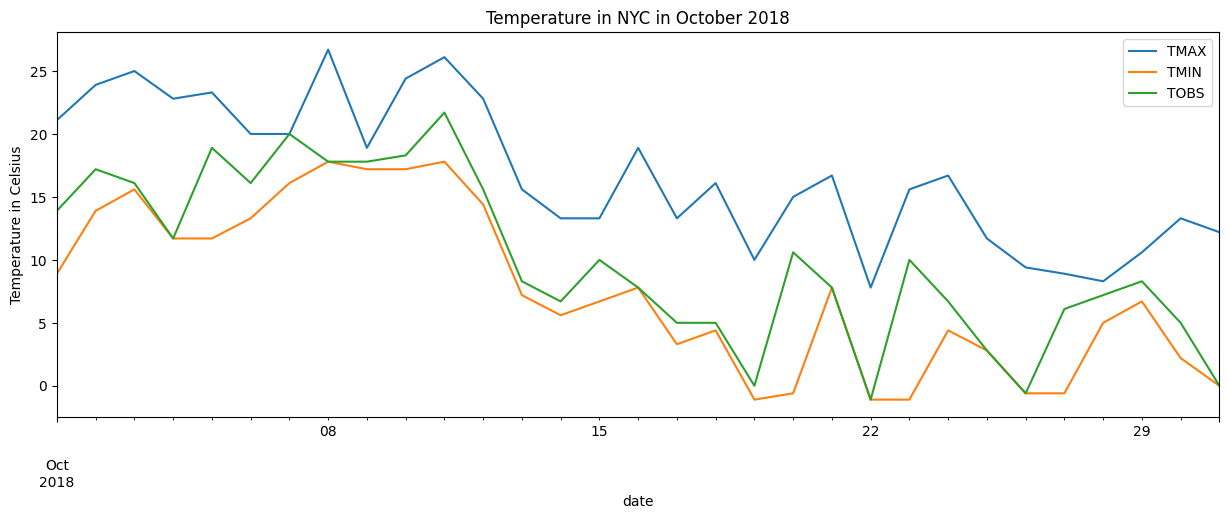

In [6]:
wide_df.plot(
    x='date', y=['TMAX', 'TMIN', 'TOBS'], figsize=(15, 5),
    title='Temperature in NYC in October 2018'
).set_ylabel('Temperature in Celsius')
plt.show()

## Long format
Our variable names are now in the `datatype` column and their values are in the `value` column. We now have 3 rows for each date, since we have 3 different `datatypes`:

In [7]:
long_df.head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


Since we have many rows for the same date, using `describe()` is not that helpful:

In [8]:
long_df.describe(include='all')

,date,datatype,value
count,93,93,93.000000
unique,NaN,3,NaN
top,NaN,TMAX,NaN
freq,NaN,31,NaN
mean,2018-10-16 00:00:00,NaN,11.470968
min,2018-10-01 00:00:00,NaN,-1.100000
25%,2018-10-08 00:00:00,NaN,6.700000
50%,2018-10-16 00:00:00,NaN,11.700000
75%,2018-10-24 00:00:00,NaN,17.200000
max,2018-10-31 00:00:00,NaN,26.700000


Plotting long format data in `pandas` can be rather tricky. Instead we use `seaborn` (covered in [`ch_06/1-introduction_to_seaborn.ipynb`](../ch_06/1-introduction_to_seaborn.ipynb)):

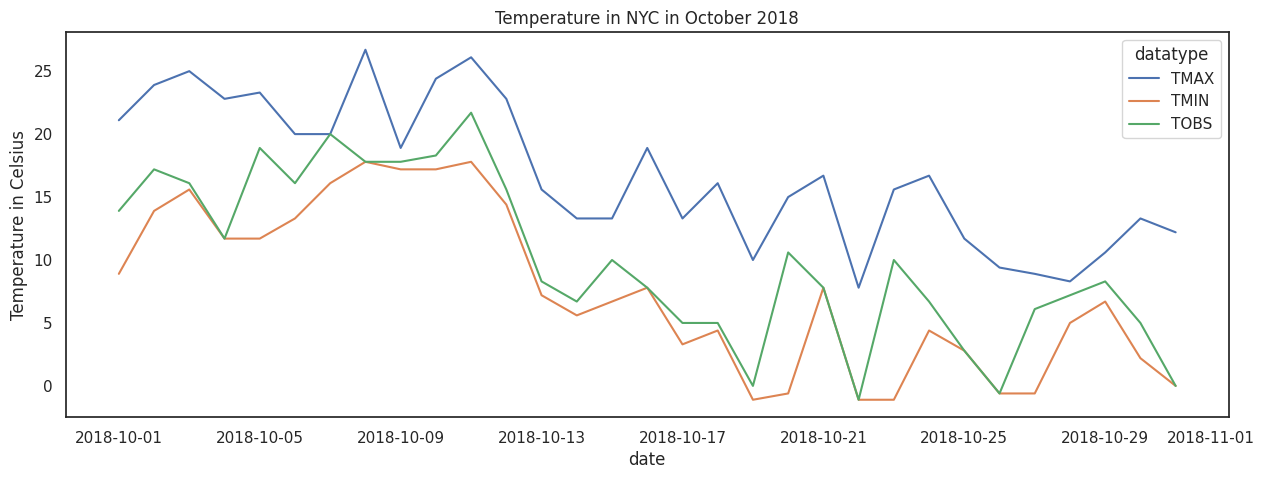

In [9]:
import seaborn as sns

sns.set(rc={'figure.figsize': (15, 5)}, style='white')

ax = sns.lineplot(
    data=long_df, x='date', y='value', hue='datatype'
)
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')
plt.show()

With long data and `seaborn`, we can easily facet our plots:

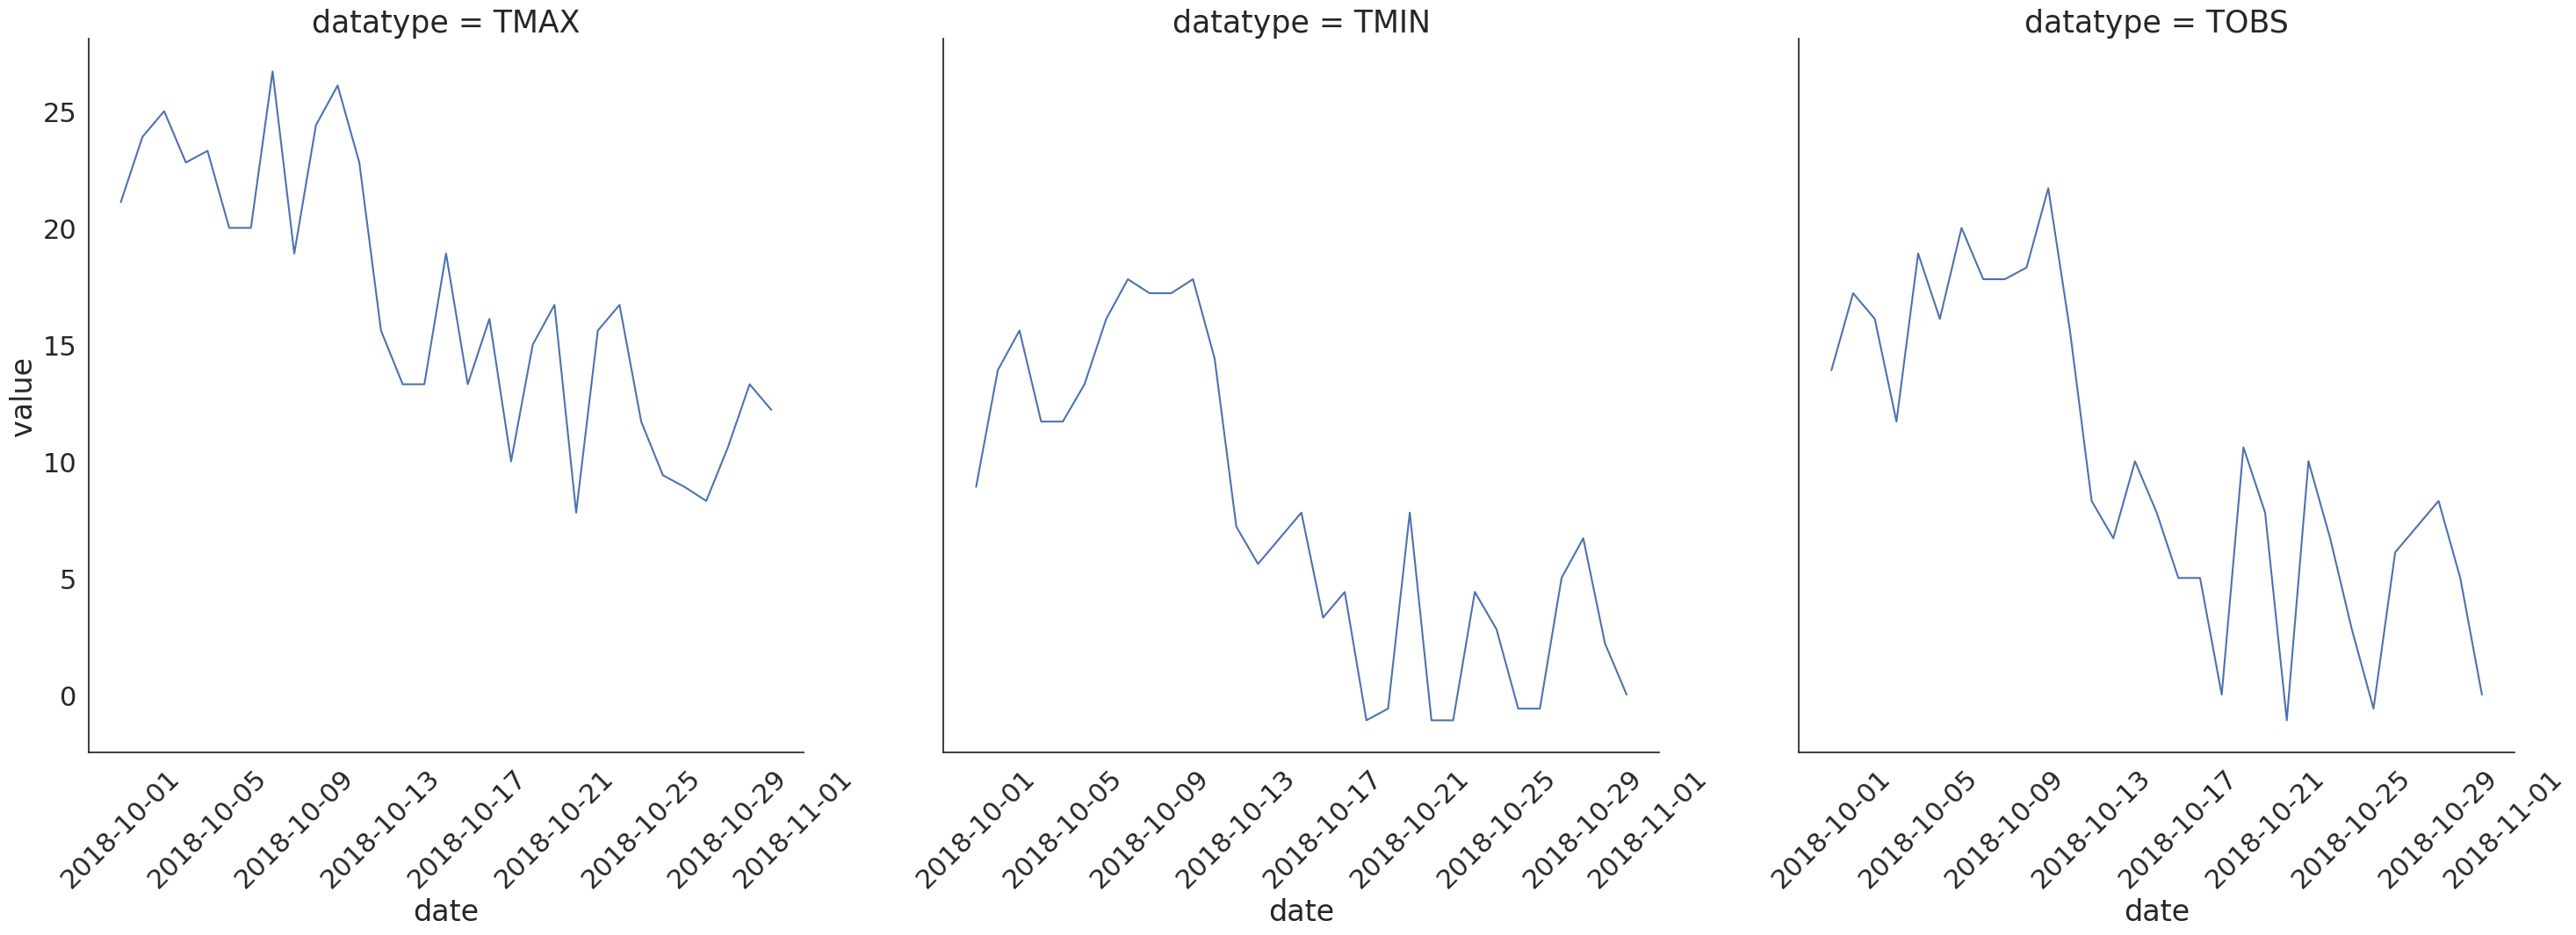

In [10]:
sns.set(
    rc={'figure.figsize': (20, 10)}, style='white', font_scale=2
)
# 한 번에 DataType(TMAX,TMIN,TOBS) 나오게 하기
g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

<hr>
<div>
    <a href="../ch_02/6-adding_and_removing_data.ipynb">
        <button style="float: left;">&#8592; Chapter 2</button>
    </a>
    <a href="./2-using_the_weather_api.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>

# Python(Cleaning Data)

## Cleaning Data

## About the data
In this notebook, we will using daily temperature data from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). We will use the Global Historical Climatology Network - Daily (GHCND) dataset; see the documentation [here](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf).

This data was collected from the LaGuardia Airport station in New York City for October 2018. It contains:
- the daily minimum temperature (`TMIN`)
- the daily maximum temperature (`TMAX`)
- the daily average temperature (`TAVG`)

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.*

In addition, we will be using S&P 500 stock market data (obtained using the [`stock_analysis`](https://github.com/stefmolin/stock-analysis) package we will build in chapter 7) and data for bitcoin for 2017 through 2018. For the first edition, the bitcoin data was collected from CoinMarketCap using the `stock_analysis` package; however, changes in the website led to the necessity of changing the data source to Yahoo! Finance. The bitcoin data that was collected before the CoinMarketCap website change should be equivalent to the historical data that can be viewed on [this](https://coinmarketcap.com/currencies/bitcoin/historical-data/) page.

## Setup
We need to import `pandas` and read in the temperature data to get started:

In [11]:
import pandas as pd

df = pd.read_csv('data/nyc_temperatures.csv')
df.head()

,date,datatype,station,attributes,value
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


## Renaming Columns
We start out with the following columns:

In [12]:
df.columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

We want to rename the `value` column to indicate it contains the temperature in Celsius and the `attributes` column to say `flags` since each value in the comma-delimited string is a different flag about the data collection. For this task, we use the `rename()` method and pass in a dictionary mapping the column names to their new names. We pass `inplace=True` to change our original dataframe instead of getting a new one back:

In [13]:
# Value는 Temp_C로 Attributes는 Flags로 변경
df.rename(
    columns={
        'value': 'temp_C',
        'attributes': 'flags'
    }, inplace=True
)

Those columns have been successfully renamed:

In [14]:
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

We can also perform string operations on the column names with `rename()`:

In [15]:
df.rename(str.upper, axis='columns').columns

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

## Type Conversion
The `date` column is not currently being stored as a `datetime`:

In [16]:
df.dtypes

,0
date,object
datatype,object
station,object
flags,object
temp_C,float64


Let's perform the conversion with `pd.to_datetime()`:

In [18]:
df = df.assign(date = pd.to_datetime(df.date))

In [19]:
df.dtypes

,0
date,datetime64[ns]
datatype,object
station,object
flags,object
temp_C,float64


Now we get useful information when we use `describe()` on this column:

In [21]:
df.date.describe()

,date
count,93
mean,2018-10-16 00:00:00
min,2018-10-01 00:00:00
25%,2018-10-08 00:00:00
50%,2018-10-16 00:00:00
75%,2018-10-24 00:00:00
max,2018-10-31 00:00:00


We can use `tz_localize()` on a `DatetimeIndex` object to convert to a desired timezone:

In [ ]:
pd.date_range(start='2018-10-25', periods=2, freq='D').tz_localize('EST')

DatetimeIndex(['2018-10-25 00:00:00-05:00', '2018-10-26 00:00:00-05:00'], dtype='datetime64[ns, EST]', freq=None)

This also works with `Series`/`DataFrame` objects that have an index of type `DatetimeIndex`. Let's read in the CSV again for this example and set the `date` column to be the index and stored as a datetime:

In [ ]:
eastern = pd.read_csv(
    'data/nyc_temperatures.csv', index_col='date', parse_dates=True
).tz_localize('EST')
eastern.head()

,datatype,station,attributes,value
date,,,,
2018-10-01 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 00:00:00-05:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


We can use `tz_convert()` to convert to another timezone from there. If we convert the Eastern datetimes to UTC, they will now be at 5 AM, since `pandas` will use the offsets to convert:

In [ ]:
# 시간 변경
eastern.tz_convert('UTC').head()

,datatype,station,attributes,value
date,,,,
2018-10-01 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 05:00:00+00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


We can change the period of the index as well. We could change the period to be monthly to make it easier to aggregate later. (Aggregation will be discussed in chapter 4.)

In [ ]:
eastern.tz_localize(None).to_period('M').index

PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

We now get a `PeriodIndex` object, which we can change back into a `DatetimeIndex` object with `to_timestamp()`:

In [ ]:
eastern.tz_localize(None).to_period('M').to_timestamp().index

DatetimeIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
      

We can use the `assign()` method for working with multiple columns at once (or creating new ones). Since our `date` column has already been converted, we need to read in the data again:

In [ ]:
df = pd.read_csv('data/nyc_temperatures.csv').rename(
    columns={
        'value': 'temp_C',
        'attributes': 'flags'
    }
)

new_df = df.assign(
    date=pd.to_datetime(df.date),
    temp_F=(df.temp_C * 9/5) + 32
)
new_df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object

The `date` column now has datetimes and the `temp_F` column was added:

In [ ]:
new_df.head()

,date,datatype,station,flags,temp_C,temp_F
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,70.16
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,78.08
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,64.94
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,72.86
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,78.98


We can also use `astype()` to perform conversions. Let's create columns of the integer portion of the temperatures in Celsius and Fahrenheit. We will use **lambda functions** (first introduced in *Chapter 2, Working with Pandas DataFrames*), so that we can use the values being created in the `temp_F` column to calculate the `temp_F_whole` column. It is very common (and useful) to use lambda functions with `assign()`:

In [23]:
df = df.assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_C_whole=lambda x: x.temp_C.astype('int'),
    temp_F=lambda x: (x.temp_C * 9/5) + 32,
    temp_F_whole=lambda x: x.temp_F.astype('int')
)

df.head()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


Creating categories:

In [24]:
df_with_categories = df.assign(
    station=df.station.astype('category'),
    datatype=df.datatype.astype('category')
)
df_with_categories.dtypes

,0
date,datetime64[ns]
datatype,category
station,category
flags,object
temp_C,float64
temp_C_whole,int64
temp_F,float64
temp_F_whole,int64


In [25]:
df_with_categories.describe(include='category')

,datatype,station
count,93,93
unique,3,1
top,TAVG,GHCND:USW00014732
freq,31,93


Our categories have no order, but this is something that `pandas` supports:

In [26]:
pd.Categorical(
    ['med', 'med', 'low', 'high'],
    categories=['low', 'med', 'high'],
    ordered=True
)

['med', 'med', 'low', 'high']
Categories (3, object): ['low' < 'med' < 'high']

## Reordering, reindexing, and sorting
Say we want to find the days that reached the hottest temperatures in the weather data; we can sort our values by the `temp_C` column with the largest on top to find this:

In [27]:
df[df.datatype == 'TMAX'].sort_values(by='temp_C', ascending=False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


However, this isn't perfect because we have some ties, and they aren't sorted consistently. In the first tie between the 7th and the 10th, the earlier date comes first, but the opposite is true with the tie between the 4th and the 2nd. We can use other columns to break ties and specify how to sort each with `ascending`. Let's break ties with the date column and show earlier dates before later ones:

In [28]:
df[df.datatype == 'TMAX'].sort_values(by=['temp_C', 'date'], ascending=[False, True]).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


Notice that the index was jumbled in the past 2 results. Here, our index only stores the row number in the original data, but we may not need to keep track of that information. In this case, we can pass in `ignore_index=True` to get a new index after sorting:

In [29]:
df[df.datatype == 'TMAX'].sort_values(by=['temp_C', 'date'], ascending=[False, True], ignore_index=True).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
1,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
2,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
3,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
5,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
6,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
8,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
9,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


When just looking for the n-largest values, rather than wanting to sort all the data, we can use `nlargest()`:

In [30]:
# temp_C 기준으로 가장 큰 값부터 정렬
df[df.datatype == 'TAVG'].nlargest(n=10, columns='temp_C')

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
27,2018-10-10,TAVG,GHCND:USW00014732,"H,,S,",23.8,23,74.84,74
30,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
18,2018-10-07,TAVG,GHCND:USW00014732,"H,,S,",22.8,22,73.04,73
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
6,2018-10-03,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
24,2018-10-09,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
9,2018-10-04,TAVG,GHCND:USW00014732,"H,,S,",21.3,21,70.34,70
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
21,2018-10-08,TAVG,GHCND:USW00014732,"H,,S,",20.9,20,69.62,69
12,2018-10-05,TAVG,GHCND:USW00014732,"H,,S,",20.3,20,68.54,68


We use `nsmallest()` for the n-smallest values.

In [31]:
# temp_C,date 기준으로 가장 작은 값부터 정렬
df.nsmallest(n=5, columns=['temp_C', 'date'])

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
65,2018-10-22,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
77,2018-10-26,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
62,2018-10-21,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
74,2018-10-25,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
53,2018-10-18,TMIN,GHCND:USW00014732,",,W,2400",6.7,6,44.06,44


The `sample()` method will give us rows (or columns with `axis=1`) at random. We can provide a seed (`random_state`) to make this reproducible. The index after we do this is jumbled:

In [32]:
df.sample(5, random_state=0).index

Index([2, 30, 55, 16, 13], dtype='int64')

We can use `sort_index()` to order it again:

In [33]:
df.sample(5, random_state=0).sort_index().index

Index([2, 13, 16, 30, 55], dtype='int64')

The `sort_index()` method can also sort columns alphabetically:

In [34]:
df.sort_index(axis=1).head()

,datatype,date,flags,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,TAVG,2018-10-01,"H,,S,",GHCND:USW00014732,21.2,21,70.16,70
1,TMAX,2018-10-01,",,W,2400",GHCND:USW00014732,25.6,25,78.08,78
2,TMIN,2018-10-01,",,W,2400",GHCND:USW00014732,18.3,18,64.94,64
3,TAVG,2018-10-02,"H,,S,",GHCND:USW00014732,22.7,22,72.86,72
4,TMAX,2018-10-02,",,W,2400",GHCND:USW00014732,26.1,26,78.98,78


This can make selection with `loc` easier for many columns:

In [35]:
df.sort_index(axis=1).head().loc[:,'temp_C':'temp_F_whole']

,temp_C,temp_C_whole,temp_F,temp_F_whole
0,21.2,21,70.16,70
1,25.6,25,78.08,78
2,18.3,18,64.94,64
3,22.7,22,72.86,72
4,26.1,26,78.98,78


We must sort the index to compare two dataframes. If the index is different, but the data is the same, they will be marked not-equal:

In [36]:
df.equals(df.sort_values(by='temp_C'))

False

Sorting the index solves this issue:

In [37]:
df.equals(df.sort_values(by='temp_C').sort_index())

True

Let's set the `date` column as our index:

In [38]:
df.set_index('date', inplace=True)
df.head()

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


Now that we have an index of type `DatetimeIndex`, we can do datetime slicing and indexing. As long as we provide a date format that pandas understands, we can grab the data. To select all of 2018, we simply use `df.loc['2018']`, for the fourth quarter of 2018 we can use `df.loc['2018-Q4']`, grabbing October is as simple as using `df.loc['2018-10']`; these can also be combined to build ranges. Let's grab October 11, 2018 through October 12, 2018 (inclusive of both endpoints)&mdash;note that using `loc[]` is optional for ranges:

In [39]:
df['2018-10-11':'2018-10-12']

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


We can also use `reset_index()` to get a fresh index and move our current index into a column for safe keeping. This is especially useful if we had data, such as the date, in the index that we don't want to lose:

In [ ]:
df['2018-10-11':'2018-10-12'].reset_index()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
1,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2,2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
3,2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
4,2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
5,2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


Reindexing allows us to conform our axis to contain a given set of labels. Let's turn to the S&P 500 stock data in the `sp500.csv` file to see an example of this. Notice we only have data for trading days (weekdays, excluding holidays):

In [40]:
sp = pd.read_csv(
    'data/sp500.csv', index_col='date', parse_dates=True
).drop(columns=['adj_close'])

sp.head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


If we want to look at the value of a portfolio (group of assets) that trade on different days, we need to handle the mismatch in the index. Bitcoin, for example, trades daily. If we sum up all the data we have for each day (aggregations will be covered in chapter 4, so don't fixate on this part), we get the following:

In [41]:
bitcoin = pd.read_csv(
    'data/bitcoin.csv', index_col='date', parse_dates=True
).drop(columns=['market_cap'])

# every day's closing price = S&P 500 close + Bitcoin close (same for other metrics)
portfolio = pd.concat([sp, bitcoin], sort=False).groupby(level='date').sum()

portfolio.head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


It may not be immediately obvious what is wrong with the previous data, but with a visualization we can easily see the cyclical pattern of drops on the days the stock market is closed. (Don't worry about the plotting code too much, we will cover it in depth in chapters 5 and 6).

We will need to import `matplotlib` now:

In [ ]:
import matplotlib.pyplot as plt # we use this module for plotting
from matplotlib.ticker import StrMethodFormatter # for formatting the axis

Now we can see why we need to reindex:

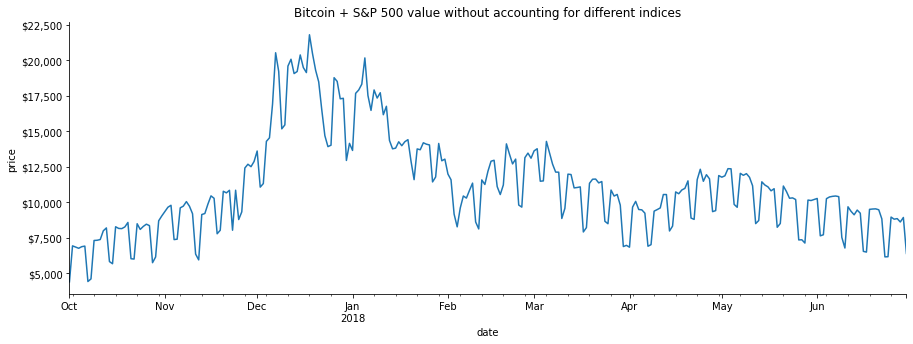

In [ ]:
# plot the closing price from Q4 2017 through Q2 2018
ax = portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', figsize=(15, 5), legend=False,
    title='Bitcoin + S&P 500 value without accounting for different indices'
)

# formatting
ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# show the plot
plt.show()

We need to align the index of the S&P 500 to match bitcoin in order to fix this. We will use the `reindex()` method, but by default we get `NaN` for the values that we don't have data for:

In [42]:
sp.reindex(bitcoin.index).head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,NaN,NaN,NaN,NaN,NaN,Saturday
2017-01-08,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


So now we have rows for every day of the year, but all the weekends and holidays have `NaN` values. To address this, we can specify how to handle missing values with the `method` argument. In this case, we want to forward-fill, which will put the weekend and holiday values as the value they had for the Friday (or end of trading week) before:

In [43]:
sp.reindex(bitcoin.index, method='ffill').head(10)\
    .assign(day_of_week=lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


To isolate the changes happening with the forward-filling, we can use the `compare()` method. It shows us the values that differ across identically-labeled dataframes (same names and same columns). Here, we can see that only weekends and holidays (Monday, January 16, 2017 was MLK day) have values forward-filled. Notice that consecutive days have the same values.

In [44]:
sp.reindex(bitcoin.index)\
    .compare(sp.reindex(bitcoin.index, method='ffill'))\
    .head(10).assign(day_of_week=lambda x: x.index.day_name())

high               low              open              close  \
           self        other self        other self        other  self   
date                                                                     
2017-01-07  NaN  2282.100098  NaN  2264.060059  NaN  2271.139893   NaN   
2017-01-08  NaN  2282.100098  NaN  2264.060059  NaN  2271.139893   NaN   
2017-01-14  NaN  2278.679932  NaN  2271.510010  NaN  2272.739990   NaN   
2017-01-15  NaN  2278.679932  NaN  2271.510010  NaN  2272.739990   NaN   
2017-01-16  NaN  2278.679932  NaN  2271.510010  NaN  2272.739990   NaN   
2017-01-21  NaN  2276.959961  NaN  2265.010010  NaN  2269.959961   NaN   
2017-01-22  NaN  2276.959961  NaN  2265.010010  NaN  2269.959961   NaN   
2017-01-28  NaN  2299.020020  NaN  2291.620117  NaN  2299.020020   NaN   
2017-01-29  NaN  2299.020020  NaN  2291.620117  NaN  2299.020020   NaN   
2017-02-04  NaN  2298.310059  NaN  2287.879883  NaN  2288.540039   NaN   

                        volume               day_of_week  
                  other   self         other              
date                                                      
2017-01-07  2276.979980    NaN  3.339890e+09    Saturday  
2017-01-08  2276.979980    NaN  3.339890e+09      Sunday  
2017-01-14  2274.639893    NaN  3.081270e+09    Saturday  
2017-01-15  2274.639893    NaN  3.081270e+09      Sunday  
2017-01-16  2274.639893    NaN  3.081270e+09      Monday  
2017-01-21  2271.310059    NaN  3.524970e+09    Saturday  
2017-01-22  2271.310059    NaN  3.524970e+09      Sunday  
2017-01-28  2294.689941    NaN  3.135890e+09    Saturday  
2017-01-29  2294.689941    NaN  3.135890e+09      Sunday  
2017-02-04  2297.419922    NaN  3.597970e+09    Saturday

This isn't perfect though. We probably want 0 for the volume traded and to put the closing price for the open, high, low, and close on the days the market is closed:

In [45]:
import numpy as np

sp_reindexed = sp.reindex(bitcoin.index).assign(
    volume=lambda x: x.volume.fillna(0), # put 0 when market is closed
    close=lambda x: x.close.fillna(method='ffill'), # carry this forward
    # take the closing price if these aren't available
    open=lambda x: np.where(x.open.isnull(), x.close, x.open),
    high=lambda x: np.where(x.high.isnull(), x.close, x.high),
    low=lambda x: np.where(x.low.isnull(), x.close, x.low)
)
sp_reindexed.head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

<ipython-input-45-91cb9d41c05e>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close=lambda x: x.close.fillna(method='ffill'), # carry this forward


,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


If we create a visualization comparing the reindexed data to the first attempt, we see how reindexing helped maintain the asset value when the market was closed:

In [47]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

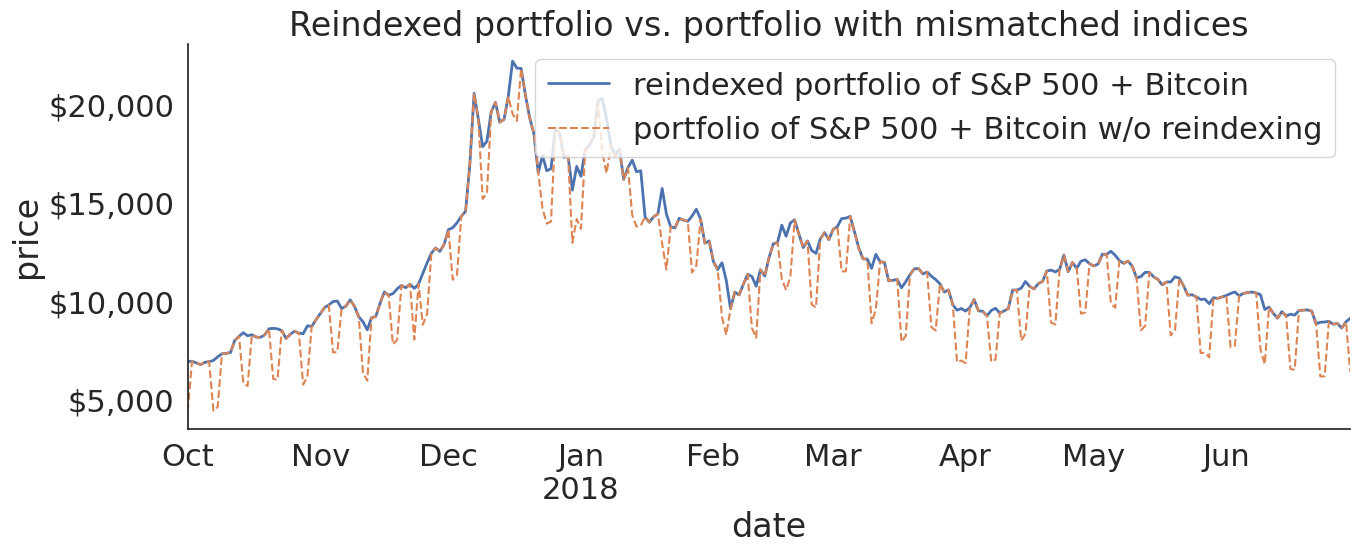

In [48]:
# every day's closing price = S&P 500 close adjusted for market closure + Bitcoin close (same for other metrics)
fixed_portfolio = sp_reindexed + bitcoin

# plot the reindexed portfolio's closing price from Q4 2017 through Q2 2018
ax = fixed_portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', label='reindexed portfolio of S&P 500 + Bitcoin', figsize=(15, 5), linewidth=2,
    title='Reindexed portfolio vs. portfolio with mismatched indices'
)

# add line for original portfolio for comparison
portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', ax=ax, linestyle='--', label='portfolio of S&P 500 + Bitcoin w/o reindexing'
)

# formatting
ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# show the plot
plt.show()

<hr>
<div>
    <a href="./2-using_the_weather_api.ipynb">
        <button>&#8592; Previous Notebook</button>
    </a>
    <a href="./4-reshaping_data.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>

# Python(Reshaping Data)

## Reshaping Data

## About the data
In this notebook, we will using daily temperature data from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). We will use the Global Historical Climatology Network - Daily (GHCND) dataset; see the documentation [here](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf).

This data was collected for New York City for October 2018, using the Boonton 1 station (GHCND:USC00280907). It contains:
- the daily minimum temperature (`TMIN`)
- the daily maximum temperature (`TMAX`)
- the daily temperature at time of observation (`TOBS`)

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.*

## Setup
We need to import `pandas` and read in the long format data to get started:

In [92]:
import pandas as pd

long_df = pd.read_csv(
    'data/long_data.csv', usecols=['date', 'datatype', 'value']
).rename(
    columns={'value': 'temp_C'}
).assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_F=lambda x: (x.temp_C * 9/5) + 32
)
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


## Transposing
Transposing swaps the rows and the columns. We use the `T` attribute to do so:

In [93]:
long_df.set_index('date').head(6).T

date,2018-10-01,2018-10-01,2018-10-01,2018-10-02,2018-10-02,2018-10-02
datatype,TMAX,TMIN,TOBS,TMAX,TMIN,TOBS
temp_C,21.1,8.9,13.9,23.9,13.9,17.2
temp_F,69.98,48.02,57.02,75.02,57.02,62.96


## Pivoting
Going from long to wide format.

### `pivot()`
We can restructure our data by picking a column to go in the index (`index`), a column whose unique values will become column names (`columns`), and the values to place in those columns (`values`). The `pivot()` method can be used when we don't need to perform any aggregation in addition to our restructuring (when our index is unique); if this is not the case, we need the `pivot_table()` method which we will cover in chapter 4.

In [95]:
pivoted_df = long_df.pivot(
    index='date', columns='datatype', values='temp_C'
)
pivoted_df.head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


Now that the data is pivoted, we have wide format data that we can grab summary statistics with:

In [96]:
pivoted_df.describe()

datatype,TMAX,TMIN,TOBS
count,31.000000,31.000000,31.000000
mean,16.829032,7.561290,10.022581
std,5.714962,6.513252,6.596550
min,7.800000,-1.100000,-1.100000
25%,12.750000,2.500000,5.550000
50%,16.100000,6.700000,8.300000
75%,21.950000,13.600000,16.100000
max,26.700000,17.800000,21.700000


We can also provide multiple values to pivot on, which will result in a hierarchical index:

In [97]:
pivoted_df = long_df.pivot(
    index='date', columns='datatype', values=['temp_C', 'temp_F']
)
pivoted_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

With the hierarchical index, if we want to select `TMIN` in Fahrenheit, we will first need to select `temp_F` and then `TMIN`:

In [98]:
pivoted_df['temp_F']['TMIN'].head()

,TMIN
date,
2018-10-01,48.02
2018-10-02,57.02
2018-10-03,60.08
2018-10-04,53.06
2018-10-05,53.06


### `unstack()`

We have been working with a single index throughout this chapter; however, we can create an index from any number of columns with `set_index()`. This gives us an index of type `MultiIndex`, where the outermost level corresponds to the first element in the list provided to `set_index()`:

In [99]:
multi_index_df = long_df.set_index(['date', 'datatype'])
multi_index_df.head().index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN')],
           names=['date', 'datatype'])

Notice there are now 2 index sections of the dataframe:

In [100]:
multi_index_df.head()

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02

With an index of type `MultiIndex`, we can no longer use `pivot()`. We must now use `unstack()`, which by default moves the innermost index onto the columns:

In [101]:
unstacked_df = multi_index_df.unstack()
unstacked_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

The `unstack()` method also provides the `fill_value` parameter, which let's us fill-in any `NaN` values that might arise from this restructuring of the data. Consider the case that we have data for the average temperature on October 1, 2018, but no other date:

In [87]:
extra_data

temp_C  temp_F
date                datatype                
2018-10-01          TAVG        10.0   50.00
2018-10-01 00:00:00 TMAX        21.1   69.98
                    TMIN         8.9   48.02
                    TOBS        13.9   57.02
2018-10-02 00:00:00 TMAX        23.9   75.02
...                              ...     ...
2018-10-30 00:00:00 TOBS         5.0   41.00
2018-10-31 00:00:00 TMAX        12.2   53.96
                    TMIN         0.0   32.00
                    TOBS         0.0   32.00
2018-10-01          TAVG        10.0   50.00

[95 rows x 2 columns]

In [89]:
extra_data

temp_C  temp_F
date                datatype                
2018-10-01          TAVG        10.0   50.00
                    TAVG        10.0   50.00
2018-10-01 00:00:00 TMAX        21.1   69.98
                    TMIN         8.9   48.02
                    TOBS        13.9   57.02
...                              ...     ...
2018-10-30 00:00:00 TOBS         5.0   41.00
2018-10-31 00:00:00 TMAX        12.2   53.96
                    TMIN         0.0   32.00
                    TOBS         0.0   32.00
2018-10-01          TAVG        10.0   50.00

[96 rows x 2 columns]

If we use `unstack()` in this case, we will have `NaN` for the `TAVG` columns every day but October 1, 2018:

To address this, we can pass in an appropriate `fill_value`. However, we are restricted to passing in a value for this, not a strategy (like we saw with `fillna()`), so while `-40` is definitely not be the best value, we can use it to illustrate how this works, since this is the temperature at which Fahrenheit and Celsius are equal:

In [ ]:
extra_data.unstack(fill_value=-40).head()

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01   10.0  21.1   8.9  13.9   50.0  69.98  48.02  57.02
2018-10-02  -40.0  23.9  13.9  17.2  -40.0  75.02  57.02  62.96
2018-10-03  -40.0  25.0  15.6  16.1  -40.0  77.00  60.08  60.98
2018-10-04  -40.0  22.8  11.7  11.7  -40.0  73.04  53.06  53.06
2018-10-05  -40.0  23.3  11.7  18.9  -40.0  73.94  53.06  66.02

## Melting
Going from wide to long format.

### Setup

In [102]:
wide_df = pd.read_csv('data/wide_data.csv')
wide_df.head()

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


### `melt()`
In order to go from wide format to long format, we use the `melt()` method. We have to specify:
- `id_vars`: which column(s) uniquely identify a row in the wide format (`date`, here)
- `value_vars`: the column(s) that contain(s) the values (`TMAX`, `TMIN`, and `TOBS`, here)

Optionally, we can also provide:
- `value_name`: what to call the column that will contain all the values once melted
- `var_name`: what to call the column that will contain the names of the variables being measured

In [74]:
melted_df = wide_df.melt(
    id_vars='date',
    value_vars=['TMAX', 'TMIN', 'TOBS'],
    value_name='temp_C',
    var_name='measurement'
)
melted_df.head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3


### `stack()`
Another option is `stack()`, which will pivot the columns of the dataframe into the innermost level of the index (resulting in an index of type `MultiIndex`). To illustrate this, let's set our index to be the `date` column:

In [ ]:
wide_df.set_index('date', inplace=True)
wide_df.head()

,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


By running `stack()` now, we will create a second level in our index which will contain the column names of our dataframe (`TMAX`, `TMIN`, `TOBS`). This will leave us with a `Series` object containing the values:

In [ ]:
stacked_series = wide_df.stack()
stacked_series.head()

date            
2018-10-01  TMAX    21.1
            TMIN     8.9
            TOBS    13.9
2018-10-02  TMAX    23.9
            TMIN    13.9
dtype: float64

We can use the `to_frame()` method on our `Series` object to turn it into a `DataFrame` object. Since the series doesn't have a name at the moment, we will pass in the name as an argument:

In [ ]:
stacked_df = stacked_series.to_frame('values')
stacked_df.head()

values
date                   
2018-10-01 TMAX    21.1
           TMIN     8.9
           TOBS    13.9
2018-10-02 TMAX    23.9
           TMIN    13.9

Once again, we have an index of type `MultiIndex`:

In [ ]:
stacked_df.head().index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN')],
           names=['date', None])

Unfortunately, we don't have a name for the `datatype` level:

In [ ]:
stacked_df.index.names

FrozenList(['date', None])

We can use `set_names()` to address this though:

In [ ]:
stacked_df.index.set_names(['date', 'datatype'], inplace=True)
stacked_df.index.names

FrozenList(['date', 'datatype'])

<hr>
<div>
    <a href="./3-cleaning_data.ipynb">
        <button>&#8592; Previous Notebook</button>
    </a>
    <a href="./5-handling_data_issues.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>

# Python(Handling Data)

## Handling duplicate, missing, or invalid data

## About the data
In this notebook, we will using daily weather data that was taken from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2) and altered to introduce many common problems faced when working with data.

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.*

## Background on the data

Data meanings:
- `PRCP`: precipitation in millimeters
- `SNOW`: snowfall in millimeters
- `SNWD`: snow depth in millimeters
- `TMAX`: maximum daily temperature in Celsius
- `TMIN`: minimum daily temperature in Celsius
- `TOBS`: temperature at time of observation in Celsius
- `WESF`: water equivalent of snow in millimeters

Some important facts to get our bearings:
- According to the National Weather Service, the coldest temperature ever recorded in Central Park was -15°F (-26.1°C) on February 9, 1934: [source](https://www.weather.gov/media/okx/Climate/CentralPark/extremes.pdf)
- The temperature of the Sun's photosphere is approximately 5,505°C: [source](https://en.wikipedia.org/wiki/Sun)

## Setup
We need to import `pandas` and read in the dirty data to get started:

In [103]:
import pandas as pd

df = pd.read_csv('data/dirty_data.csv')

## Finding problematic data
A good first step is to look at some rows:

In [104]:
df.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


Looking at summary statistics can reveal strange or missing values:

In [105]:
df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF
count,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000
mean,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909
std,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832
min,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000
25%,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000
50%,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000
75%,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000
max,61.700000,229.000000,inf,5505.000000,23.900000,26.100000,28.700000


The `info()` method can pinpoint missing values and wrong data types:

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


We can use the `isna()`/`isnull()` method of the series to find nulls:

In [107]:
contain_nulls = df[
    df.SNOW.isna() | df.SNWD.isna() | df.TOBS.isna()
    | df.WESF.isna() | df.inclement_weather.isna()
]
contain_nulls.shape[0]

765

In [108]:
contain_nulls.head(10)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
7,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
9,2018-01-05T00:00:00,?,0.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN


Note that we can't check if we have `NaN` like this:

In [109]:
df[df.inclement_weather == 'NaN'].shape[0]

0

This is because it is actually `np.nan`. However, notice this also doesn't work:

In [110]:
import numpy as np
df[df.inclement_weather == np.nan].shape[0]

0

We have to use one of the methods discussed earlier for this to work:

In [111]:
df[df.inclement_weather.isna()].shape[0]

357

We can find `-inf`/`inf` by comparing to `-np.inf`/`np.inf`:

In [112]:
df[df.SNWD.isin([-np.inf, np.inf])].shape[0]

577

Rather than do this for each column, we can write a function that will use a [dictionary comprehension](https://www.python.org/dev/peps/pep-0274/) to check all the columns for us:

In [113]:
def get_inf_count(df):
    """Find the number of inf/-inf values per column in the dataframe"""
    return {
        col: df[df[col].isin([np.inf, -np.inf])].shape[0] for col in df.columns
    }

get_inf_count(df)

{'date': 0,
 'station': 0,
 'PRCP': 0,
 'SNOW': 0,
 'SNWD': 577,
 'TMAX': 0,
 'TMIN': 0,
 'TOBS': 0,
 'WESF': 0,
 'inclement_weather': 0}

Before we can decide how to handle the infinite values of snow depth, we should look at the summary statistics for snowfall, which forms a big part in determining the snow depth:

In [114]:
pd.DataFrame({
    'np.inf Snow Depth': df[df.SNWD == np.inf].SNOW.describe(),
    '-np.inf Snow Depth': df[df.SNWD == -np.inf].SNOW.describe()
}).T

,count,mean,std,min,25%,50%,75%,max
np.inf Snow Depth,24.0,101.041667,74.498018,13.0,25.0,120.5,152.0,229.0
-np.inf Snow Depth,553.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Let's now look into the `date` and `station` columns. We saw the `?` for station earlier, so we know that was the other unique value. However, we see that some dates are present 8 times in the data and we only have 324 days meaning we are also missing days:

In [115]:
df.describe(include='object')

,date,station,inclement_weather
count,765,765,408
unique,324,2,2
top,2018-07-05T00:00:00,GHCND:USC00280907,False
freq,8,398,384


We can use the `duplicated()` method to find duplicate rows:

In [116]:
df[df.duplicated()].shape[0]

284

The default for `keep` is `'first'` meaning it won't show the first row that the duplicated data was seen in; we can pass in `False` to see it though:

In [117]:
df[df.duplicated(keep=False)].shape[0]

482

We can also specify the columns to use:

In [118]:
df[df.duplicated(['date', 'station'])].shape[0]

284

Let's look at a few duplicates. Just in the few values we see here, we know that the top 4 are actually in the data 6 times because by default we aren't seeing their first occurrence:

In [119]:
df[df.duplicated()].head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True


## Mitigating Issues

### Handling duplicated data
Since we know we have NY weather data and noticed we only had two entries for `station`, we may decide to drop the `station` column because we are only interested in the weather data. However, when dealing with duplicate data, we need to think of the ramifications of removing it. Notice we only have data for the `WESF` column when the station is `?`:

In [120]:
df[df.WESF.notna()].station.unique()

array(['?'], dtype=object)

If we determine it won't impact our analysis, we can use `drop_duplicates()` to remove them:

In [121]:
# 1. make the date a datetime
df.date = pd.to_datetime(df.date)

# 2. save this information for later
station_qm_wesf = df[df.station == '?'].drop_duplicates('date').set_index('date').WESF

# 3. sort ? to the bottom
df.sort_values('station', ascending=False, inplace=True)

# 4. drop duplicates based on the date column keeping the first occurrence
# which will be the valid station if it has data
df_deduped = df.drop_duplicates('date')

# 5. remove the station column because we are done with it
df_deduped = df_deduped.drop(columns='station').set_index('date').sort_index()

# 6. take valid station's WESF and fall back on station ? if it is null
df_deduped = df_deduped.assign(
    WESF=lambda x: x.WESF.combine_first(station_qm_wesf)
)

df_deduped.shape

(324, 8)

Here we used the `combine_first()` method to coalesce the values to the first non-null entry; this means that if we had data from both stations, we would first take the value provided by the named station and if (and only if) that station was null would we take the value from the station named `?`. The following table contains some examples of how this would play out:

| station GHCND:USC00280907 | station ? | result of `combine_first()` |
| :---: | :---: | :---: |
| 1 | 17 | 1 |
| 1 | `NaN` | 1 |
| `NaN` | 17 | 17 |
| `NaN` | `NaN` | `NaN` |

Check out the 4th row&mdash;we have `WESF` in the correct spot thanks to the index:

In [122]:
df_deduped.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
2018-01-04,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
2018-01-05,14.2,127.0,inf,-4.4,-13.9,-13.9,NaN,True


### Dealing with nulls
We could drop nulls, replace them with some arbitrary value, or impute them using the surrounding data. Each of these options may have ramifications, so we must choose wisely.

We can use `dropna()` to drop rows where any column has a null value. The default options leave us hardly any data:

In [123]:
df_deduped.dropna().shape

(4, 8)

If we pass `how='all'`, we can choose to only drop rows where everything is null, but this removes nothing:

In [124]:
df_deduped.dropna(how='all').shape

(324, 8)

We can use just a subset of columns to determine what to drop with the `subset` argument:

In [125]:
df_deduped.dropna(
    how='all', subset=['inclement_weather', 'SNOW', 'SNWD']
).shape

(293, 8)

This can also be performed along columns, and we can also require a certain number of null values before we drop the data:

In [126]:
df_deduped.dropna(axis='columns', thresh=df_deduped.shape[0] * .75).columns

Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS', 'inclement_weather'], dtype='object')

We can choose to fill in the null values instead with `fillna()`:

In [127]:
df_deduped.loc[:,'WESF'].fillna(0, inplace=True)
df_deduped.head()

<ipython-input-127-d64e5c761ef7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_deduped.loc[:,'WESF'].fillna(0, inplace=True)


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,-inf,5505.0,-40.0,NaN,0.0,NaN
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False
2018-01-04,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
2018-01-05,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True


At this point we have done everything we can without distorting the data. We know that we are missing dates, but if we reindex, we don't know how to fill in the `NaN` data. With the weather data, we can't assume because it snowed one day that it will snow the next or that the temperature will be the same. For this reason, note that the next few examples are just for illustrative purposes only—just because we can do something doesn't mean we should.

That being said, let's try to address some of remaining issues with the temperature data. We know that when `TMAX` is the temperature of the Sun, it must be because there was no measured value, so let's replace it with `NaN`. We will also do so for `TMIN` which currently uses -40°C for its placeholder when we know that the coldest temperature ever recorded in NYC was -15°F (-26.1°C) on February 9, 1934:

In [128]:
df_deduped = df_deduped.assign(
    TMAX=lambda x: x.TMAX.replace(5505, np.nan),
    TMIN=lambda x: x.TMIN.replace(-40, np.nan),
)

We will also make an assumption that the temperature won't change drastically day-to-day. Note that this is actually a big assumption, but it will allow us to understand how `fillna()` works when we provide a strategy through the `method` parameter. The `fillna()` method gives us 2 options for the `method` parameter:
- `'ffill'` to forward-fill
- `'bfill'` to back-fill

*Note that `'nearest'` is missing because we are not reindexing.*

Here, we will use `'ffill'` to show how this works:

In [129]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(method='ffill'),
    TMIN=lambda x: x.TMIN.fillna(method='ffill')
).head()

<ipython-input-129-ff8cf51965ca>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  TMAX=lambda x: x.TMAX.fillna(method='ffill'),
<ipython-input-129-ff8cf51965ca>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  TMIN=lambda x: x.TMIN.fillna(method='ffill')


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False
2018-01-04,20.6,229.0,inf,-4.4,-13.9,NaN,19.3,True
2018-01-05,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True


We can use `np.nan_to_num()` to turn `np.nan` into 0 and `-np.inf`/`np.inf` into large negative or positive finite numbers:

In [130]:
df_deduped.assign(
    SNWD=lambda x: np.nan_to_num(x.SNWD)
).head()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,-1.797693e+308,NaN,NaN,NaN,0.0,NaN
2018-01-02,0.0,0.0,-1.797693e+308,-8.3,-16.1,-12.2,0.0,False
2018-01-03,0.0,0.0,-1.797693e+308,-4.4,-13.9,-13.3,0.0,False
2018-01-04,20.6,229.0,1.797693e+308,NaN,NaN,NaN,19.3,True
2018-01-05,14.2,127.0,1.797693e+308,-4.4,-13.9,-13.9,0.0,True


Depending on the data we are working with, we can use the `clip()` method as an alternative to `np.nan_to_num()`. The `clip()` method makes it possible to cap values at a specific minimum and/or maximum threshold. Since `SNWD` can't be negative, let's use `clip()` to enforce a lower bound of zero. To show how the upper bound works, let's use the value of `SNOW`:

In [131]:
df_deduped.assign(
    SNWD=lambda x: x.SNWD.clip(0, x.SNOW)
).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2018-01-02,0.0,0.0,0.0,-8.3,-16.1,-12.2,0.0,False
2018-01-03,0.0,0.0,0.0,-4.4,-13.9,-13.3,0.0,False
2018-01-04,20.6,229.0,229.0,NaN,NaN,NaN,19.3,True
2018-01-05,14.2,127.0,127.0,-4.4,-13.9,-13.9,0.0,True


We can couple `fillna()` with other types of calculations. Here we replace missing values of `TMAX` with the median of all `TMAX` values, `TMIN` with the median of all `TMIN` values, and `TOBS` to the average of the `TMAX` and `TMIN` values. Since we place `TOBS` last, we have access to the imputed values for `TMIN` and `TMAX` in the calculation:

In [132]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(x.TMAX.median()),
    TMIN=lambda x: x.TMIN.fillna(x.TMIN.median()),
    # average of TMAX and TMIN
    TOBS=lambda x: x.TOBS.fillna((x.TMAX + x.TMIN) / 2)
).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,-inf,14.4,5.6,10.0,0.0,NaN
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False
2018-01-04,20.6,229.0,inf,14.4,5.6,10.0,19.3,True
2018-01-05,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True


We can also use `apply()` for running the same calculation across columns. For example, let's fill all missing values with their rolling 7-day median of their values, setting the number of periods required for the calculation to 0 to ensure we don't introduce more extra `NaN` values. Rolling calculations will be covered in chapter 4, so this is a preview:

In [133]:
df_deduped.apply(
    # rolling calculations will be covered in chapter 4, this is a rolling 7-day median
    # we set min_periods (# of periods required for calculation) to 0 so we always get a result
    lambda x: x.fillna(x.rolling(7, min_periods=0).median())
).head(10)

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN
2018-01-02,0.0,0.0,-inf,-8.30,-16.1,-12.20,0.0,False
2018-01-03,0.0,0.0,-inf,-4.40,-13.9,-13.30,0.0,False
2018-01-04,20.6,229.0,inf,-6.35,-15.0,-12.75,19.3,True
2018-01-05,14.2,127.0,inf,-4.40,-13.9,-13.90,0.0,True
2018-01-06,0.0,0.0,-inf,-10.00,-15.6,-15.00,0.0,False
2018-01-07,0.0,0.0,-inf,-11.70,-17.2,-16.10,0.0,False
2018-01-08,0.0,0.0,-inf,-7.80,-16.7,-8.30,0.0,False
2018-01-10,0.0,0.0,-inf,5.00,-7.8,-7.80,0.0,False


The last strategy we could try is interpolation with the `interpolate()` method. We specify the `method` parameter with the interpolation strategy to use. There are many options, but we will stick with the default of `'linear'`, which will treat values as evenly spaced and place missing values in the middle of existing ones. We have some missing data, so we will reindex first. Look at January 9th, which we didn't have before—the values for `TMAX`, `TMIN`, and `TOBS` are the average of values the day prior (January 8th) and the day after (January 10th):

In [134]:
df_deduped\
    .reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D'))\
    .apply(lambda x: x.interpolate())\
    .head(10)

<ipython-input-134-d70a1674e6d3>:3: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .apply(lambda x: x.interpolate())\


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN
2018-01-02,0.0,0.0,-inf,-8.3,-16.10,-12.20,0.0,False
2018-01-03,0.0,0.0,-inf,-4.4,-13.90,-13.30,0.0,False
2018-01-04,20.6,229.0,inf,-4.4,-13.90,-13.60,19.3,True
2018-01-05,14.2,127.0,inf,-4.4,-13.90,-13.90,0.0,True
2018-01-06,0.0,0.0,-inf,-10.0,-15.60,-15.00,0.0,False
2018-01-07,0.0,0.0,-inf,-11.7,-17.20,-16.10,0.0,False
2018-01-08,0.0,0.0,-inf,-7.8,-16.70,-8.30,0.0,False
2018-01-09,0.0,0.0,-inf,-1.4,-12.25,-8.05,0.0,NaN
2018-01-10,0.0,0.0,-inf,5.0,-7.80,-7.80,0.0,False


<hr>

<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
         <a href="./4-reshaping_data.ipynb">
            <button>&#8592; Previous Notebook</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="../../solutions/ch_03/solutions.ipynb">
            <button>Solutions</button>
        </a>
        <a href="../ch_04/1-querying_and_merging.ipynb">
            <button>Chapter 4 &#8594;</button>
        </a>
    </div>
</div>
<hr>

# Python(querying and merging)

## Performing Database-style Operations on Dataframes

## About the data
In this notebook, we will using daily weather data that was taken from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). The [`0-weather_data_collection.ipynb`](./0-weather_data_collection.ipynb) notebook contains the process that was followed to collect the data. Consult the dataset's [documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) for information on the fields.

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.*


## Setup

In [135]:
import pandas as pd

weather = pd.read_csv('data/nyc_weather_2018.csv')
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0017,",,N,",0.0


## Querying DataFrames
The `query()` method is an easier way of filtering based on some criteria. For example, we can use it to find all entries where snow was recorded from a station with `US1NY` in its station ID:

In [136]:
snow_data = weather.query('datatype == "SNOW" and value > 0 and station.str.contains("US1NY")')
snow_data.head()

,date,datatype,station,attributes,value
114,2018-01-01T00:00:00,SNOW,GHCND:US1NYWC0019,",,N,",25.0
789,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0007,",,N,",41.0
794,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0018,",,N,",10.0
798,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0024,",,N,",89.0
800,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0030,",,N,",102.0


This is equivalent to querying the `weather.db` SQLite database for

```sql
SELECT *
FROM weather
WHERE datatype == "SNOW" AND value > 0 AND station LIKE "%US1NY%"
```

In [137]:
import sqlite3

with sqlite3.connect('data/weather.db') as connection:
    snow_data_from_db = pd.read_sql(
        'SELECT * FROM weather WHERE datatype == "SNOW" AND value > 0 and station LIKE "%US1NY%"',
        connection
    )

snow_data.reset_index().drop(columns='index').equals(snow_data_from_db)

True

Note this is also equivalent to creating Boolean masks:

In [138]:
weather[
    (weather.datatype == 'SNOW')
    & (weather.value > 0)
    & weather.station.str.contains('US1NY')
].equals(snow_data)

True

## Merging DataFrames
We have data for many different stations each day; however, we don't know what the stations are&mdash;just their IDs. We can join the data in the `weather_stations.csv` file which contains information from the `stations` endpoint of the NCEI API. Consult the [`0-weather_data_collection.ipynb`](./0-weather_data_collection.ipynb) notebook to see how this was collected. It looks like this:

In [139]:
station_info = pd.read_csv('data/weather_stations.csv')
station_info.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6


As a reminder, the weather data looks like this:

In [140]:
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0017,",,N,",0.0


We can join our data by matching up the `station_info.id` column with the `weather.station` column. Before doing that though, let's see how many unique values we have:

In [141]:
station_info.id.describe()

,id
count,279
unique,279
top,GHCND:US1CTFR0022
freq,1


While `station_info` has one row per station, the `weather` dataframe has many entries per station. Notice it also has fewer uniques:

In [142]:
weather.station.describe()

,station
count,78780
unique,110
top,GHCND:USW00094789
freq,4270


When working with joins, it is important to keep an eye on the row count. Some join types will lead to data loss. Remember that we can get this with `shape`:

In [143]:
station_info.shape[0], weather.shape[0]

(279, 78780)

Since we will be doing this often, it makes more sense to write a function:

In [144]:
def get_row_count(*dfs):
    return [df.shape[0] for df in dfs]
get_row_count(station_info, weather)

[279, 78780]

By default, `merge()` performs an inner join. We simply specify the columns to use for the join. The left dataframe is the one we call `merge()` on, and the right one is passed in as an argument:

In [145]:
inner_join = weather.merge(station_info, left_on='station', right_on='id')
inner_join.sample(5, random_state=0)

,date,datatype,station,attributes,value,id,name,latitude,longitude,elevation
10739,2018-02-17T00:00:00,PRCP,GHCND:USC00066655,",,7,0700",4.1,GHCND:USC00066655,"PUTNAM LAKE, CT US",41.082500,-73.638600,91.4
45188,2018-07-27T00:00:00,SNOW,GHCND:US1NJES0019,",,N,",0.0,GHCND:US1NJES0019,"WEST CALDWELL TWP 1.3 NE, NJ US",40.861500,-74.277500,81.4
59823,2018-10-05T00:00:00,PRCP,GHCND:US1NJES0024,",,N,",0.0,GHCND:US1NJES0024,"CEDAR GROVE TWP 0.4 W, NJ US",40.855695,-74.235564,108.5
10852,2018-02-17T00:00:00,TMIN,GHCND:USW00094789,",,W,2400",-2.1,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.764010,3.4
46755,2018-08-03T00:00:00,AWND,GHCND:USW00094745,",,W,",1.8,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",41.062360,-73.704630,111.9


We can remove the duplication of information in the `station` and `id` columns by renaming one of them before the merge and then simply using `on`:

In [146]:
weather.merge(station_info.rename(dict(id='station'), axis=1), on='station').sample(5, random_state=0)

,date,datatype,station,attributes,value,name,latitude,longitude,elevation
10739,2018-02-17T00:00:00,PRCP,GHCND:USC00066655,",,7,0700",4.1,"PUTNAM LAKE, CT US",41.082500,-73.638600,91.4
45188,2018-07-27T00:00:00,SNOW,GHCND:US1NJES0019,",,N,",0.0,"WEST CALDWELL TWP 1.3 NE, NJ US",40.861500,-74.277500,81.4
59823,2018-10-05T00:00:00,PRCP,GHCND:US1NJES0024,",,N,",0.0,"CEDAR GROVE TWP 0.4 W, NJ US",40.855695,-74.235564,108.5
10852,2018-02-17T00:00:00,TMIN,GHCND:USW00094789,",,W,2400",-2.1,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.764010,3.4
46755,2018-08-03T00:00:00,AWND,GHCND:USW00094745,",,W,",1.8,"WESTCHESTER CO AIRPORT, NY US",41.062360,-73.704630,111.9


We are losing stations that don't have weather observations associated with them, if we don't want to lose these rows, we perform a right or left join instead of the inner join:

In [147]:
left_join = station_info.merge(weather, left_on='id', right_on='station', how='left')
right_join = weather.merge(station_info, left_on='station', right_on='id', how='right')

right_join[right_join.datatype.isna()].head()

,date,datatype,station,attributes,value,id,name,latitude,longitude,elevation
0,NaN,NaN,NaN,NaN,NaN,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
344,NaN,NaN,NaN,NaN,NaN,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
345,NaN,NaN,NaN,NaN,NaN,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
718,NaN,NaN,NaN,NaN,NaN,GHCND:US1NJBG0005,"WESTWOOD 0.8 ESE, NJ US",40.983041,-74.015858,15.8
719,NaN,NaN,NaN,NaN,NaN,GHCND:US1NJBG0006,"RAMSEY 0.6 E, NJ US",41.058611,-74.134068,112.2


The left and right join as we performed above are equivalent because the side for which we kept the rows without matches was the same in both cases:

In [148]:
left_join.sort_index(axis=1).sort_values(['date', 'station'], ignore_index=True).equals(
    right_join.sort_index(axis=1).sort_values(['date', 'station'], ignore_index=True)
)

True

Note we have additional rows in the left and right joins because we kept all the stations that didn't have weather observations:

In [149]:
get_row_count(inner_join, left_join, right_join)

[78780, 78949, 78949]

If we query the station information for stations that have `US1NY` in their ID and perform an outer join, we can see where the mismatches occur:

In [150]:
outer_join = weather.merge(
    station_info[station_info.id.str.contains('US1NY')],
    left_on='station', right_on='id', how='outer', indicator=True
)

pd.concat([
    outer_join.query(f'_merge == "{kind}"').sample(2, random_state=0)
    for kind in outer_join._merge.unique()
]).sort_index()

,date,datatype,station,attributes,value,id,name,latitude,longitude,elevation,_merge
28719,2018-03-05T00:00:00,PRCP,GHCND:US1NYNS0037,",,N,",0.3,GHCND:US1NYNS0037,"WANTAGH 1.1 NNE, NY US",40.683311,-73.503837,10.4,both
30828,2018-12-19T00:00:00,PRCP,GHCND:US1NYNS0046,",,N,",0.0,GHCND:US1NYNS0046,"MASSAPEQUA PARK 1.2 N, NY US",40.698077,-73.449893,10.7,both
32004,NaN,NaN,NaN,NaN,NaN,GHCND:US1NYQN0033,"HOWARD BEACH 0.4 NNW, NY US",40.662099,-73.841345,2.1,right_only
34194,NaN,NaN,NaN,NaN,NaN,GHCND:US1NYWC0009,"NEW ROCHELLE 1.3 S, NY US",40.904000,-73.777000,21.9,right_only
62899,2018-07-21T00:00:00,TMAX,GHCND:USW00054787,",,W,",24.4,NaN,NaN,NaN,NaN,NaN,left_only
73018,2018-07-19T00:00:00,TMAX,GHCND:USW00094745,",,W,2400",27.2,NaN,NaN,NaN,NaN,NaN,left_only


In [151]:
weather

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0017,",,N,",0.0
...,...,...,...,...,...
78775,2018-12-31T00:00:00,WDF5,GHCND:USW00094789,",,W,",130.0
78776,2018-12-31T00:00:00,WSF2,GHCND:USW00094789,",,W,",9.8
78777,2018-12-31T00:00:00,WSF5,GHCND:USW00094789,",,W,",12.5
78778,2018-12-31T00:00:00,WT01,GHCND:USW00094789,",,W,",1.0


In [153]:
station_info

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6
...,...,...,...,...,...
274,GHCND:USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734170,-73.416940,24.7
275,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7
276,GHCND:USW00094741,"TETERBORO AIRPORT, NJ US",40.850000,-74.061390,2.7
277,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",41.062360,-73.704630,111.9


These joins are equivalent to their SQL counterparts. Below is the inner join. Note that to use `equals()` you will have to do some manipulation of the dataframes to line them up:

In [154]:
import sqlite3

with sqlite3.connect('data/weather.db') as connection:
    inner_join_from_db = pd.read_sql(
        'SELECT * FROM weather JOIN stations ON weather.station == stations.id',
        connection
    )

inner_join_from_db.shape == inner_join.shape

True

Revisiting the dirty data from chapter 3's [`5-handling_data_issues.ipynb`](../ch_03/5-handling_data_issues.ipynb) notebook.

Data meanings:
- `PRCP`: precipitation in millimeters
- `SNOW`: snowfall in millimeters
- `SNWD`: snow depth in millimeters
- `TMAX`: maximum daily temperature in Celsius
- `TMIN`: minimum daily temperature in Celsius
- `TOBS`: temperature at time of observation in Celsius
- `WESF`: water equivalent of snow in millimeters


Read in the data, dropping duplicates and the uninformative `SNWD` column:

In [155]:
dirty_data = pd.read_csv(
    'data/dirty_data.csv', index_col='date'
).drop_duplicates().drop(columns='SNWD')
dirty_data.head()

,station,PRCP,SNOW,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01T00:00:00,?,0.0,0.0,5505.0,-40.0,NaN,NaN,NaN
2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-8.3,-16.1,-12.2,NaN,False
2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-4.4,-13.9,-13.3,NaN,False
2018-01-04T00:00:00,?,20.6,229.0,5505.0,-40.0,NaN,19.3,True
2018-01-05T00:00:00,?,0.3,NaN,5505.0,-40.0,NaN,NaN,NaN


We need to create two dataframes for the join. We will drop some unecessary columns as well for easier viewing:

In [156]:
valid_station = dirty_data.query('station != "?"').drop(columns=['WESF', 'station'])
station_with_wesf = dirty_data.query('station == "?"').drop(columns=['station', 'TOBS', 'TMIN', 'TMAX'])

Our column for the join is the index in both dataframes, so we must specify `left_index` and `right_index`:

In [157]:
valid_station.merge(
    station_with_wesf, how='left', left_index=True, right_index=True
).query('WESF > 0').head()

,PRCP_x,SNOW_x,TMAX,TMIN,TOBS,inclement_weather_x,PRCP_y,SNOW_y,WESF,inclement_weather_y
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


The columns that existed in both dataframes, but didn't form part of the join got suffixes added to their names: `_x` for columns from the left dataframe and `_y` for columns from the right dataframe. We can customize this with the `suffixes` argument:

In [158]:
valid_station.merge(
    station_with_wesf, how='left', left_index=True, right_index=True, suffixes=('', '_?')
).query('WESF > 0').head()

,PRCP,SNOW,TMAX,TMIN,TOBS,inclement_weather,PRCP_?,SNOW_?,WESF,inclement_weather_?
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


Since we are joining on the index, an easier way is to use the `join()` method instead of `merge()`. Note that the suffix parameter is now `lsuffix` for the left dataframe's suffix and `rsuffix` for the right one's:

In [159]:
valid_station.join(station_with_wesf, how='left', rsuffix='_?').query('WESF > 0').head()

,PRCP,SNOW,TMAX,TMIN,TOBS,inclement_weather,PRCP_?,SNOW_?,WESF,inclement_weather_?
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


Joins can be very resource-intensive, so it's a good idea to figure out what type of join you need using set operations before trying the join itself. The `pandas` set operations are performed on the index, so whichever columns we will be joining on will need to be the index. Let's go back to the `weather` and `station_info` dataframes and set the station ID columns as the index:

In [160]:
weather.set_index('station', inplace=True)
station_info.set_index('id', inplace=True)

The intersection will tell us the stations that are present in both dataframes. The result will be the index when performing an inner join:

In [ ]:
weather.index.intersection(station_info.index)

Index(['GHCND:US1CTFR0039', 'GHCND:US1NJBG0015', 'GHCND:US1NJBG0017',
       'GHCND:US1NJBG0018', 'GHCND:US1NJBG0023', 'GHCND:US1NJBG0030',
       'GHCND:US1NJBG0039', 'GHCND:US1NJBG0044', 'GHCND:US1NJES0018',
       'GHCND:US1NJES0024',
       ...
       'GHCND:US1NJBG0037', 'GHCND:USC00284987', 'GHCND:US1NJES0031',
       'GHCND:US1NJES0029', 'GHCND:US1NJMD0086', 'GHCND:US1NJMS0097',
       'GHCND:US1NJMN0081', 'GHCND:US1NJMD0088', 'GHCND:US1NJES0040',
       'GHCND:US1NYQN0029'],
      dtype='object', length=110)

The set difference will tell us what we lose from each side. When performing an inner join, we lose nothing from the `weather` dataframe:

In [ ]:
weather.index.difference(station_info.index)

Index([], dtype='object')

We lose 169 stations from the `station_info` dataframe, however:

In [ ]:
station_info.index.difference(weather.index)

Index(['GHCND:US1CTFR0022', 'GHCND:US1NJBG0001', 'GHCND:US1NJBG0002',
       'GHCND:US1NJBG0005', 'GHCND:US1NJBG0006', 'GHCND:US1NJBG0008',
       'GHCND:US1NJBG0011', 'GHCND:US1NJBG0012', 'GHCND:US1NJBG0013',
       'GHCND:US1NJBG0020',
       ...
       'GHCND:USC00308322', 'GHCND:USC00308749', 'GHCND:USC00308946',
       'GHCND:USC00309117', 'GHCND:USC00309270', 'GHCND:USC00309400',
       'GHCND:USC00309466', 'GHCND:USC00309576', 'GHCND:USW00014708',
       'GHCND:USW00014786'],
      dtype='object', length=169)

The symmetric difference tells us what we lose from both sides. It is the combination of the set differences in each direction:

In [ ]:
ny_in_name = station_info[station_info.index.str.contains('US1NY')]

ny_in_name.index.difference(weather.index).shape[0]\
+ weather.index.difference(ny_in_name.index).shape[0]\
== weather.index.symmetric_difference(ny_in_name.index).shape[0]

True

The union will show us everything that will be present after a full outer join. Note that we pass in the unique values of the index to make sure we can see the number of stations we will be left with:

In [ ]:
weather.index.unique().union(station_info.index)

Index(['GHCND:US1CTFR0022', 'GHCND:US1CTFR0039', 'GHCND:US1NJBG0001',
       'GHCND:US1NJBG0002', 'GHCND:US1NJBG0003', 'GHCND:US1NJBG0005',
       'GHCND:US1NJBG0006', 'GHCND:US1NJBG0008', 'GHCND:US1NJBG0010',
       'GHCND:US1NJBG0011',
       ...
       'GHCND:USW00014708', 'GHCND:USW00014732', 'GHCND:USW00014734',
       'GHCND:USW00014786', 'GHCND:USW00054743', 'GHCND:USW00054787',
       'GHCND:USW00094728', 'GHCND:USW00094741', 'GHCND:USW00094745',
       'GHCND:USW00094789'],
      dtype='object', length=279)

Note that the symmetric difference is actually the union of the set differences:

In [ ]:
ny_in_name = station_info[station_info.index.str.contains('US1NY')]

ny_in_name.index.difference(weather.index).union(weather.index.difference(ny_in_name.index)).equals(
    weather.index.symmetric_difference(ny_in_name.index)
)

True

<hr>
<div>
    <a href="../ch_03/5-handling_data_issues.ipynb">
        <button>&#8592; Chapter 3</button>
    </a>
    <a href="./0-weather_data_collection.ipynb">
        <button>Weather Data Collection</button>
    </a>
    <a href="./2-dataframe_operations.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>

# Python(Dataframe operation)

## DataFrame Operations

## About the Data
In this notebook, we will be working with 2 datasets:
- Facebook's stock price throughout 2018 (obtained using the [`stock_analysis` package](https://github.com/stefmolin/stock-analysis)).
- Daily weather data for NYC from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2).

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.*

## Background on the weather data

Data meanings:
- `AWND`: average wind speed
- `PRCP`: precipitation in millimeters
- `SNOW`: snowfall in millimeters
- `SNWD`: snow depth in millimeters
- `TMAX`: maximum daily temperature in Celsius
- `TMIN`: minimum daily temperature in Celsius

## Setup

In [161]:
import numpy as np
import pandas as pd

weather = pd.read_csv('data/nyc_weather_2018.csv', parse_dates=['date'])
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01,SNOW,GHCND:US1NJBG0017,",,N,",0.0


In [162]:
fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


## Arithmetic and statistics
We already saw that we can use mathematical operators like `+` and `/` with dataframes directly. However, we can also use methods, which allow us to specify the axis to perform the calculation over. By default, this is per column. Let's find the Z-scores for the volume traded and look at the days where this was more than 3 standard deviations from the mean:

In [163]:
fb.assign(
    abs_z_score_volume=lambda x: \
        x.volume.sub(x.volume.mean()).div(x.volume.std()).abs()
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


We can use `rank()` and `pct_change()` to see which days had the largest change in volume traded from the day before:

In [164]:
fb.assign(
    volume_pct_change=fb.volume.pct_change(),
    pct_change_rank=lambda x: \
        x.volume_pct_change.abs().rank(ascending=False)
).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


January 12th was when the news that Facebook changed its news feed product to focus more on content from a users' friends over the brands they follow. Given that Facebook's advertising is a key component of its business ([nearly 89% in 2017](https://www.investopedia.com/ask/answers/120114/how-does-facebook-fb-make-money.asp)), many shares were sold and the price dropped in panic:

In [183]:
(fb['open']) > 175

,open
date,
2018-01-02,True
2018-01-03,True
2018-01-04,True
2018-01-05,True
2018-01-08,True
...,...
2018-12-24,False
2018-12-26,False
2018-12-27,False


In [165]:
fb['2018-01-11':'2018-01-12']

,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


Throughout 2018, Facebook's stock price never had a low above $215:

In [166]:
(fb > 215).any()

,0
open,True
high,True
low,False
close,True
volume,True


Facebook's OHLC (open, high, low, and close) prices all had at least one day they were at $215 or less:

In [167]:
(fb > 215).all()

,0
open,False
high,False
low,False
close,False
volume,True


## Binning
When working with volume traded, we may be interested in ranges of volume rather than the exact values. No two days have the same volume traded:

In [168]:
(fb.volume.value_counts() > 1).sum()

0

We can use `pd.cut()` to create 3 bins of even range in volume traded and name them. Then we can work with low, medium, and high volume traded categories:

In [169]:
volume_binned = pd.cut(fb.volume, bins=3, labels=['low', 'med', 'high'])
volume_binned.value_counts()

,count
volume,
low,240
med,8
high,3


Let's look at the days with high trading volume:

In [170]:
fb[volume_binned == 'high'].sort_values('volume', ascending=False)

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


July 25th Facebook announced disappointing user growth and the stock tanked in the after hours:

In [171]:
fb['2018-07-25':'2018-07-26']

,open,high,low,close,volume
date,,,,,
2018-07-25,215.715,218.62,214.27,217.50,64592585
2018-07-26,174.890,180.13,173.75,176.26,169803668


Cambridge Analytica scandal broke on Saturday, March 17th, so we look at the Monday after for the numbers:

In [172]:
fb['2018-03-16':'2018-03-20']

,open,high,low,close,volume
date,,,,,
2018-03-16,184.49,185.33,183.41,185.09,24403438
2018-03-19,177.01,177.17,170.06,172.56,88140060
2018-03-20,167.47,170.20,161.95,168.15,129851768


Since most days have similar volume, but a few are very large, we have very wide bins. Most of the data is in the low bin.

*Note: visualizations will be covered in chapters 5 and 6.*

In [174]:
!pip install visual-aids

ERROR: Could not find a version that satisfies the requirement visual-aids (from versions: none)
ERROR: No matching distribution found for visual-aids


In [175]:
from visual_aids.misc_viz import low_med_high_bins_viz

low_med_high_bins_viz(
    fb, 'volume', ylabel='volume traded',
    title='Daily Volume Traded of Facebook Stock in 2018 (with bins)'
)

ModuleNotFoundError: No module named 'visual_aids'

If we split using quantiles, the bins will have roughly the same number of observations. For this, we use `qcut()`. We will make 4 quartiles:

In [176]:
volume_qbinned = pd.qcut(fb.volume, q=4, labels=['q1', 'q2', 'q3', 'q4'])
volume_qbinned.value_counts()

,count
volume,
q1,63
q2,63
q4,63
q3,62


Notice the bins don't cover ranges of the same size anymore:

<AxesSubplot:title={'center':'Daily Volume Traded of Facebook Stock in 2018 (with quartile bins)'}, ylabel='volume traded'>

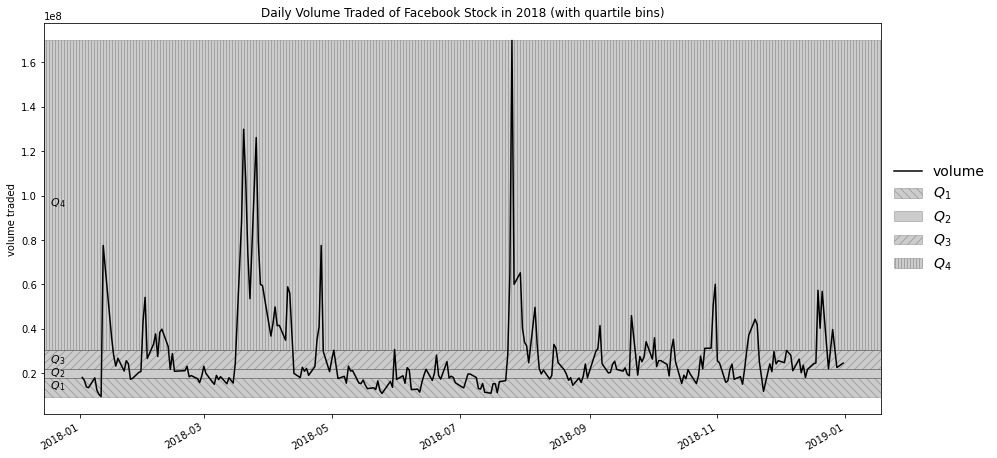

In [ ]:
from visual_aids.misc_viz import quartile_bins_viz

quartile_bins_viz(
    fb, 'volume', ylabel='volume traded',
    title='Daily Volume Traded of Facebook Stock in 2018 (with quartile bins)'
)

## Applying Functions
We can use the `apply()` method to run the same operation on all columns (or rows) of the dataframe. First, let's isolate the weather observations from the Central Park station and pivot the data:

In [177]:
central_park_weather = weather\
    .query('station == "GHCND:USW00094728"')\
    .pivot(index='date', columns='datatype', values='value')

Let's calculate the Z-scores of the TMIN, TMAX, and PRCP observations in Central Park in October 2018:

In [178]:
oct_weather_z_scores = central_park_weather\
    .loc['2018-10', ['TMIN', 'TMAX', 'PRCP']]\
    .apply(lambda x: x.sub(x.mean()).div(x.std()))
oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.0,-1.790682e-16,1.0,-1.339112,-0.751019,-0.474269,1.065152,1.843511
TMAX,31.0,1.951844e-16,1.0,-1.305582,-0.870013,-0.138258,1.011643,1.604016
PRCP,31.0,1.038596e-16,1.0,-0.394438,-0.394438,-0.394438,-0.240253,3.936167


October 27th rained much more than the rest of the days:

In [179]:
oct_weather_z_scores.query('PRCP > 3').PRCP

,PRCP
date,
2018-10-27,3.936167


Indeed, this day was much higher than the rest:

In [180]:
central_park_weather.loc['2018-10', 'PRCP'].describe()

,PRCP
count,31.000000
mean,2.941935
std,7.458542
min,0.000000
25%,0.000000
50%,0.000000
75%,1.150000
max,32.300000


When the function we want to apply isn't vectorized, we can:
- use `np.vectorize()` to vectorize it (similar to how `map()` works) and then use it with `apply()`
- use `applymap()` and pass it the non-vectorized function directly

Say we wanted to count the digits of the whole numbers for the Facebook data; `len()` is not vectorized, so we can use `np.vectorize()` or `applymap()`:

In [181]:
fb.apply(
    lambda x: np.vectorize(lambda y: len(str(np.ceil(y))))(x)
).astype('int64').equals(
    fb.applymap(lambda x: len(str(np.ceil(x))))
)

<ipython-input-181-07c6bad7dc11>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fb.applymap(lambda x: len(str(np.ceil(x))))


True

A simple operation of addition to each element in a series grows linearly in time complexity when using `iteritems()`, but stays near 0 when using vectorized operations. `iteritems()` and related methods should only be used if there is no vectorized solution:

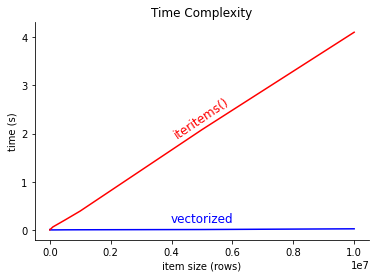

In [ ]:
import time

import numpy as np
import pandas as pd

np.random.seed(0)

vectorized_results = {}
iteritems_results = {}

for size in [10, 100, 1000, 10000, 100000, 500000, 1000000, 5000000, 10000000]:
    # set of numbers to use
    test = pd.Series(np.random.uniform(size=size))

    # time the vectorized operation
    start = time.time()
    x = test + 10
    end = time.time()
    vectorized_results[size] = end - start

    # time the operation with `iteritems()`
    start = time.time()
    x = []
    for i, v in test.iteritems():
        x.append(v + 10)
    x = pd.Series(x)
    end = time.time()
    iteritems_results[size] = end - start

results = pd.DataFrame(
    [pd.Series(vectorized_results, name='vectorized'), pd.Series(iteritems_results, name='iteritems')]
).T

# plotting
ax = results.plot(title='Time Complexity', color=['blue', 'red'], legend=False)

# formatting
ax.set(xlabel='item size (rows)', ylabel='time (s)')
ax.text(0.5e7, iteritems_results[0.5e7] * .9, 'iteritems()', rotation=34, color='red', fontsize=12, ha='center', va='bottom')
ax.text(0.5e7, vectorized_results[0.5e7], 'vectorized', color='blue', fontsize=12, ha='center', va='bottom')
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

## Window Calculations
*Consult the [`understanding_window_calculations.ipynb`](./understanding_window_calculations.ipynb) notebook for interactive visualizations using widgets to help understand window calculations.*

The `rolling()` method allows us to perform rolling window calculations. We simply specify the window size (3 days here) and follow it with a call to an aggregation function (sum here):

In [184]:
central_park_weather.loc['2018-10'].assign(
    rolling_PRCP=lambda x: x.PRCP.rolling('3D').sum()
)[['PRCP', 'rolling_PRCP']].head(7).T

date,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07
datatype,,,,,,,
PRCP,0.0,17.5,0.0,1.0,0.0,0.0,0.0
rolling_PRCP,0.0,17.5,17.5,18.5,1.0,1.0,0.0


We can also perform the rolling calculations on the entire dataframe at once. This will apply the same aggregation function to each column:

In [185]:
central_park_weather.loc['2018-10'].rolling('3D').mean().head(7).iloc[:,:6]

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
date,,,,,,
2018-10-01,0.900000,0.000000,0.0,0.0,24.400000,17.200000
2018-10-02,0.900000,8.750000,0.0,0.0,24.700000,17.750000
2018-10-03,0.966667,5.833333,0.0,0.0,24.233333,17.566667
2018-10-04,0.800000,6.166667,0.0,0.0,24.233333,17.200000
2018-10-05,1.033333,0.333333,0.0,0.0,23.133333,16.300000
2018-10-06,0.833333,0.333333,0.0,0.0,22.033333,16.300000
2018-10-07,1.066667,0.000000,0.0,0.0,22.600000,17.400000


We can use different aggregation functions per column if we use `agg()` instead. We pass in a dictionary mapping the column to the aggregation to perform on it. Here, we join the result to the original data to see what is happening:

In [186]:
central_park_weather['2018-10-01':'2018-10-07'].rolling('3D').agg(
    {'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'}
).join( # join with original data for comparison
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
    lsuffix='_rolling'
).sort_index(axis=1) # sort columns so rolling calcs are next to originals

datatype,AWND,AWND_rolling,PRCP,PRCP_rolling,TMAX,TMAX_rolling,TMIN,TMIN_rolling
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.800000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,1.033333,0.0,1.0,21.7,24.4,15.6,15.6
2018-10-06,0.5,0.833333,0.0,1.0,20.0,24.4,17.2,15.6
2018-10-07,1.1,1.066667,0.0,0.0,26.1,26.1,19.4,15.6


Suppose we reindexed the Facebook stock data as we did with the S&P 500 data in chapter 3. If we were to use rolling calculations on this data, we would be including the values when the market was closed:

In [ ]:
fb_reindexed = fb\
    .reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D'))\
    .assign(
        volume=lambda x: x.volume.fillna(0),
        close=lambda x: x.close.fillna(method='ffill'),
        open=lambda x: x.open.combine_first(x.close),
        high=lambda x: x.high.combine_first(x.close),
        low=lambda x: x.low.combine_first(x.close)
    )
fb_reindexed.assign(day=lambda x: x.index.day_name()).head(10)

,open,high,low,close,volume,day
2018-01-01,NaN,NaN,NaN,NaN,0.0,Monday
2018-01-02,177.68,181.58,177.5500,181.42,18151903.0,Tuesday
2018-01-03,181.88,184.78,181.3300,184.67,16886563.0,Wednesday
2018-01-04,184.90,186.21,184.0996,184.33,13880896.0,Thursday
2018-01-05,185.59,186.90,184.9300,186.85,13574535.0,Friday
2018-01-06,186.85,186.85,186.8500,186.85,0.0,Saturday
2018-01-07,186.85,186.85,186.8500,186.85,0.0,Sunday
2018-01-08,187.20,188.90,186.3300,188.28,17994726.0,Monday
2018-01-09,188.70,188.80,187.1000,187.87,12393057.0,Tuesday
2018-01-10,186.94,187.89,185.6300,187.84,10529894.0,Wednesday


As of version 1.0, `pandas` supports defining custom windows for rolling calculations, which makes it possible for us to perform rolling calculations on the days the market was open. One way is to make a new class that inherits from `BaseIndexer` and provide the logic for determining the window bounds in the `get_window_bounds()` method (more info [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#custom-window-rolling)). For our use case, we can use the `VariableOffsetWindowIndexer` class, which was introduced in version 1.1, to perform rolling calculations over non-fixed time offsets (like business days). Let's perform a three business day rolling calculation on the reindexed Facebook stock data and join it with the reindexed data for comparison:

In [ ]:
from pandas.api.indexers import VariableOffsetWindowIndexer

indexer = VariableOffsetWindowIndexer(
    index=fb_reindexed.index, offset=pd.offsets.BDay(3)
)
fb_reindexed.assign(window_start_day=0).rolling(indexer).agg({
    'window_start_day': lambda x: x.index.min().timestamp(),
    'open': 'mean', 'high': 'max', 'low': 'min',
    'close': 'mean', 'volume': 'sum'
}).join(
    fb_reindexed, lsuffix='_rolling'
).sort_index(axis=1).assign(
    day=lambda x: x.index.day_name(),
    window_start_day=lambda x: pd.to_datetime(x.window_start_day, unit='s')
).head(10)

,close,close_rolling,high,high_rolling,low,low_rolling,open,open_rolling,volume,volume_rolling,window_start_day,day
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2018-01-01,Monday
2018-01-02,181.42,181.420000,181.58,181.58,177.5500,177.5500,177.68,177.680000,18151903.0,18151903.0,2018-01-01,Tuesday
2018-01-03,184.67,183.045000,184.78,184.78,181.3300,177.5500,181.88,179.780000,16886563.0,35038466.0,2018-01-01,Wednesday
2018-01-04,184.33,183.473333,186.21,186.21,184.0996,177.5500,184.90,181.486667,13880896.0,48919362.0,2018-01-02,Thursday
2018-01-05,186.85,185.283333,186.90,186.90,184.9300,181.3300,185.59,184.123333,13574535.0,44341994.0,2018-01-03,Friday
2018-01-06,186.85,186.010000,186.85,186.90,186.8500,184.0996,186.85,185.780000,0.0,27455431.0,2018-01-04,Saturday
2018-01-07,186.85,186.220000,186.85,186.90,186.8500,184.0996,186.85,186.047500,0.0,27455431.0,2018-01-04,Sunday
2018-01-08,188.28,186.632000,188.90,188.90,186.3300,184.0996,187.20,186.278000,17994726.0,45450157.0,2018-01-04,Monday
2018-01-09,187.87,187.340000,188.80,188.90,187.1000,184.9300,188.70,187.038000,12393057.0,43962318.0,2018-01-05,Tuesday
2018-01-10,187.84,187.538000,187.89,188.90,185.6300,185.6300,186.94,187.308000,10529894.0,40917677.0,2018-01-06,Wednesday


Rolling calculations (`rolling()`) use a sliding window. Expanding calculations (`expanding()`), however, grow in size. These are equivalent to cumulative aggregations like `cumsum()`; however, we can specify the minimum number of periods required to start calculating (default is 1), and we aren't limited to predefined aggregations. Therefore, while there is no method for the cumulative mean, we can calculate it using `expanding()`. Let's calculate the month-to-date average precipiation:

In [187]:
central_park_weather.loc['2018-06'].assign(
    TOTAL_PRCP=lambda x: x.PRCP.cumsum(),
    AVG_PRCP=lambda x: x.PRCP.expanding().mean()
).head(10)[['PRCP', 'TOTAL_PRCP', 'AVG_PRCP']].T

date,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10
datatype,,,,,,,,,,
PRCP,6.9,2.00,6.4,4.10,0.00,0.000000,0.000000,0.000,0.000000,0.30
TOTAL_PRCP,6.9,8.90,15.3,19.40,19.40,19.400000,19.400000,19.400,19.400000,19.70
AVG_PRCP,6.9,4.45,5.1,4.85,3.88,3.233333,2.771429,2.425,2.155556,1.97


In [195]:
central_park_weather.PRCP.expanding().sum()

,PRCP
date,
2018-01-01,0.0
2018-01-02,0.0
2018-01-03,0.0
2018-01-04,19.3
2018-01-05,19.3
...,...
2018-12-27,1610.2
2018-12-28,1639.4
2018-12-29,1639.4


We can also use `agg()` to specify aggregations per column. Note that this works with NumPy functions as well. Here, we join the expanding calculations with the original results for comparison:

In [196]:
central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
    {'TMAX': "max", 'TMIN': "min", 'AWND': "mean", 'PRCP': "sum"}
).join(
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
    lsuffix='_expanding'
).sort_index(axis=1) # 컬럼 이름으로 sort

datatype,AWND,AWND_expanding,PRCP,PRCP_expanding,TMAX,TMAX_expanding,TMIN,TMIN_expanding
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.825000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,0.980000,0.0,18.5,21.7,25.0,15.6,15.6
2018-10-06,0.5,0.900000,0.0,18.5,20.0,25.0,17.2,15.6
2018-10-07,1.1,0.928571,0.0,18.5,26.1,26.1,19.4,15.6


Pandas provides the `ewm()` method for exponentially weighted moving calculations. As we saw in chapter 1, we can use the exponentially weighted moving average to smooth the data. Let's compare the rolling mean to the exponentially weighted moving average with the maximum daily temperature. Note that `span` here is the periods to use:

In [191]:
central_park_weather.assign(
    AVG=lambda x: x.TMAX.rolling('30D').mean(),
    EWMA=lambda x: x.TMAX.ewm(span=30).mean()
).loc['2018-09-29':'2018-10-08', ['TMAX', 'EWMA', 'AVG']].T

date,2018-09-29,2018-09-30,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07,2018-10-08
datatype,,,,,,,,,,
TMAX,22.200000,21.100000,24.400000,25.000000,23.300000,24.400000,21.700000,20.000000,26.100000,23.300000
EWMA,24.410887,24.197281,24.210360,24.261304,24.199285,24.212234,24.050154,23.788854,23.937960,23.896802
AVG,24.723333,24.573333,24.533333,24.460000,24.163333,23.866667,23.533333,23.070000,23.143333,23.196667


*Consult the [`understanding_window_calculations.ipynb`](./understanding_window_calculations.ipynb) notebook for interactive visualizations to help understand window calculations.*

## Pipes
Pipes are a way to streamline our `pandas` code and make it more readable and flexible. Using pipes, we can take a nested call like

```python
f(g(h(data), 20), x=True)
```

and turn it into something more readable:

```python
data.pipe(h)\
    .pipe(g, 20)\
    .pipe(f, x=True)\
```

We can use pipes to apply any function that accepts our data as the first argument and pass in any additional arguments. This makes it easy to chain steps together regardless of whether they are methods or functions:

We can pass any function that will accept the caller of `pipe()` as the first argument:

In [ ]:
def get_info(df):
    return '%d rows, %d columns and max closing Z-score was %d' % (*df.shape, df.close.max())

get_info(fb.loc['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()))\
    == fb.loc['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()).pipe(get_info)

True

For example, passing `pd.DataFrame.rolling` to `pipe()` is equivalent to calling `rolling()` directly on the dataframe, except we have more flexiblity to change this:

In [ ]:
fb.pipe(pd.DataFrame.rolling, '20D').mean().equals(fb.rolling('20D').mean())

True

The pipe takes the function passed in and calls it with the object that called `pipe()` as the first argument. Positional and keyword arguments are passed down:

In [ ]:
pd.DataFrame.rolling(fb, '20D').mean().equals(fb.rolling('20D').mean())

True

We can use a pipe to make a function that we can use for all of our window calculation needs:

In [ ]:
from window_calc import window_calc
window_calc??

Signature: window_calc(df, func, agg_dict, *args, **kwargs)
Source:   
def window_calc(df, func, agg_dict, *args, **kwargs):
    """
    Run a window calculation of your choice on a `DataFrame` object.
    
    Parameters:
        - df: The `DataFrame` object to run the calculation on.
        - func: The window calculation method that takes `df`
          as the first argument.
        - agg_dict: Information to pass to `agg()`, could be a 
          dictionary mapping the columns to the aggregation 
          function to use, a string name for the function, 
          or the function itself.
        - args: Positional arguments to pass to `func`.
        - kwargs: Keyword arguments to pass to `func`.
    
    Returns:
        A new `DataFrame` object.
    """
    return df.pipe(func, *args, **kwargs).agg(agg_dict)
File:      ~/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_04/window_calc.py
Type:      function


We can use the same interface to calculate various window calculations now. Let's find the expanding median for the Facebook data:

In [ ]:
window_calc(fb, pd.DataFrame.expanding, np.median).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.580,177.5500,181.420,18151903.0
2018-01-03,179.78,183.180,179.4400,183.045,17519233.0
2018-01-04,181.88,184.780,181.3300,184.330,16886563.0
2018-01-05,183.39,185.495,182.7148,184.500,15383729.5
2018-01-08,184.90,186.210,184.0996,184.670,16886563.0


Using the exponentially weighted moving average requires we pass in a keyword argument:

In [ ]:
window_calc(fb, pd.DataFrame.ewm, 'mean', span=3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.680000,181.580000,177.550000,181.420000,1.815190e+07
2018-01-03,180.480000,183.713333,180.070000,183.586667,1.730834e+07
2018-01-04,183.005714,185.140000,182.372629,184.011429,1.534980e+07
2018-01-05,184.384000,186.078667,183.736560,185.525333,1.440299e+07
2018-01-08,185.837419,187.534839,185.075110,186.947097,1.625679e+07


With rolling calculations, we can pass in a positional argument for the window size:

In [ ]:
window_calc(
    central_park_weather.loc['2018-10'],
    pd.DataFrame.rolling,
    {'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'},
    '3D'
).head()

,TMAX,TMIN,AWND,PRCP
date,,,,
2018-10-01,24.4,17.2,0.900000,0.0
2018-10-02,25.0,17.2,0.900000,17.5
2018-10-03,25.0,17.2,0.966667,17.5
2018-10-04,25.0,16.1,0.800000,18.5
2018-10-05,24.4,15.6,1.033333,1.0


<hr>
<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
         <a href="./1-querying_and_merging.ipynb">
            <button>&#8592; Previous Notebook</button>
        </a>
        <a href="./understanding_window_calculations.ipynb">
            <button>Understanding Window Calculations</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="./3-aggregations.ipynb">
            <button>Next Notebook &#8594;</button>
        </a>
    </div>
</div>
<hr>

# Python(Aggregation)

## Aggregating data with pandas and numpy

## About the Data
In this notebook, we will be working with 2 datasets:
- Facebook's stock price throughout 2018 (obtained using the [`stock_analysis` package](https://github.com/stefmolin/stock-analysis)).
- daily weather data for NYC from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2).

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.*

## Background on the weather data

Data meanings:
- `AWND`: average wind speed
- `PRCP`: precipitation in millimeters
- `SNOW`: snowfall in millimeters
- `SNWD`: snow depth in millimeters
- `TMAX`: maximum daily temperature in Celsius
- `TMIN`: minimum daily temperature in Celsius

## Setup

In [197]:
import numpy as np
import pandas as pd

fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


In [198]:
weather = pd.read_csv('data/weather_by_station.csv', index_col='date', parse_dates=True)
weather.head()

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.0,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"


Before we dive into any calculations, let's make sure `pandas` won't put things in scientific notation. We will modify how floats are formatted for displaying. The format we will apply is `.2f`, which will provide the float with 2 digits after the decimal point:

In [199]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Summarizing DataFrames
We learned about `agg()` in the [`2-dataframe_operations.ipynb`](./2-dataframe_operations.ipynb) notebook when we learned about window calculations; however, we can call this on the dataframe directly to aggregate its contents into a single series:

In [201]:
fb.agg({
    'open': "mean",
    'high': "max",
    'low': "min",
    'close': "mean",
    'volume': "sum"
})

,0
open,171.45
high,218.62
low,123.02
close,171.51
volume,6949682394.00


We can use this to find the total snowfall and precipitation recorded in Central Park in 2018:

In [204]:
weather.query('station == "GHCND:USW00094728"')\
    .pivot(columns='datatype', values='value')[['SNOW', 'PRCP']]\
    .agg('sum')

,0
datatype,
SNOW,1007.00
PRCP,1665.30


This is equivalent to passing `'sum'` to `agg()`:

In [ ]:
weather.query('station == "GHCND:USW00094728"')\
    .pivot(columns='datatype', values='value')[['SNOW', 'PRCP']]\
    .agg('sum')

datatype
SNOW   1007.00
PRCP   1665.30
dtype: float64

Note that we aren't limited to providing a single aggregation per column. We can pass a list, and we will get a dataframe back instead of a series. Null values are placed where we don't have a calculation result to display:

In [205]:
fb.agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})

,open,high,low,close
mean,171.45,NaN,NaN,171.51
min,NaN,129.74,123.02,NaN
max,NaN,218.62,214.27,NaN


## Using `groupby()`
Often we won't want to aggregate on the entire dataframe, but on groups within it. For this purpose, we can run `groupby()` before the aggregation. If we group by the `trading_volume` column, we will get a row for each of the values it takes on:

In [212]:
fb.groupby('trading_volume',observed=False).agg('mean')

,open,high,low,close,volume
trading_volume,,,,,
low,171.36,173.46,169.31,171.43,24547207.71
med,175.82,179.42,172.11,175.14,79072559.12
high,167.73,170.48,161.57,168.16,141924023.33


After we call `groupby()`, we can still select columns for aggregation:

In [213]:
fb.groupby('trading_volume',observed=False)['close'].agg(['min', 'max', 'mean'])

,min,max,mean
trading_volume,,,
low,124.06,214.67,171.43
med,152.22,217.50,175.14
high,160.06,176.26,168.16


We can still provide a dictionary specifying the aggregations to perform, but passing a list for a column will result in a hierarchical index for the columns:

In [214]:
fb_agg = fb.groupby('trading_volume',observed=False).agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})
fb_agg

open   high           low         close
                 mean    min    max    min    max   mean
trading_volume                                          
low            171.36 129.74 216.20 123.02 212.60 171.43
med            175.82 162.85 218.62 150.75 214.27 175.14
high           167.73 161.10 180.13 149.02 173.75 168.16

The hierarchical index in the columns looks like this:

In [210]:
fb_agg.columns

MultiIndex([( 'open', 'mean'),
            ( 'high',  'min'),
            ( 'high',  'max'),
            (  'low',  'min'),
            (  'low',  'max'),
            ('close', 'mean')],
           )

Using a list comprehension, we can join the levels (in a tuple) with an `_` at each iteration:

In [211]:
fb_agg.columns = ['_'.join(col_agg) for col_agg in fb_agg.columns]
fb_agg.head()

,open_mean,high_min,high_max,low_min,low_max,close_mean
trading_volume,,,,,,
low,171.36,129.74,216.20,123.02,212.60,171.43
med,175.82,162.85,218.62,150.75,214.27,175.14
high,167.73,161.10,180.13,149.02,173.75,168.16


We can group on values in the index if we tell `groupby()`, which `level` to use:

In [217]:
weather.loc['2018-10'].query('datatype == "PRCP"')\
    .groupby(level=0).value.mean().head().squeeze() # level=0는 index로 하려고 함

,value
date,
2018-10-01,0.01
2018-10-02,2.23
2018-10-03,19.69
2018-10-04,0.32
2018-10-05,0.97


We can also create a `Grouper` object, which can also roll up the datetimes in the index. Here, we find the quarterly total precipitation per station:

In [219]:
weather.query('datatype == "PRCP"').groupby(
    ['station_name', pd.Grouper(freq='QE')]
).value.sum().unstack().sample(5, random_state=1)

date,2018-03-31,2018-06-30,2018-09-30,2018-12-31
station_name,,,,
"WANTAGH 1.1 NNE, NY US",279.90,216.80,472.50,277.20
"STATEN ISLAND 1.4 SE, NY US",379.40,295.30,438.80,409.90
"SYOSSET 2.0 SSW, NY US",323.50,263.30,355.50,459.90
"STAMFORD 4.2 S, CT US",338.00,272.10,424.70,390.00
"WAYNE TWP 0.8 SSW, NJ US",246.20,295.30,620.90,422.00


Note that we can use `filter()` to exclude some groups from aggregation. Here, we only keep groups with names ending in "NY US" in the group's `name` attribute, which is the station name in this case:

In [221]:
weather.groupby('station_name').filter( # station names with "NY US" in them
    lambda x: x.name.endswith('NY US')
).query('datatype == "SNOW"').groupby('station_name').value.sum().squeeze() # aggregate and make a series (squeeze)

,value
station_name,
"ALBERTSON 0.2 SSE, NY US",1087.00
"AMITYVILLE 0.1 WSW, NY US",434.00
"AMITYVILLE 0.6 NNE, NY US",1072.00
"ARMONK 0.3 SE, NY US",1504.00
"BROOKLYN 3.1 NW, NY US",305.00
"CENTERPORT 0.9 SW, NY US",799.00
"CENTERPORT, NY US",1333.00
"ELMSFORD 0.8 SSW, NY US",863.00
"FLORAL PARK 0.4 W, NY US",1015.00


Let's see which months have the most precipitation. First, we need to group by day and average the precipitation across the stations. Then we can group by month and sum the resulting precipitation. We use `nlargest()` to give the 5 months with the most precipitation:

In [226]:
weather.query('datatype == "PRCP"')\
    .groupby(level=0).value.mean()\
    .groupby(pd.Grouper(freq='ME')).sum().nlargest()

,value
date,
2018-11-30,210.59
2018-09-30,193.09
2018-08-31,192.45
2018-07-31,160.98
2018-02-28,158.11


Perhaps the previous result was surprising. The saying goes "April showers bring May flowers"; yet April wasn't in the top 5 (neither was May for that matter). Snow will count towards precipitation, but that doesn't explain why summer months are higher than April. Let's look for days that accounted for a large percentage of the precipitation in a given month.

In order to do so, we need to calculate the average daily precipitation across stations and then find the total per month. This will be the denominator. However, in order to divide the daily values by the total for their month, we will need a series of equal dimensions. This means we will need to use `transform()`:

In [231]:
weather.query('datatype == "PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(level=0).prcp.mean()\
    .groupby(pd.Grouper(freq='ME'))\
    .transform('sum')['2018-01-28':'2018-02-03']
# 일별 데이터가 월별데이터 붙임

,prcp
date,
2018-01-28,69.31
2018-01-29,69.31
2018-01-30,69.31
2018-01-31,69.31
2018-02-01,158.11
2018-02-02,158.11
2018-02-03,158.11


Notice how we have the same value repeated for each day in the month it belongs to. This will allow us to calculate the percentage of the monthly precipitation that occurred each day and then pull out the largest values:

In [234]:
weather\
    .query('datatype == "PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(level=0).prcp.mean().to_frame()\
    .assign(
        total_prcp_in_month=lambda x: \
            x.groupby(pd.Grouper(freq='ME')).transform('sum'),
        pct_monthly_prcp=lambda x: \
            x.prcp.div(x.total_prcp_in_month)
    )\
    .nlargest(5, 'pct_monthly_prcp')

,prcp,total_prcp_in_month,pct_monthly_prcp
date,,,
2018-10-12,34.77,105.63,0.33
2018-01-13,21.66,69.31,0.31
2018-03-02,38.77,137.46,0.28
2018-04-16,39.34,140.57,0.28
2018-04-17,37.30,140.57,0.27


`transform()` can be used on dataframes as well. We can use it to easily standardize the data:

In [ ]:
fb[['open', 'high', 'low', 'close']]\
    .transform(lambda x: (x - x.mean()).div(x.std()))\
    .head()

,open,high,low,close
date,,,,
2018-01-02,0.32,0.41,0.41,0.50
2018-01-03,0.53,0.57,0.60,0.66
2018-01-04,0.68,0.65,0.74,0.64
2018-01-05,0.72,0.68,0.78,0.77
2018-01-08,0.80,0.79,0.85,0.84


## Pivot tables and crosstabs
We saw pivots in [`ch_03/4-reshaping_data.ipynb`](../ch_03/4-reshaping_data.ipynb); however, we weren't able to provide any aggregations. With `pivot_table()`, we get the mean by default. In its simplest form, we provide a column to place along the columns:

In [ ]:
fb.pivot_table(columns='trading_volume')

trading_volume,low,med,high
close,171.43,175.14,168.16
high,173.46,179.42,170.48
low,169.31,172.11,161.57
open,171.36,175.82,167.73
volume,24547207.71,79072559.12,141924023.33


By placing the trading volume in the index, we get the transpose:

In [ ]:
fb.pivot_table(index='trading_volume')

,close,high,low,open,volume
trading_volume,,,,,
low,171.43,173.46,169.31,171.36,24547207.71
med,175.14,179.42,172.11,175.82,79072559.12
high,168.16,170.48,161.57,167.73,141924023.33


With `pivot()`, we also weren't able to handle multi-level indices or indices with repeated values. For this reason we haven't been able to put the weather data in the wide format. The `pivot_table()` method solves this issue:

In [ ]:
weather.reset_index().pivot_table(
    index=['date', 'station', 'station_name'],
    columns='datatype',
    values='value',
    aggfunc='median'
).reset_index().tail()

datatype,date,station,station_name,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
28740,2018-12-31,GHCND:USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",5.00,NaN,NaN,2052.00,28.70,NaN,NaN,...,15.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28741,2018-12-31,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",NaN,NaN,NaN,NaN,25.90,0.00,0.00,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28742,2018-12-31,GHCND:USW00094741,"TETERBORO AIRPORT, NJ US",1.70,NaN,NaN,1954.00,29.20,NaN,NaN,...,8.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28743,2018-12-31,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",2.70,NaN,NaN,2212.00,24.40,NaN,NaN,...,11.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28744,2018-12-31,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",4.10,NaN,NaN,NaN,31.20,0.00,0.00,...,12.50,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can use the `pd.crosstab()` function to create a frequency table. For example, if we want to see how many low-, medium-, and high-volume trading days Facebook stock had each month, we can use crosstab:

In [ ]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'] # name the columns index
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


We can normalize with the row or column totals with the `normalize` parameter. This shows percentage of the total:

In [ ]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'],
    normalize='columns'
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,0.95,1.00,0.71,0.95,1.00,1.00,0.86,1.00,1.00,1.00,1.00,1.00
med,0.05,0.00,0.19,0.05,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00
high,0.00,0.00,0.10,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00


If we want to perform a calculation other than counting the frequency, we can pass the column to run the calculation on to `values` and the function to use to `aggfunc`:

In [ ]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'],
    values=fb.close,
    aggfunc=np.mean
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,185.24,180.27,177.07,163.29,182.93,195.27,201.92,177.49,164.38,154.19,141.64,137.16
med,179.37,NaN,164.76,174.16,NaN,NaN,194.28,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,164.11,NaN,NaN,NaN,176.26,NaN,NaN,NaN,NaN,NaN


We can also get row and column subtotals with the `margins` parameter. Let's count the number of times each station recorded snow per month and include the subtotals:

In [ ]:
snow_data = weather.query('datatype == "SNOW"')
pd.crosstab(
    index=snow_data.station_name,
    columns=snow_data.index.month,
    colnames=['month'],
    values=snow_data.value,
    aggfunc=lambda x: (x > 0).sum(),
    margins=True, # show row and column subtotals
    margins_name='total observations of snow' # name the subtotals
)

month,1,2,3,4,5,6,7,8,9,10,11,12,total observations of snow
station_name,,,,,,,,,,,,,
"ALBERTSON 0.2 SSE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9.00
"AMITYVILLE 0.1 WSW, NY US",1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
"AMITYVILLE 0.6 NNE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00
"ARMONK 0.3 SE, NY US",6.00,4.00,6.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,23.00
"BLOOMINGDALE 0.7 SSE, NJ US",2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WESTFIELD 0.6 NE, NJ US",3.00,0.00,4.00,1.00,0.00,NaN,0.00,0.00,0.00,NaN,1.00,NaN,9.00
"WOODBRIDGE TWP 1.1 ESE, NJ US",4.00,1.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,11.00
"WOODBRIDGE TWP 1.1 NNE, NJ US",2.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,7.00


<hr>
<div>
    <a href="./2-dataframe_operations.ipynb">
        <button>&#8592; Previous Notebook</button>
    </a>
    <a href="./4-time_series.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>